# Load tools

In [2]:
import sys
sys.executable

'/Users/patrickmurphy/mambaforge/envs/jupyterenv/bin/python'

In [3]:
#%pip install gseapy
#%pip install numpy
#%pip install pydot graphviz
#%pip install matplotlib
#%pip install plotnine
#%pip install pandas
#%pip install seaborn
#%pip install scipy
#%pip install networkx

In [1]:
import pandas as pd
from plotnine import ggplot, aes, geom_tile, scale_fill_gradientn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import matplotlib.pyplot as plt
import pydot
import gseapy
import networkx as nx
import gseapy
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from gseapy import biomart
from collections import Counter
from matplotlib.colors import LinearSegmentedColormap

# Load DESeq2 results

In [2]:
# Specify the path to the directory
path = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/*res*txt'

# Use glob to get all the .res files from the directory
files = glob.glob(path)

# Print the files to check if they are being detected
print("Detected Files:", files)

# Initialize an empty string to store the formatted text
formatted_text = ""

# Iterate over each file path
for file in files:
    # Extract the filename without extension to use as variable name
    var_name = os.path.splitext(os.path.basename(file))[0]
    # Format the text
    text = f"{var_name} = pd.read_csv(\"{file}\", sep=\" \")\n"
    # Append to the formatted_text
    formatted_text += text

# Now, formatted_text contains the formatted text for all files
# You can print it to the console
print(formatted_text)

Detected Files: ['/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_KI_v_WT_res.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoTardbpKI_KI_v_WT_res_2v4.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InvivoCarotid_Lig_WTvKO_res.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_TNF_KIvWT_res.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuHBEC_SI_v_WT_res.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoTardbpECKO_KO_v_WT_res_6v6.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoGrnKI_KI_v_WT_res_4v2.txt', '/Users/patrickmurphy/Documents/UC

In [196]:
InVitroMsBrEC_KI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_KI_v_WT_res.txt", sep=" ")
InVivoMsBrEC_KI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoTardbpKI_KI_v_WT_res_2v4.txt", sep=" ")
InvivoCarotid_Lig_WTvKO_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InvivoCarotid_Lig_WTvKO_res.txt", sep=" ")
InVitroMsBrEC_TNF_KIvWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_TNF_KIvWT_res.txt", sep=" ")
InVitroHuHBEC_SI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuHBEC_SI_v_WT_res.txt", sep=" ")
InVivoMsBrEC_KO_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoTardbpECKO_KO_v_WT_res_6v6.txt", sep=" ")
InVivoMsBrEC_GrnKI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoGrnKI_KI_v_WT_res_4v2.txt", sep=" ")
InvivoCarotid_Contra_WTvKO_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InvivoCarotid_Contra_WTvKO_res.txt", sep=" ")
InVitroHuBrEC_SI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_SI_v_WT_res.txt", sep=" ")
InVitroMsBrEC_Inner_KIvWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_Inner_KIvWT_res.txt", sep=" ")
InVitroHuBrEC_Inner_siTDP43vWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_Inner_siTDP43vWT_res.txt", sep=" ")
InVitroMsBrEC_K0_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_K0_v_WT_res.txt", sep=" ")
InVitroHuBrEC_TNF_siTDP43vWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_TNF_siTDP43vWT_res.txt", sep=" ")
InVitroHuBrEC_SI_v_WT_outer_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_SI_v_WT_outer_res.txt", sep=" ")
InVitroHuHUVEC_SI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuHUVEC_SI_v_WT_res.txt", sep=" ")
InVitroMsBrEC_Outer_KIvWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_Outer_KIvWT_res.txt", sep=" ")
InVivoNuclei_Clust1v3_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/Capillary_c1v3.csv")

In [197]:
#Invert sign of carotid data (they are run with WT v KO)

# Columns to invert
columns_to_invert = ['log2FoldChange', 'stat']  # Add other column names as needed

# Inverting the sign
InvivoCarotid_Lig_WTvKO_res[columns_to_invert] = InvivoCarotid_Lig_WTvKO_res[columns_to_invert] * -1
InvivoCarotid_Contra_WTvKO_res[columns_to_invert] = InvivoCarotid_Contra_WTvKO_res[columns_to_invert] * -1

# Load data for base mean (filtering for GSEA)

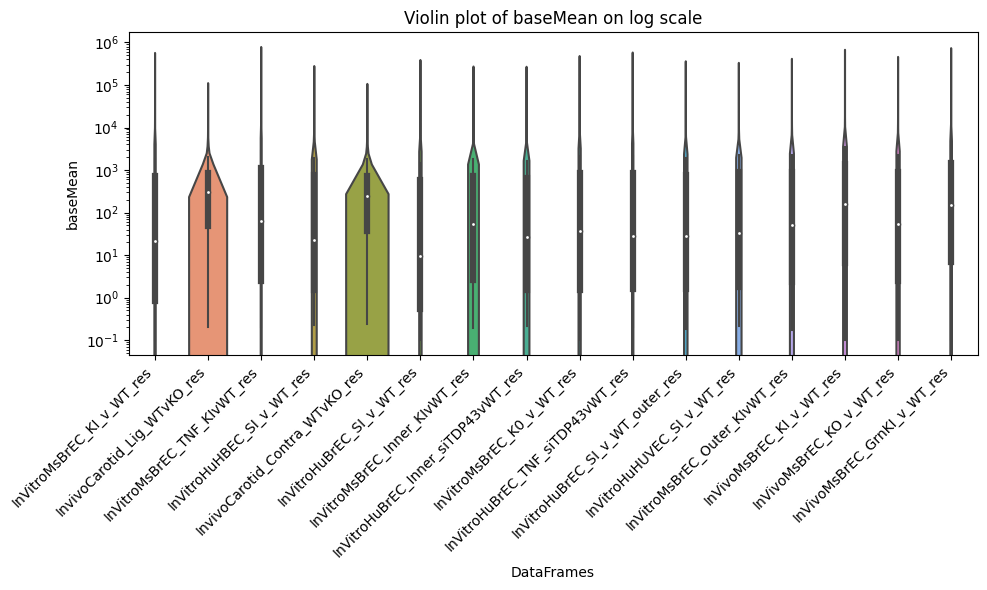

In [5]:
# Original DataFrame names and objects
df_dict = {
    'InVitroMsBrEC_KI_v_WT_res': InVitroMsBrEC_KI_v_WT_res,
    'InvivoCarotid_Lig_WTvKO_res': InvivoCarotid_Lig_WTvKO_res,
    'InVitroMsBrEC_TNF_KIvWT_res': InVitroMsBrEC_TNF_KIvWT_res,
    'InVitroHuHBEC_SI_v_WT_res' : InVitroHuHBEC_SI_v_WT_res,
    'InvivoCarotid_Contra_WTvKO_res' : InvivoCarotid_Contra_WTvKO_res, 
    'InVitroHuBrEC_SI_v_WT_res' : InVitroHuBrEC_SI_v_WT_res,
    'InVitroMsBrEC_Inner_KIvWT_res' : InVitroMsBrEC_Inner_KIvWT_res,
    'InVitroHuBrEC_Inner_siTDP43vWT_res' : InVitroHuBrEC_Inner_siTDP43vWT_res,
    'InVitroMsBrEC_K0_v_WT_res' : InVitroMsBrEC_K0_v_WT_res,
    'InVitroHuBrEC_TNF_siTDP43vWT_res' : InVitroHuBrEC_TNF_siTDP43vWT_res,
    'InVitroHuBrEC_SI_v_WT_outer_res' : InVitroHuBrEC_SI_v_WT_outer_res,
    'InVitroHuHUVEC_SI_v_WT_res' : InVitroHuHUVEC_SI_v_WT_res,
    'InVitroMsBrEC_Outer_KIvWT_res' : InVitroMsBrEC_Outer_KIvWT_res,
    'InVivoMsBrEC_KI_v_WT_res' : InVivoMsBrEC_KI_v_WT_res,
    'InVivoMsBrEC_KO_v_WT_res' : InVivoMsBrEC_KO_v_WT_res,
    'InVivoMsBrEC_GrnKI_v_WT_res' : InVivoMsBrEC_GrnKI_v_WT_res
}

# Extracting baseMean from each DataFrame and replacing 0 with a small number (0.1)
data = [df['baseMean'].replace(0, pd.NA).dropna().apply(lambda x: max(x, 0.1)) for df in df_dict.values()]

# Plotting the violin plot with a log scale
plt.figure(figsize=(10, 6))
sns.violinplot(data=data)
plt.yscale('log')
plt.title('Violin plot of baseMean on log scale')
plt.xlabel('DataFrames')
plt.ylabel('baseMean')

# Setting x-axis labels using the keys of the dictionary (DataFrame names)
plt.xticks(ticks=range(len(df_dict)), labels=df_dict.keys(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Create RNK files for GSEA

In [6]:
#Create RNK files for GSEA from DESeq2 data

# Original DataFrame names and objects
df_dict = {
    'InVitroMsBrEC_KI_v_WT_res': InVitroMsBrEC_KI_v_WT_res,
    'InvivoCarotid_Lig_WTvKO_res': InvivoCarotid_Lig_WTvKO_res,
    'InVitroMsBrEC_TNF_KIvWT_res': InVitroMsBrEC_TNF_KIvWT_res,
    'InVitroHuHBEC_SI_v_WT_res' : InVitroHuHBEC_SI_v_WT_res,
    'InvivoCarotid_Contra_WTvKO_res' : InvivoCarotid_Contra_WTvKO_res, 
    'InVitroHuBrEC_SI_v_WT_res' : InVitroHuBrEC_SI_v_WT_res,
    'InVitroMsBrEC_Inner_KIvWT_res' : InVitroMsBrEC_Inner_KIvWT_res,
    'InVitroHuBrEC_Inner_siTDP43vWT_res' : InVitroHuBrEC_Inner_siTDP43vWT_res,
    'InVitroMsBrEC_K0_v_WT_res' : InVitroMsBrEC_K0_v_WT_res,
    'InVitroHuBrEC_TNF_siTDP43vWT_res' : InVitroHuBrEC_TNF_siTDP43vWT_res,
    'InVitroHuBrEC_SI_v_WT_outer_res' : InVitroHuBrEC_SI_v_WT_outer_res,
    'InVitroHuHUVEC_SI_v_WT_res' : InVitroHuHUVEC_SI_v_WT_res,
    'InVitroMsBrEC_Outer_KIvWT_res' : InVitroMsBrEC_Outer_KIvWT_res,
    'InVivoMsBrEC_KI_v_WT_res' : InVivoMsBrEC_KI_v_WT_res,
    'InVivoMsBrEC_KO_v_WT_res' : InVivoMsBrEC_KO_v_WT_res,
    'InVivoMsBrEC_GrnKI_v_WT_res' : InVivoMsBrEC_GrnKI_v_WT_res
}

# New DataFrame dictionary
new_df_dict = {}

# Iterating through each item in the df_dict dictionary
for name, df in df_dict.items():
    # Filtering the DataFrame to keep only rows where baseMean >= 5
    df = df[df['baseMean'] >= 5]

    # If you want to ensure there is data after filtering you can add a check:
    if df.empty:
        print(f"No data in DataFrame {name} with baseMean >= 5")
        continue

    # Selecting only the 'log2FoldChange' column
    new_df = df[['log2FoldChange']]
    # Sorting the values based on 'log2FoldChange' in descending order
    new_df = new_df.sort_values(by='log2FoldChange', ascending=False)
    # Assigning no column names
    new_df.columns = ['']
    # Creating the new name by replacing 'res' with 'Log2FC' in the original name
    new_name = name.replace('_res', '_Log2FC')
    # Adding the new DataFrame to the new_df_dict dictionary with the new name
    new_df_dict[new_name] = new_df

# Assigning each DataFrame to a variable with its name
for name in new_df_dict:
    globals()[name] = new_df_dict[name]

In [7]:
InVivoMsBrEC_GrnKI_v_WT_Log2FC

Strip2   23.057556
Vcan     22.643121
A2m      22.139591
Gprin3   22.035717
Mael     21.601154
...            ...
Lrrn4cl  -9.978228
Gm43511 -10.420898
Ifi209  -23.631721
Fndc1   -23.644568
Gm37233 -23.644568

[16427 rows x 1 columns]

In [8]:
#Create RNK files for DESeq2 from single nuclei analysis

# Original DataFrame names and objects
df_dict = {
    'InVivoNuclei_Clust1v3_res': InVivoNuclei_Clust1v3_res
}

new_df_dict = {}

# Iterating through each item in the df_dict dictionary
for name, df in df_dict.items():
    # Set '1_names' as the index
    df = df.set_index('1_names')
    
    # Selecting only the columns that contain 'logfoldchanges'
    selected_columns = [col for col in df.columns if 'logfoldchanges' in col.lower()]
    new_df = df[selected_columns]
    
    # If selected_columns is not empty, proceed to sort and other operations
    if selected_columns:
        # Sorting the values based on the selected column in descending order
        new_df = new_df.sort_values(by=selected_columns[0], ascending=False)
        
        # Assigning no column names
        new_df.columns = ['']
        
        # Creating the new name by replacing 'res' with 'Log2FC' in the original name
        new_name = name.replace('_res', '_Log2FC')
        
        # Adding the new DataFrame to the new_df_dict dictionary with the new name
        new_df_dict[new_name] = new_df
    
# Assigning each DataFrame to a variable with its name
for name in new_df_dict:
    globals()[name] = new_df_dict[name]

# Get GSEA Public Datasets

In [10]:
# Get all library names
all_names = gseapy.get_library_name()

# Filter names that contain the string "XXX"
filt_names = [name for name in all_names if "KEGG" in name]

# Display the first 10
print(filt_names[:10])

['KEGG_2013', 'KEGG_2015', 'KEGG_2016', 'KEGG_2019_Human', 'KEGG_2019_Mouse', 'KEGG_2021_Human']


In [11]:
from biomart import BiomartServer

# Initialize the Biomart server
server = BiomartServer( "http://www.ensembl.org/biomart" )
server.verbose = True

# Choose the dataset
dataset = server.datasets['mmusculus_gene_ensembl']

# Define the attributes you want to retrieve
attributes = ['external_gene_name', 'hsapiens_homolog_associated_gene_name']

# Query mouse to human mappings
response = dataset.search({
    'attributes': attributes
})

# Create a dictionary for mouse to human gene mappings
m2h_dict = {}

# Process the response line by line
for line in response.iter_lines():
    line = line.decode('utf-8')  # Convert bytes to string if necessary
    row = line.split("\t")
    # Check if any of the required fields is missing
    if len(row) == 2 and None not in row:
        mouse_gene, human_homolog = row
        m2h_dict[mouse_gene] = human_homolog

[BiomartServer:'http://www.ensembl.org/biomart/martservice'] Fetching datasets
[BiomartServer:'http://www.ensembl.org/biomart/martservice'] Fetching databases
[BiomartDatabase:'Ensembl Genes 110'] Fetching datasets
[BiomartDatabase:'Mouse strains 110'] Fetching datasets
[BiomartDatabase:'Sequence'] Fetching datasets
[BiomartDatabase:'Ontology'] Fetching datasets
[BiomartDatabase:'Genomic features 110'] Fetching datasets
[BiomartDatabase:'Ensembl Variation 110'] Fetching datasets
[BiomartDatabase:'Ensembl Regulation 110'] Fetching datasets
[BiomartDataset:'mmusculus_gene_ensembl'] Searching using following params:
{'attributes': ['external_gene_name', 'hsapiens_homolog_associated_gene_name']}
[BiomartDataset:'mmusculus_gene_ensembl'] Fetching attributes
[BiomartDataset] search query:
b'<Query virtualSchemaName="default" formatter="TSV" header="0" uniqueRows="1" datasetConfigVersion="0.6" count=""><Dataset name="mmusculus_gene_ensembl" interface="default"><Attribute name="external_gene_n

In [22]:
# Choose the dataset
dataset = server.datasets['hsapiens_gene_ensembl']

# Define the attributes you want to retrieve
attributes = ['external_gene_name', 'mmusculus_homolog_associated_gene_name']

# Query mouse to human mappings
response = dataset.search({
    'attributes': attributes
})

# Create a dictionary for mouse to human gene mappings
h2m_dict = {}

# Process the response line by line
for line in response.iter_lines():
    line = line.decode('utf-8')  # Convert bytes to string if necessary
    row = line.split("\t")
    # Check if any of the required fields is missing
    if len(row) == 2 and None not in row:
        human_gene, mouse_homolog = row
        h2m_dict[human_gene] = mouse_homolog

[BiomartDataset:'hsapiens_gene_ensembl'] Searching using following params:
{'attributes': ['external_gene_name', 'mmusculus_homolog_associated_gene_name']}
[BiomartDataset:'hsapiens_gene_ensembl'] Fetching attributes
[BiomartDataset] search query:
b'<Query virtualSchemaName="default" formatter="TSV" header="0" uniqueRows="1" datasetConfigVersion="0.6" count=""><Dataset name="hsapiens_gene_ensembl" interface="default"><Attribute name="external_gene_name" /><Attribute name="mmusculus_homolog_associated_gene_name" /></Dataset></Query>'


# Convert RNK files from mouse to human (and human to mouse)

In [12]:
# Create a dictionary where keys are names and values are dataframes
dfs_dict = {
    'InVitroMsBrEC_KI_v_WT_Log2FC': InVitroMsBrEC_KI_v_WT_Log2FC,
    'InvivoCarotid_Lig_WTvKO_Log2FC': InvivoCarotid_Lig_WTvKO_Log2FC,
    'InVitroMsBrEC_TNF_KIvWT_Log2FC': InVitroMsBrEC_TNF_KIvWT_Log2FC,
    'InvivoCarotid_Contra_WTvKO_Log2FC': InvivoCarotid_Contra_WTvKO_Log2FC,
    'InVitroMsBrEC_Inner_KIvWT_Log2FC': InVitroMsBrEC_Inner_KIvWT_Log2FC,
    'InVitroMsBrEC_K0_v_WT_Log2FC': InVitroMsBrEC_K0_v_WT_Log2FC,
    'InVitroMsBrEC_Outer_KIvWT_Log2FC': InVitroMsBrEC_Outer_KIvWT_Log2FC,
    'InVivoMsBrEC_KI_v_WT_Log2FC': InVivoMsBrEC_KI_v_WT_Log2FC,
    'InVivoMsBrEC_KO_v_WT_Log2FC': InVivoMsBrEC_KO_v_WT_Log2FC,
    'InVivoMsBrEC_GrnKI_v_WT_Log2FC': InVivoMsBrEC_GrnKI_v_WT_Log2FC
}

def transform_dataframe(df, m2h_dict):
    df = df.reset_index()
    df.columns = ['GeneID', 'Value']
    df['Human_GeneID'] = df['GeneID'].map(m2h_dict)
    df.set_index('Human_GeneID', inplace=True)
    df = df[['Value']]
    return df

# Apply the function to every dataframe in the dictionary
for df_name, df in dfs_dict.items():
    transformed_df = transform_dataframe(df, m2h_dict)
    new_var_name = f"{df_name}_HsGeneID"
    globals()[new_var_name] = transformed_df

In [198]:
# Create a dictionary where keys are names and values are dataframes
dfs_dict = {
    'InVitroHuHBEC_SI_v_WT_Log2FC': InVitroHuHBEC_SI_v_WT_Log2FC,
    'InVitroHuBrEC_SI_v_WT_Log2FC': InVitroHuBrEC_SI_v_WT_Log2FC,
    'InVitroHuBrEC_Inner_siTDP43vWT_Log2FC': InVitroHuBrEC_Inner_siTDP43vWT_Log2FC,
    'InVitroHuBrEC_TNF_siTDP43vWT_Log2FC': InVitroHuBrEC_TNF_siTDP43vWT_Log2FC,
    'InVitroHuBrEC_SI_v_WT_outer_Log2FC': InVitroHuBrEC_SI_v_WT_outer_Log2FC,
    'InVitroHuHUVEC_SI_v_WT_Log2FC': InVitroHuHUVEC_SI_v_WT_Log2FC
}

def transform_dataframe(df, m2h_dict):
    df = df.reset_index()
    df.columns = ['GeneID', 'Value']
    df['Mouse_GeneID'] = df['GeneID'].map(h2m_dict)
    df.set_index('Mouse_GeneID', inplace=True)
    df = df[['Value']]
    return df

# Apply the function to every dataframe in the dictionary
for df_name, df in dfs_dict.items():
    transformed_df = transform_dataframe(df, h2m_dict)
    new_var_name = f"{df_name}_MsGeneID"
    globals()[new_var_name] = transformed_df

# Get GSEA Custom datasets (and convert mouse to human, and human to mouse)

In [14]:
# Replace 'your_file.csv' with the path to your .csv file
file_path_human = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/CreationCustomGeneSetList/CustomGeneSetsHum2023.csv'

# Read the first three rows without considering them as headers
header_df = pd.read_csv(file_path_human, nrows=3, header=None)

# Merge the headers
merged_headers = ["_".join(header_df.iloc[:, col].astype(str)) for col in range(header_df.shape[1])]

# Read the rest of the file using the merged headers as column names, skipping the first four rows (including the original header)
df_human = pd.read_csv(file_path_human, skiprows=4, names=merged_headers)

# Initialize an empty dictionary
custom_endo_human_genesets = {}

# Iterate over the columns in the DataFrame
for column in df_human.columns:
    # Add a new key-value pair to the dictionary
    # Key: merged header, Value: list of non-null genes in that column
    custom_endo_human_genesets[column] = df_human[column].dropna().tolist()

# custom_endo_genesets now contains your gene sets in the desired format

In [16]:
# Replace 'your_file.csv' with the path to your .csv file
file_path_mouse = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/CreationCustomGeneSetList/CustomGeneSetsMus2023.csv'

# Read the first three rows without considering them as headers
header_df = pd.read_csv(file_path_mouse, nrows=3, header=None)

# Merge the headers
merged_headers = ["_".join(header_df.iloc[:, col].astype(str)) for col in range(header_df.shape[1])]

# Read the rest of the file using the merged headers as column names, skipping the first four rows (including the original header)
df_mouse = pd.read_csv(file_path_mouse, skiprows=4, names=merged_headers)

# Initialize an empty dictionary
custom_endo_mus_genesets = {}

# Iterate over the columns in the DataFrame
for column in df_mouse.columns:
    # Add a new key-value pair to the dictionary
    # Key: merged header, Value: list of non-null genes in that column
    custom_endo_mus_genesets[column] = df_mouse[column].dropna().tolist()

# custom_endo_genesets now contains your gene sets in the desired format

In [17]:
df_human

HUVEC_Serum_v_plasma_Up HuAEC_TNF_Up HuAEC_LPS_Up HuAEC_l1b_Up  \
0                   CNTNAP2         CSF2        CXCL2         CSF2   
1                      PRB2       IFITM1         RTP4         CSF3   
2                AC011491.1         TYMP       IFI44L         CCL5   
3                    ZNF865         RTP4       IFITM1      TNFAIP6   
4                     TRDV1        RSAD2         IFI6       CXCL11   
..                      ...          ...          ...          ...   
200                     NaN          NaN          NaN          NaN   
201                     NaN          NaN          NaN          NaN   
202                     NaN          NaN          NaN          NaN   
203                     NaN          NaN          NaN          NaN   
204                     NaN          NaN          NaN          NaN   

    HuAEC_Serum_v_plasma_Up BrainEC_TardbpSI_HuBrEC_Up  \
0                AC011491.1                   C1orf194   
1                     TRDV1                  SOX21.AS1   
2                AC239803.2                   AC008163   
3                     FSIP1                     ACTBL2   
4                     MAGI2                 AC112198.1   
..                      ...                        ...   
200                     NaN                        NaN   
201                     NaN                        NaN   
202                     NaN                        NaN   
203                     NaN                        NaN   
204                     NaN                        NaN   

    BrainEC_TardbpSI_HuBrEC_outerflow_Up BrainEC_TardbpSI_HuBrEC_innerflow_Up  \
0                                 ELAVL2                                NETO1   
1                                  MT1JP                           AC010327.2   
2                              ARHGEF34P                               PLA2G7   
3                                ARHGEF4                                 DIO2   
4                                 SMG1P6                           AL590399.3   
..                                   ...                                  ...   
200                                  NaN                                  NaN   
201                                  NaN                                  NaN   
202                                  NaN                                  NaN   
203                                  NaN                                  NaN   
204                                  NaN                                  NaN   

    BrainEC_TardbpSI_HuBrEC_TNF_Up HUVEC_TardbpSI_HUVEC_Up  ...  \
0                             TAL2                AC108866  ...   
1                         ADAMTSL5                   PRRG4  ...   
2                        HNRNPH1P3              AC107081.2  ...   
3                          FAM182A                AC099811  ...   
4                        TGFB2.OT1                AL513283  ...   
..                             ...                     ...  ...   
200                            NaN                     NaN  ...   
201                            NaN                     NaN  ...   
202                            NaN                     NaN  ...   
203                            NaN                     NaN  ...   
204                            NaN                     NaN  ...   

    BrainEC_TardbpSI_HuBrEC_TNF_Down HUVEC_TardbpSI_HUVEC_Down  \
0                              APLNR                   OLFML2A   
1                              ACKR1                   GALNT15   
2                              RXFP1                     APLNR   
3                              CD207                     ACSM3   
4                               GPR1                      GJA5   
..                               ...                       ...   
200                              NaN                       NaN   
201                              NaN                       NaN   
202                              NaN                       NaN   
203                         

In [20]:
df_mouse

MsAEC_TNF_Up MsAEC_LPS_Up MsAEC_l1b_Up MsAEC_Plasma_v_basal_Up  \
0           Ccl7         Ccl2         Lcn2                    Car2   
1         Sprr2e         Ccl7         Ccl2           1810011O10Rik   
2           Saa3         Vnn3          Il6           2210404O07Rik   
3          Ccl20          Il6         Ccl7                 Angptl4   
4           Gbp5        Cxcl5         Vnn3                   Fkbp5   
..           ...          ...          ...                     ...   
197        Stx11       Gm5803       Pdlim4                   Mfap2   
198          NaN          NaN          NaN                     NaN   
199          NaN          NaN          NaN                     NaN   
200          NaN          NaN          NaN                     NaN   
201          NaN          NaN          NaN                     NaN   

    MsAEC_Serum_v_plasma_Up Carotid_Low_v_High_Up  \
0                      Lcn2                Angpt2   
1                 Serpina3g                 Cd177   
2                      Ccl7                   Kit   
3                 Serpina3n               Cd300lf   
4                     Klra4                  Il1b   
..                      ...                   ...   
197                 Gm12603                  Cd68   
198                     NaN                   NaN   
199                     NaN                   NaN   
200                     NaN                   NaN   
201                     NaN                   NaN   

    Carotid_AntiplatletLow_v_Low_Up Carotid_ClodronatelLow_v_Low_Up  \
0                            Fam83d                          Treml4   
1                                Tg                           Pira6   
2                              Mxd3                            Ly6i   
3                              Prnd                   9830107B12Rik   
4                             Trem1                          Lrrc55   
..                              ...                             ...   
197                          Ankrd1                           Tifab   
198                             NaN                             NaN   
199                             NaN                             NaN   
200                             NaN                             NaN   
201                             NaN                             NaN   

    Carotid_RibotagLow_v_High_Up BrainEC_TardbpECKO_6v6_invivo_Up  ...  \
0                        Fam184a                           Shcbp1  ...   
1                          Naip6                           Pimreg  ...   
2                         Trim29                            Ackr2  ...   
3                         Ptger2                            Bub1b  ...   
4                         Igfbp2                             Sprn  ...   
..                           ...                              ...  ...   
197                      Ubash3b                           Cdca7l  ...   
198                          NaN                              NaN  ...   
199                          NaN                              NaN  ...   
200                          NaN                              NaN  ...   
201                          NaN                              NaN  ...   

    ArterialEC_PMID32091396_S1p_GFPlow ArterialEC_PMID32091396_S1p_GFPhi  \
0                               Hbb-b1                            Duoxa2   
1                               Hbb-b2                               Nts   
2                                 Lgr6                               Tec   
3                               Beta-s                              Otos   
4                                 Ccl6                             Pdcd1   
..                                 ...                               ...   
197                              Abcc9                         Hist1h2bb   
198                                NaN                               NaN   
199                                NaN                               NaN   
200                     

In [18]:
#Convert mouse gene id to human

def transform_gene_id(gene_id, mapping_dict):
    # Return the mapped gene ID or the original if not found in the mapping
    return mapping_dict.get(gene_id, gene_id)

def transform_dataframe(df_mouse, mapping_dict):
    # Apply transformation to each cell in the DataFrame
    return df_mouse.applymap(lambda x: transform_gene_id(x, mapping_dict))

# Apply the transformation
transformed_df = transform_dataframe(df_mouse, m2h_dict)

# Optionally, save the transformed DataFrame with a new variable name
df_mouse_HsGeneID = transformed_df


/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_4831/3190091879.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.


In [23]:
#Convert human gene id to mouse

def transform_gene_id(gene_id, mapping_dict):
    # Return the mapped gene ID or the original if not found in the mapping
    return mapping_dict.get(gene_id, gene_id)

def transform_dataframe(df_human, mapping_dict):
    # Apply transformation to each cell in the DataFrame
    return df_human.applymap(lambda x: transform_gene_id(x, mapping_dict))

# Example usage
# Assuming df_human is your DataFrame with human gene IDs
# And h2m_dict is your mapping dictionary from human to mouse gene IDs
transformed_df = transform_dataframe(df_human, h2m_dict)

# Optionally, save the transformed DataFrame with a new variable name
df_human_MmGeneID = transformed_df

/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_4831/2397311147.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.


In [19]:
df_mouse_HsGeneID

MsAEC_TNF_Up MsAEC_LPS_Up MsAEC_l1b_Up MsAEC_Plasma_v_basal_Up  \
0           CCL7         CCL2         LCN2                     CA2   
1                        CCL7         CCL2           1810011O10Rik   
2           SAA2                       IL6           2210404O07Rik   
3          CCL20          IL6         CCL7                 ANGPTL4   
4           GBP5        CXCL6                                FKBP5   
..           ...          ...          ...                     ...   
197        STX11       Gm5803       PDLIM4                   MFAP2   
198          NaN          NaN          NaN                     NaN   
199          NaN          NaN          NaN                     NaN   
200          NaN          NaN          NaN                     NaN   
201          NaN          NaN          NaN                     NaN   

    MsAEC_Serum_v_plasma_Up Carotid_Low_v_High_Up  \
0                      LCN2                ANGPT2   
1                  SERPINA3                 CD177   
2                      CCL7                   KIT   
3                  SERPINA3               CD300LF   
4                                            IL1B   
..                      ...                   ...   
197                 Gm12603                         
198                     NaN                   NaN   
199                     NaN                   NaN   
200                     NaN                   NaN   
201                     NaN                   NaN   

    Carotid_AntiplatletLow_v_Low_Up Carotid_ClodronatelLow_v_Low_Up  \
0                            FAM83D                          TREML4   
1                                TG                           Pira6   
2                              MXD3                            LY6S   
3                              PRND                                   
4                             TREM1                          LRRC55   
..                              ...                             ...   
197                          ANKRD1                           TIFAB   
198                             NaN                             NaN   
199                             NaN                             NaN   
200                             NaN                             NaN   
201                             NaN                             NaN   

    Carotid_RibotagLow_v_High_Up BrainEC_TardbpECKO_6v6_invivo_Up  ...  \
0                        FAM184A                           SHCBP1  ...   
1                                                          PIMREG  ...   
2                         TRIM29                            ACKR2  ...   
3                         PTGER2                            BUB1B  ...   
4                         IGFBP2                             SPRN  ...   
..                           ...                              ...  ...   
197                      UBASH3B                           CDCA7L  ...   
198                          NaN                              NaN  ...   
199                          NaN                              NaN  ...   
200                          NaN                              NaN  ...   
201                          NaN                              NaN  ...   

    ArterialEC_PMID32091396_S1p_GFPlow ArterialEC_PMID32091396_S1p_GFPhi  \
0                               Hbb-b1                            DUOXA2   
1                               Hbb-b2                               NTS   
2                                 LGR6                               TEC   
3                               Beta-s                              OTOS   
4                                CCL15                             PDCD1   
..                                 ...                               ...   
197                              ABCC9                         Hist1h2bb   
198                                NaN                               NaN   
199                                NaN                               NaN   
200                     

In [24]:
df_human_MmGeneID

HUVEC_Serum_v_plasma_Up HuAEC_TNF_Up HuAEC_LPS_Up HuAEC_l1b_Up  \
0                   Cntnap2         Csf2                      Csf2   
1                                 Ifitm2         Rtp4         Csf3   
2                AC011491.1         Tymp       Ifi44l                
3                    Zfp865         Rtp4       Ifitm2      Tnfaip6   
4          Trav15d-2-dv6d-2        Rsad2                             
..                      ...          ...          ...          ...   
200                     NaN          NaN          NaN          NaN   
201                     NaN          NaN          NaN          NaN   
202                     NaN          NaN          NaN          NaN   
203                     NaN          NaN          NaN          NaN   
204                     NaN          NaN          NaN          NaN   

    HuAEC_Serum_v_plasma_Up BrainEC_TardbpSI_HuBrEC_Up  \
0                AC011491.1                   C1orf194   
1          Trav15d-2-dv6d-2                  SOX21.AS1   
2                AC239803.2                   AC008163   
3                     Fsip1                     Actbl2   
4                     Magi2                 AC112198.1   
..                      ...                        ...   
200                     NaN                        NaN   
201                     NaN                        NaN   
202                     NaN                        NaN   
203                     NaN                        NaN   
204                     NaN                        NaN   

    BrainEC_TardbpSI_HuBrEC_outerflow_Up BrainEC_TardbpSI_HuBrEC_innerflow_Up  \
0                                 Elavl2                                Neto1   
1                                                                  AC010327.2   
2                                                                      Pla2g7   
3                                                                        Dio2   
4                                                                  AL590399.3   
..                                   ...                                  ...   
200                                  NaN                                  NaN   
201                                  NaN                                  NaN   
202                                  NaN                                  NaN   
203                                  NaN                                  NaN   
204                                  NaN                                  NaN   

    BrainEC_TardbpSI_HuBrEC_TNF_Up HUVEC_TardbpSI_HUVEC_Up  ...  \
0                             Tal2                AC108866  ...   
1                         Adamtsl5                   Prrg4  ...   
2                                               AC107081.2  ...   
3                                                 AC099811  ...   
4                        TGFB2.OT1                AL513283  ...   
..                             ...                     ...  ...   
200                            NaN                     NaN  ...   
201                            NaN                     NaN  ...   
202                            NaN                     NaN  ...   
203                            NaN                     NaN  ...   
204                            NaN                     NaN  ...   

    BrainEC_TardbpSI_HuBrEC_TNF_Down HUVEC_TardbpSI_HUVEC_Down  \
0                              Aplnr                   Olfml2a   
1                              Ackr1                   Galnt15   
2                              Rxfp1                     Aplnr   
3                              Cd207                     Acsm3   
4                               GPR1                      Gja5   
..                               ...                       ...   
200                              NaN                       NaN   
201                              NaN                       NaN   
202                              NaN                       NaN   
203                         

In [18]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

df_mouse_HsGeneID

MsAEC_TNF_Up MsAEC_LPS_Up MsAEC_l1b_Up MsAEC_Plasma_v_basal_Up  \
0           CCL7         CCL2         LCN2                     CA2   
1                        CCL7         CCL2           1810011O10Rik   
2           SAA2                       IL6           2210404O07Rik   
3          CCL20          IL6         CCL7                 ANGPTL4   
4           GBP5        CXCL6                                FKBP5   
..           ...          ...          ...                     ...   
197        STX11       Gm5803       PDLIM4                   MFAP2   
198          NaN          NaN          NaN                     NaN   
199          NaN          NaN          NaN                     NaN   
200          NaN          NaN          NaN                     NaN   
201          NaN          NaN          NaN                     NaN   

    MsAEC_Serum_v_plasma_Up Carotid_Low_v_High_Up  \
0                      LCN2                ANGPT2   
1                  SERPINA3                 CD177   
2                      CCL7                   KIT   
3                  SERPINA3               CD300LF   
4                                            IL1B   
..                      ...                   ...   
197                 Gm12603                         
198                     NaN                   NaN   
199                     NaN                   NaN   
200                     NaN                   NaN   
201                     NaN                   NaN   

    Carotid_AntiplatletLow_v_Low_Up Carotid_ClodronatelLow_v_Low_Up  \
0                            FAM83D                          TREML4   
1                                TG                           Pira6   
2                              MXD3                            LY6S   
3                              PRND                                   
4                             TREM1                          LRRC55   
..                              ...                             ...   
197                          ANKRD1                           TIFAB   
198                             NaN                             NaN   
199                             NaN                             NaN   
200                             NaN                             NaN   
201                             NaN                             NaN   

    Carotid_RibotagLow_v_High_Up BrainEC_TardbpECKO_6v6_invivo_Up  \
0                        FAM184A                           SHCBP1   
1                                                          PIMREG   
2                         TRIM29                            ACKR2   
3                         PTGER2                            BUB1B   
4                         IGFBP2                             SPRN   
..                           ...                              ...   
197                      UBASH3B                           CDCA7L   
198                          NaN                              NaN   
199                          NaN                              NaN   
200                          NaN                              NaN   
201                          NaN                              NaN   

    BrainEC_TardbpKI_MsBrECs_invitro_Up CarotidEC_TardbpKOvWT_Contra_Up  \
0                                 FOXA2                                   
1                                  MAEL                            FRZB   
2                                  APOB                           THBS1   
3                                                                  AHSG   
4                                                                 KLF15   
..                                  ...                             ...   
197                          Gpr137b.ps                   9430008C03Rik   
198                                 NaN                             TES   
199                                 NaN                             NaN   
200                                 NaN                             NaN   
201                

In [25]:
#Remove NaN

# Initialize an empty dictionary
custom_endo_mus_HsID_genesets = {}

# Iterate over the columns in the DataFrame
for column in df_mouse_HsGeneID.columns:
    # Add a new key-value pair to the dictionary
    # Key: merged header, Value: list of non-null genes in that column
    custom_endo_mus_HsID_genesets[column] = df_mouse_HsGeneID[column].dropna().tolist()

    
    
# Initialize an empty dictionary
custom_endo_hum_MsID_genesets = {}

# Iterate over the columns in the DataFrame
for column in df_human_MmGeneID.columns:
    # Add a new key-value pair to the dictionary
    # Key: merged header, Value: list of non-null genes in that column
    custom_endo_hum_MsID_genesets[column] = df_human_MmGeneID[column].dropna().tolist()



# Convert DEseq2 results from mouse to human (_res_HsGeneID)

In [28]:
# Create a dictionary where keys are names and values are dataframes
df_dict = {
    'InVitroMsBrEC_KI_v_WT_res': InVitroMsBrEC_KI_v_WT_res,
    'InvivoCarotid_Lig_WTvKO_res': InvivoCarotid_Lig_WTvKO_res,
    'InVitroMsBrEC_TNF_KIvWT_res': InVitroMsBrEC_TNF_KIvWT_res,
#    'InVitroHuHBEC_SI_v_WT_res' : InVitroHuHBEC_SI_v_WT_res,
    'InvivoCarotid_Contra_WTvKO_res' : InvivoCarotid_Contra_WTvKO_res, 
#    'InVitroHuBrEC_SI_v_WT_res' : InVitroHuBrEC_SI_v_WT_res,
    'InVitroMsBrEC_Inner_KIvWT_res' : InVitroMsBrEC_Inner_KIvWT_res,
#    'InVitroHuBrEC_Inner_siTDP43vWT_res' : InVitroHuBrEC_Inner_siTDP43vWT_res,
    'InVitroMsBrEC_K0_v_WT_res' : InVitroMsBrEC_K0_v_WT_res,
#    'InVitroHuBrEC_TNF_siTDP43vWT_res' : InVitroHuBrEC_TNF_siTDP43vWT_res,
#    'InVitroHuBrEC_SI_v_WT_outer_res' : InVitroHuBrEC_SI_v_WT_outer_res,
#    'InVitroHuHUVEC_SI_v_WT_res' : InVitroHuHUVEC_SI_v_WT_res,
    'InVitroMsBrEC_Outer_KIvWT_res' : InVitroMsBrEC_Outer_KIvWT_res,
    'InVivoMsBrEC_KI_v_WT_res' : InVivoMsBrEC_KI_v_WT_res,
    'InVivoMsBrEC_KO_v_WT_res' : InVivoMsBrEC_KO_v_WT_res,
    'InVivoMsBrEC_GrnKI_v_WT_res' : InVivoMsBrEC_GrnKI_v_WT_res
}

def transform_dataframe(df, m2h_dict):
    old_index = df.index
    new_index = old_index.map(m2h_dict)  # map the old index to the new index
    df.index = new_index  # set the new index
    return df

# Apply the function to every dataframe in the dictionary
for df_name in df_dict:
    df = df_dict[df_name]
    transformed_df = transform_dataframe(df, m2h_dict)
    new_var_name = f"{df_name}_HsGeneID"  # appending "_HsGeneID" to the variable name
    globals()[new_var_name] = transformed_df  # save the transformed DataFrame as a new global variable

In [29]:
InVitroMsBrEC_KI_v_WT_res_HsGeneID

baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NaN        3.179151        0.813513  0.596352  1.364149  0.172521  0.999194
NaN        0.317445        0.774325  2.147881  0.360506  0.718468  0.999194
NaN      921.291126       -0.038530  0.166296 -0.231694  0.816776  0.999194
NaN       34.786652       -0.590343  0.770232 -0.766448  0.443410  0.999194
NaN       41.353547       -0.241785  0.340506 -0.710076  0.477657  0.999194
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.158409       -0.991949  3.059679 -0.324200  0.745786  0.999194
ZYG11B  1220.481218       -0.013288  0.154834 -0.085824  0.931606  0.999194
ZYX     9752.166948       -0.045955  0.149852 -0.306673  0.759092  0.999194
ZZEF1   3270.052145        0.149254  0.123193  1.211542  0.225688  0.999194
ZZZ3    1555.877175        0.053970  0.135174  0.399260  0.689702  0.999194

[48137 rows x 6 columns]

# Convert DEseq2 results from mouse to human (_res_MsGeneID)

In [26]:
# Create a dictionary where keys are names and values are dataframes
df_dict = {
#    'InVitroMsBrEC_KI_v_WT_res': InVitroMsBrEC_KI_v_WT_res,
#    'InvivoCarotid_Lig_WTvKO_res': InvivoCarotid_Lig_WTvKO_res,
#    'InVitroMsBrEC_TNF_KIvWT_res': InVitroMsBrEC_TNF_KIvWT_res,
    'InVitroHuHBEC_SI_v_WT_res' : InVitroHuHBEC_SI_v_WT_res,
#    'InvivoCarotid_Contra_WTvKO_res' : InvivoCarotid_Contra_WTvKO_res, 
    'InVitroHuBrEC_SI_v_WT_res' : InVitroHuBrEC_SI_v_WT_res,
#    'InVitroMsBrEC_Inner_KIvWT_res' : InVitroMsBrEC_Inner_KIvWT_res,
    'InVitroHuBrEC_Inner_siTDP43vWT_res' : InVitroHuBrEC_Inner_siTDP43vWT_res,
#    'InVitroMsBrEC_K0_v_WT_res' : InVitroMsBrEC_K0_v_WT_res,
    'InVitroHuBrEC_TNF_siTDP43vWT_res' : InVitroHuBrEC_TNF_siTDP43vWT_res,
    'InVitroHuBrEC_SI_v_WT_outer_res' : InVitroHuBrEC_SI_v_WT_outer_res,
    'InVitroHuHUVEC_SI_v_WT_res' : InVitroHuHUVEC_SI_v_WT_res,
#    'InVitroMsBrEC_Outer_KIvWT_res' : InVitroMsBrEC_Outer_KIvWT_res,
#    'InVivoMsBrEC_KI_v_WT_res' : InVivoMsBrEC_KI_v_WT_res,
#    'InVivoMsBrEC_KO_v_WT_res' : InVivoMsBrEC_KO_v_WT_res,
#    'InVivoMsBrEC_GrnKI_v_WT_res' : InVivoMsBrEC_GrnKI_v_WT_res
}

def transform_dataframe(df, h2m_dict):
    old_index = df.index
    new_index = old_index.map(h2m_dict)  # map the old index to the new index
    df.index = new_index  # set the new index
    return df

# Apply the function to every dataframe in the dictionary
for df_name in df_dict:
    df = df_dict[df_name]
    transformed_df = transform_dataframe(df, h2m_dict)
    new_var_name = f"{df_name}_MsGeneID"  # appending "_HsGeneID" to the variable name
    globals()[new_var_name] = transformed_df  # save the transformed DataFrame as a new global variable

In [30]:
InVitroHuBrEC_TNF_siTDP43vWT_res_MsGeneID

baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1bg        9.247981        0.466951  1.074602  0.434534  0.663901  0.99988
NaN        31.180199        0.471104  0.716100  0.657875  0.510619  0.99988
A1cf        0.000000             NaN       NaN       NaN       NaN      NaN
A2m        17.392478       -2.521762  1.244434 -2.026433  0.042720  0.99988
NaN         1.938522       -4.409795  2.868243 -1.537455  0.124182  0.99988
...              ...             ...       ...       ...       ...      ...
            0.000000             NaN       NaN       NaN       NaN      NaN
Zyg11b   1684.265983       -0.299214  0.242950 -1.231590  0.218102  0.99988
Zyx     16075.265103       -0.014190  0.248341 -0.057140  0.954434  0.99988
            0.000000             NaN       NaN       NaN       NaN      NaN
Zzef1    1277.962362       -0.284175  0.221229 -1.284528  0.198957  0.99988

[58299 rows x 6 columns]

# Run GSEA (three searches, for Public, Custom Mouse and Custom Human Sets)

In [31]:
import gseapy

# List available gene set libraries
libraries = gseapy.get_library_name()
print(libraries)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_2023', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and_Tissue_2021', 'Diabetes_Perturbations_GEO_2022', 'DisGeNET', 'Disease_Perturbations_from_GEO

In [55]:
#Convert KEGG and Hallmark to mouse IDs

#read gmt file into dict
KEGG_2023_Human = gseapy.read_gmt(path="/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/c2.cp.kegg_legacy.v2023.2.Hs.symbols.gmt")

# Initialize a new dictionary for the converted gene sets
KEGG_2023_Human_Ms = {}

# Convert human gene IDs to mouse gene IDs
for set_name, genes in KEGG_2023_Human.items():
    mouse_genes = [h2m_dict.get(gene, gene) for gene in genes]
    KEGG_2023_Human_Ms[set_name] = mouse_genes
    
    

#read gmt file into dict
MSigDB_Hallmark_2023 = gseapy.read_gmt(path="/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/h.all.v2023.2.Hs.symbols.gmt")

# Initialize a new dictionary for the converted gene sets
MSigDB_Hallmark_2023_Ms = {}

# Convert human gene IDs to mouse gene IDs
for set_name, genes in MSigDB_Hallmark_2023.items():
    mouse_genes = [h2m_dict.get(gene, gene) for gene in genes]
    MSigDB_Hallmark_2023_Ms[set_name] = mouse_genes

In [67]:
# Assume df_list is your list of DataFrames
df_list = [InVitroHuHBEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID,
            InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID,
            InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID,
            InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroMsBrEC_KI_v_WT_Log2FC, 
            InvivoCarotid_Lig_WTvKO_Log2FC, 
            InVitroMsBrEC_TNF_KIvWT_Log2FC, 
            InvivoCarotid_Contra_WTvKO_Log2FC, 
            InVitroMsBrEC_Inner_KIvWT_Log2FC, 
            InVitroMsBrEC_K0_v_WT_Log2FC, 
            InVitroMsBrEC_Outer_KIvWT_Log2FC,
            InVivoMsBrEC_KI_v_WT_Log2FC, 
            InVivoMsBrEC_KO_v_WT_Log2FC, 
            InVivoMsBrEC_GrnKI_v_WT_Log2FC]
#            InVivoNuclei_Clust1v3_Log2FC]

# Corresponding list of names for the output
df_names = ['InVitroHuHBEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID',
            'InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID',
            'InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID',
            'InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroMsBrEC_KI_v_WT_Log2FC', 
            'InvivoCarotid_Lig_WTvKO_Log2FC', 
            'InVitroMsBrEC_TNF_KIvWT_Log2FC', 
            'InvivoCarotid_Contra_WTvKO_Log2FC', 
            'InVitroMsBrEC_Inner_KIvWT_Log2FC', 
            'InVitroMsBrEC_K0_v_WT_Log2FC', 
            'InVitroMsBrEC_Outer_KIvWT_Log2FC',
            'InVivoMsBrEC_KI_v_WT_Log2FC', 
            'InVivoMsBrEC_KO_v_WT_Log2FC', 
            'InVivoMsBrEC_GrnKI_v_WT_Log2FC']
#            'InVivoNuclei_Clust1v3_Log2FC_MsGeneID']

# Loop through each DataFrame in the list and perform GSEA
for i, df in enumerate(df_list):
    results = gseapy.prerank(rnk=df,
                             gene_sets=custom_endo_mus_genesets,
                             threads=4,
                             min_size=5,
                             method='log2_ratio_of_classes',
                             weighted_score_type=1,
                             max_size=1000,
                             permutation_num=1000,  # reduce number to speed up testing
                             outdir=None,  # don't write to disk
                             seed=6,
                             verbose=True,  # see what's going on behind the scenes
                             )

    # If you want to assign the result to a variable with a specific name
    globals()[f'{df_names[i]}_rankedGSEA_log2_weighted1_custom'] = results

2023-12-07 17:40:05,595 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2023-12-07 17:40:05,624 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2023-12-07 17:40:05,641 [WARNING] Duplicated values found in preranked stats: 0.05% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2023-12-07 17:40:05,642 [INFO] Parsing data files for GSEA.............................
2023-12-07 17:40:05,644 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=5
2023-12-07 17:40:05,645 [INFO] 0042 gene_sets used for further statistical testing.....
2023-12-07 17:40:05,645 [INFO] Start to run GSEA...Might take a while..................
2023-12-07 17:40:06,557 [INFO] Congratulations. GSEApy runs successfully................

2023-12-07 17:40:06,569 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2023-1

In [68]:
# Assume df_list is your list of DataFrames
df_list = [InVitroHuHBEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID,
            InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID,
            InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID,
            InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroMsBrEC_KI_v_WT_Log2FC, 
            InvivoCarotid_Lig_WTvKO_Log2FC, 
            InVitroMsBrEC_TNF_KIvWT_Log2FC, 
            InvivoCarotid_Contra_WTvKO_Log2FC, 
            InVitroMsBrEC_Inner_KIvWT_Log2FC, 
            InVitroMsBrEC_K0_v_WT_Log2FC, 
            InVitroMsBrEC_Outer_KIvWT_Log2FC,
            InVivoMsBrEC_KI_v_WT_Log2FC, 
            InVivoMsBrEC_KO_v_WT_Log2FC, 
            InVivoMsBrEC_GrnKI_v_WT_Log2FC]
#            InVivoNuclei_Clust1v3_Log2FC]

# Corresponding list of names for the output
df_names = ['InVitroHuHBEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID',
            'InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID',
            'InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID',
            'InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroMsBrEC_KI_v_WT_Log2FC', 
            'InvivoCarotid_Lig_WTvKO_Log2FC', 
            'InVitroMsBrEC_TNF_KIvWT_Log2FC', 
            'InvivoCarotid_Contra_WTvKO_Log2FC', 
            'InVitroMsBrEC_Inner_KIvWT_Log2FC', 
            'InVitroMsBrEC_K0_v_WT_Log2FC', 
            'InVitroMsBrEC_Outer_KIvWT_Log2FC',
            'InVivoMsBrEC_KI_v_WT_Log2FC', 
            'InVivoMsBrEC_KO_v_WT_Log2FC', 
            'InVivoMsBrEC_GrnKI_v_WT_Log2FC']
#            'InVivoNuclei_Clust1v3_Log2FC_MsGeneID']

# Loop through each DataFrame in the list and perform GSEA
for i, df in enumerate(df_list):
    results = gseapy.prerank(rnk=df,
                             gene_sets=custom_endo_hum_MsID_genesets,
                             threads=4,
                             min_size=5,
                             method='log2_ratio_of_classes',
                             weighted_score_type=1,
                             max_size=1000,
                             permutation_num=1000,  # reduce number to speed up testing
                             outdir=None,  # don't write to disk
                             seed=6,
                             verbose=True,  # see what's going on behind the scenes
                             )

    # If you want to assign the result to a variable with a specific name
    globals()[f'{df_names[i]}_rankedGSEA_log2_weighted1_custom2'] = results

2023-12-07 17:40:38,403 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2023-12-07 17:40:38,434 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2023-12-07 17:40:38,452 [WARNING] Duplicated values found in preranked stats: 0.05% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2023-12-07 17:40:38,452 [INFO] Parsing data files for GSEA.............................
2023-12-07 17:40:38,454 [INFO] 0001 gene_sets have been filtered out when max_size=1000 and min_size=5
2023-12-07 17:40:38,454 [INFO] 0032 gene_sets used for further statistical testing.....
2023-12-07 17:40:38,454 [INFO] Start to run GSEA...Might take a while..................
2023-12-07 17:40:39,252 [INFO] Congratulations. GSEApy runs successfully................

2023-12-07 17:40:39,262 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2023-1

In [76]:
# Assume df_list is your list of DataFrames
df_list = [InVitroHuHBEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID,
            InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID,
            InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID,
            InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroMsBrEC_KI_v_WT_Log2FC, 
            InvivoCarotid_Lig_WTvKO_Log2FC, 
            InVitroMsBrEC_TNF_KIvWT_Log2FC, 
            InvivoCarotid_Contra_WTvKO_Log2FC, 
            InVitroMsBrEC_Inner_KIvWT_Log2FC, 
            InVitroMsBrEC_K0_v_WT_Log2FC, 
            InVitroMsBrEC_Outer_KIvWT_Log2FC,
            InVivoMsBrEC_KI_v_WT_Log2FC, 
            InVivoMsBrEC_KO_v_WT_Log2FC, 
            InVivoMsBrEC_GrnKI_v_WT_Log2FC]
#            InVivoNuclei_Clust1v3_Log2FC]

# Corresponding list of names for the output
df_names = ['InVitroHuHBEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID',
            'InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID',
            'InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID',
            'InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroMsBrEC_KI_v_WT_Log2FC', 
            'InvivoCarotid_Lig_WTvKO_Log2FC', 
            'InVitroMsBrEC_TNF_KIvWT_Log2FC', 
            'InvivoCarotid_Contra_WTvKO_Log2FC', 
            'InVitroMsBrEC_Inner_KIvWT_Log2FC', 
            'InVitroMsBrEC_K0_v_WT_Log2FC', 
            'InVitroMsBrEC_Outer_KIvWT_Log2FC',
            'InVivoMsBrEC_KI_v_WT_Log2FC', 
            'InVivoMsBrEC_KO_v_WT_Log2FC', 
            'InVivoMsBrEC_GrnKI_v_WT_Log2FC']
#            'InVivoNuclei_Clust1v3_Log2FC_MsGeneID']

# Loop through each DataFrame in the list and perform GSEA
for i, df in enumerate(df_list):
    results = gseapy.prerank(rnk=df,
                             gene_sets=MSigDB_Hallmark_2023_Ms,
                             threads=4,
                             min_size=5,
                             method='log2_ratio_of_classes',
                             weighted_score_type=1,
                             max_size=1000,
                             permutation_num=1000,  # reduce number to speed up testing
                             outdir=None,  # don't write to disk
                             seed=6,
                             verbose=True,  # see what's going on behind the scenes
                             )

    # If you want to assign the result to a variable with a specific name
    globals()[f'{df_names[i]}_rankedGSEA_log2_weighted1_hallmark'] = results

2023-12-07 17:49:28,922 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2023-12-07 17:49:28,959 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2023-12-07 17:49:28,978 [WARNING] Duplicated values found in preranked stats: 0.05% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2023-12-07 17:49:28,978 [INFO] Parsing data files for GSEA.............................
2023-12-07 17:49:28,981 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=5
2023-12-07 17:49:28,982 [INFO] 0050 gene_sets used for further statistical testing.....
2023-12-07 17:49:28,982 [INFO] Start to run GSEA...Might take a while..................
2023-12-07 17:49:30,037 [INFO] Congratulations. GSEApy runs successfully................

2023-12-07 17:49:30,041 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2023-1

In [57]:
# Assume df_list is your list of DataFrames
df_list = [InVitroHuHBEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID,
            InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID,
            InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID,
            InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID,
            InVitroMsBrEC_KI_v_WT_Log2FC, 
            InvivoCarotid_Lig_WTvKO_Log2FC, 
            InVitroMsBrEC_TNF_KIvWT_Log2FC, 
            InvivoCarotid_Contra_WTvKO_Log2FC, 
            InVitroMsBrEC_Inner_KIvWT_Log2FC, 
            InVitroMsBrEC_K0_v_WT_Log2FC, 
            InVitroMsBrEC_Outer_KIvWT_Log2FC,
            InVivoMsBrEC_KI_v_WT_Log2FC, 
            InVivoMsBrEC_KO_v_WT_Log2FC, 
            InVivoMsBrEC_GrnKI_v_WT_Log2FC]
#            InVivoNuclei_Clust1v3_Log2FC]

# Corresponding list of names for the output
df_names = ['InVitroHuHBEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID',
            'InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID',
            'InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID',
            'InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID',
            'InVitroMsBrEC_KI_v_WT_Log2FC', 
            'InvivoCarotid_Lig_WTvKO_Log2FC', 
            'InVitroMsBrEC_TNF_KIvWT_Log2FC', 
            'InvivoCarotid_Contra_WTvKO_Log2FC', 
            'InVitroMsBrEC_Inner_KIvWT_Log2FC', 
            'InVitroMsBrEC_K0_v_WT_Log2FC', 
            'InVitroMsBrEC_Outer_KIvWT_Log2FC',
            'InVivoMsBrEC_KI_v_WT_Log2FC', 
            'InVivoMsBrEC_KO_v_WT_Log2FC', 
            'InVivoMsBrEC_GrnKI_v_WT_Log2FC']
#            'InVivoNuclei_Clust1v3_Log2FC_MsGeneID']

# Loop through each DataFrame in the list and perform GSEA
for i, df in enumerate(df_list):
    results = gseapy.prerank(rnk=df,
                             gene_sets=KEGG_2023_Human_Ms,
                             threads=4,
                             min_size=5,
                             method='log2_ratio_of_classes',
                             weighted_score_type=1,
                             max_size=1000,
                             permutation_num=1000,  # reduce number to speed up testing
                             outdir=None,  # don't write to disk
                             seed=6,
                             verbose=True,  # see what's going on behind the scenes
                             )

    # If you want to assign the result to a variable with a specific name
    globals()[f'{df_names[i]}_rankedGSEA_log2_weighted1_kegg'] = results

2023-12-07 17:26:32,979 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2023-12-07 17:26:33,009 [WARNING] Input gene rankings contains duplicated IDs, Only use the duplicated ID with highest value!
2023-12-07 17:26:33,026 [WARNING] Duplicated values found in preranked stats: 0.05% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2023-12-07 17:26:33,027 [INFO] Parsing data files for GSEA.............................
2023-12-07 17:26:33,029 [INFO] 0003 gene_sets have been filtered out when max_size=1000 and min_size=5
2023-12-07 17:26:33,030 [INFO] 0183 gene_sets used for further statistical testing.....
2023-12-07 17:26:33,030 [INFO] Start to run GSEA...Might take a while..................
2023-12-07 17:26:35,688 [INFO] Congratulations. GSEApy runs successfully................

2023-12-07 17:26:35,696 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2023-1

In [80]:
# Print all keys in the globals() dictionary
for key in globals().keys():
    print(key)

__name__
__doc__
__package__
__loader__
__spec__
__builtin__
__builtins__
_ih
_oh
_dh
In
Out
get_ipython
exit
quit
open
_
__
___
_i
_ii
_iii
_i1
pd
ggplot
aes
geom_tile
scale_fill_gradientn
sns
plt
zscore
pydot
gseapy
nx
mcolors
np
glob
os
biomart
Counter
LinearSegmentedColormap
_i2
path
files
formatted_text
file
var_name
text
_i3
InVitroMsBrEC_KI_v_WT_res
InVivoMsBrEC_KI_v_WT_res
InvivoCarotid_Lig_WTvKO_res
InVitroMsBrEC_TNF_KIvWT_res
InVitroHuHBEC_SI_v_WT_res
InVivoMsBrEC_KO_v_WT_res
InVivoMsBrEC_GrnKI_v_WT_res
InvivoCarotid_Contra_WTvKO_res
InVitroHuBrEC_SI_v_WT_res
InVitroMsBrEC_Inner_KIvWT_res
InVitroHuBrEC_Inner_siTDP43vWT_res
InVitroMsBrEC_K0_v_WT_res
InVitroHuBrEC_TNF_siTDP43vWT_res
InVitroHuBrEC_SI_v_WT_outer_res
InVitroHuHUVEC_SI_v_WT_res
InVitroMsBrEC_Outer_KIvWT_res
InVivoNuclei_Clust1v3_res
_i4
columns_to_invert
_i5
df_dict
data
_i6
new_df_dict
name
df
new_df
new_name
InVitroMsBrEC_KI_v_WT_Log2FC
InvivoCarotid_Lig_WTvKO_Log2FC
InVitroMsBrEC_TNF_KIvWT_Log2FC
InVitroHuHBEC_S

# Merge GSEA results (and Cat into a single saved csv file)

In [137]:
gsea_result_kegg = {
    'InVitroMsBrEC_KI_v_WT' : InVitroMsBrEC_KI_v_WT_Log2FC_rankedGSEA_log2_weighted1_kegg,
    'InVivoCarotid_Lig_KOvWT' : InvivoCarotid_Lig_WTvKO_Log2FC_rankedGSEA_log2_weighted1_kegg,
#    'InVitroHuHBEC_SI_v_WT' : InVitroHuHBEC_SI_v_WT_Log2FC_rankedGSEA_log2_weighted1_kegg, 
    'InVitroHuBrEC_SI_v_WT' : InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_kegg, 
    'InVitroHuBrEC_Inner_SI_v_WT' : InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_kegg, 
    'InVitroHuBrEC_TNF_SI_v_WT' : InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_kegg, 
    'InVitroHuBrEC_SI_v_WT_outer' : InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_kegg, 
    'InVitroHuHUVEC_SI_v_WT' : InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_kegg, 
#    'InVitroMsBrEC_TNF_KIvWT' : InVitroMsBrEC_TNF_KIvWT_Log2FC_rankedGSEA_log2_weighted1_kegg, 
    'InvivoCarotid_Contra_KOvWT' : InvivoCarotid_Contra_WTvKO_Log2FC_rankedGSEA_log2_weighted1_kegg, 
#    'InVitroMsBrEC_Inner_KIvWT' : InVitroMsBrEC_Inner_KIvWT_Log2FC_rankedGSEA_log2_weighted1_kegg, 
    'InVitroMsBrEC_K0_v_WT' : InVitroMsBrEC_K0_v_WT_Log2FC_rankedGSEA_log2_weighted1_kegg, 
#    'InVitroMsBrEC_Outer_KIvWT' : InVitroMsBrEC_Outer_KIvWT_Log2FC_rankedGSEA_log2_weighted1_kegg,
    'InVivoMsBrEC_KI_v_WT' : InVivoMsBrEC_KI_v_WT_Log2FC_rankedGSEA_log2_weighted1_kegg, 
    'InVivoMsBrEC_K0_v_WT' : InVivoMsBrEC_KO_v_WT_Log2FC_rankedGSEA_log2_weighted1_kegg, 
    'InVivoMsBrEC_GrnKI_v_WT' : InVivoMsBrEC_GrnKI_v_WT_Log2FC_rankedGSEA_log2_weighted1,
#    'InVivoNuclei_Clust1v3' : InVivoNuclei_Clust1v3_Log2FC_rankedGSEA_log2_weighted1 
}

# The result dataframe
merged_GSEA_df_kegg = None

for df_name, gsea_res in gsea_result_kegg.items():
    # Extract result DataFrame from the GSEA result object
    df = gsea_res.res2d[['Term', 'NES', 'NOM p-val', 'FDR q-val', 'FWER p-val']].copy()
    
    # Rename the columns except 'Term'
    df.columns = ['Term'] + [f"{col}_{df_name}" for col in df.columns if col != 'Term']
    
    # If merged_GSEA_df is None, assign the current df, else merge with existing merged_GSEA_df
    if merged_GSEA_df_kegg is None:
        merged_GSEA_df_kegg = df
    else:
        merged_GSEA_df_kegg = pd.merge(merged_GSEA_df_kegg, df, on='Term', how='outer')

In [138]:
gsea_result_hallmark = {
    'InVitroMsBrEC_KI_v_WT' : InVitroMsBrEC_KI_v_WT_Log2FC_rankedGSEA_log2_weighted1_hallmark,
    'InVivoCarotid_Lig_KOvWT' : InvivoCarotid_Lig_WTvKO_Log2FC_rankedGSEA_log2_weighted1_hallmark,
#    'InVitroHuHBEC_SI_v_WT' : InVitroHuHBEC_SI_v_WT_Log2FC_rankedGSEA_log2_weighted1_hallmark, 
    'InVitroHuBrEC_SI_v_WT' : InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_hallmark, 
    'InVitroHuBrEC_Inner_SI_v_WT' : InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_hallmark, 
    'InVitroHuBrEC_TNF_SI_v_WT' : InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_hallmark, 
    'InVitroHuBrEC_SI_v_WT_outer' : InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_hallmark, 
    'InVitroHuHUVEC_SI_v_WT' : InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_hallmark, 
#    'InVitroMsBrEC_TNF_KIvWT' : InVitroMsBrEC_TNF_KIvWT_Log2FC_rankedGSEA_log2_weighted1_hallmark, 
    'InvivoCarotid_Contra_KOvWT' : InvivoCarotid_Contra_WTvKO_Log2FC_rankedGSEA_log2_weighted1_hallmark, 
#    'InVitroMsBrEC_Inner_KIvWT' : InVitroMsBrEC_Inner_KIvWT_Log2FC_rankedGSEA_log2_weighted1_hallmark, 
    'InVitroMsBrEC_K0_v_WT' : InVitroMsBrEC_K0_v_WT_Log2FC_rankedGSEA_log2_weighted1_hallmark, 
#    'InVitroMsBrEC_Outer_KIvWT' : InVitroMsBrEC_Outer_KIvWT_Log2FC_rankedGSEA_log2_weighted1_hallmark,
    'InVivoMsBrEC_KI_v_WT' : InVivoMsBrEC_KI_v_WT_Log2FC_rankedGSEA_log2_weighted1_hallmark, 
    'InVivoMsBrEC_K0_v_WT' : InVivoMsBrEC_KO_v_WT_Log2FC_rankedGSEA_log2_weighted1_hallmark, 
    'InVivoMsBrEC_GrnKI_v_WT' : InVivoMsBrEC_GrnKI_v_WT_Log2FC_rankedGSEA_log2_weighted1_hallmark,
#    'InVivoNuclei_Clust1v3' : InVivoNuclei_Clust1v3_Log2FC_rankedGSEA_log2_weighted1_hallmark 
}

# The result dataframe
merged_GSEA_df_hallmark = None

for df_name, gsea_res in gsea_result_hallmark.items():
    # Extract result DataFrame from the GSEA result object
    df = gsea_res.res2d[['Term', 'NES', 'NOM p-val', 'FDR q-val', 'FWER p-val']].copy()
    
    # Rename the columns except 'Term'
    df.columns = ['Term'] + [f"{col}_{df_name}" for col in df.columns if col != 'Term']
    
    # If merged_GSEA_df is None, assign the current df, else merge with existing merged_GSEA_df
    if merged_GSEA_df_hallmark is None:
        merged_GSEA_df_hallmark = df
    else:
        merged_GSEA_df_hallmark = pd.merge(merged_GSEA_df_hallmark, df, on='Term', how='outer')

In [139]:
gsea_result_custom = {
    'InVitroMsBrEC_KI_v_WT' : InVitroMsBrEC_KI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom,
    'InVivoCarotid_Lig_KOvWT' : InvivoCarotid_Lig_WTvKO_Log2FC_rankedGSEA_log2_weighted1_custom,
#    'InVitroHuHBEC_SI_v_WT' : InVitroHuHBEC_SI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom, 
    'InVitroHuBrEC_SI_v_WT' : InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom, 
    'InVitroHuBrEC_Inner_SI_v_WT' : InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom, 
    'InVitroHuBrEC_TNF_SI_v_WT' : InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom, 
    'InVitroHuBrEC_SI_v_WT_outer' : InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom, 
    'InVitroHuHUVEC_SI_v_WT' : InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom, 
#    'InVitroMsBrEC_TNF_KIvWT' : InVitroMsBrEC_TNF_KIvWT_Log2FC_rankedGSEA_log2_weighted1_custom, 
    'InvivoCarotid_Contra_KOvWT' : InvivoCarotid_Contra_WTvKO_Log2FC_rankedGSEA_log2_weighted1_custom, 
#    'InVitroMsBrEC_Inner_KIvWT' : InVitroMsBrEC_Inner_KIvWT_Log2FC_rankedGSEA_log2_weighted1_custom, 
    'InVitroMsBrEC_K0_v_WT' : InVitroMsBrEC_K0_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom, 
#    'InVitroMsBrEC_Outer_KIvWT' : InVitroMsBrEC_Outer_KIvWT_Log2FC_rankedGSEA_log2_weighted1_custom,
    'InVivoMsBrEC_KI_v_WT' : InVivoMsBrEC_KI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom, 
    'InVivoMsBrEC_K0_v_WT' : InVivoMsBrEC_KO_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom, 
    'InVivoMsBrEC_GrnKI_v_WT' : InVivoMsBrEC_GrnKI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom,
#    'InVivoNuclei_Clust1v3' : InVivoNuclei_Clust1v3_Log2FC_rankedGSEA_log2_weighted1_custom 
}

merged_GSEA_df_custom = None

for df_name, gsea_res in gsea_result_custom.items():
    # Extract result DataFrame from the GSEA result object
    df = gsea_res.res2d[['Term', 'NES', 'NOM p-val', 'FDR q-val', 'FWER p-val']].copy()
    
    # Rename the columns except 'Term'
    df.columns = ['Term'] + [f"{col}_{df_name}" for col in df.columns if col != 'Term']
    
    # Merge with existing merged_GSEA_df_custom
    if merged_GSEA_df_custom is None:
        merged_GSEA_df_custom = df
    else:
        merged_GSEA_df_custom = pd.merge(merged_GSEA_df_custom, df, on='Term', how='outer')

In [140]:
gsea_result_custom2 = {
    'InVitroMsBrEC_KI_v_WT' : InVitroMsBrEC_KI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom2,
    'InVivoCarotid_Lig_KOvWT' : InvivoCarotid_Lig_WTvKO_Log2FC_rankedGSEA_log2_weighted1_custom2,
#    'InVitroHuHBEC_SI_v_WT' : InVitroHuHBEC_SI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom2, 
    'InVitroHuBrEC_SI_v_WT' : InVitroHuBrEC_SI_v_WT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom2, 
    'InVitroHuBrEC_Inner_SI_v_WT' : InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom2, 
    'InVitroHuBrEC_TNF_SI_v_WT' : InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom2, 
    'InVitroHuBrEC_SI_v_WT_outer' : InVitroHuBrEC_SI_v_WT_outer_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom2, 
    'InVitroHuHUVEC_SI_v_WT' : InVitroHuHUVEC_SI_v_WT_Log2FC_MsGeneID_rankedGSEA_log2_weighted1_custom2, 
#    'InVitroMsBrEC_TNF_KIvWT' : InVitroMsBrEC_TNF_KIvWT_Log2FC_rankedGSEA_log2_weighted1_custom2, 
    'InvivoCarotid_Contra_KOvWT' : InvivoCarotid_Contra_WTvKO_Log2FC_rankedGSEA_log2_weighted1_custom2, 
#    'InVitroMsBrEC_Inner_KIvWT' : InVitroMsBrEC_Inner_KIvWT_Log2FC_rankedGSEA_log2_weighted1_custom2, 
    'InVitroMsBrEC_K0_v_WT' : InVitroMsBrEC_K0_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom2, 
#    'InVitroMsBrEC_Outer_KIvWT' : InVitroMsBrEC_Outer_KIvWT_Log2FC_rankedGSEA_log2_weighted1_custom2,
    'InVivoMsBrEC_KI_v_WT' : InVivoMsBrEC_KI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom2, 
    'InVivoMsBrEC_K0_v_WT' : InVivoMsBrEC_KO_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom2, 
    'InVivoMsBrEC_GrnKI_v_WT' : InVivoMsBrEC_GrnKI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom2,
#    'InVivoNuclei_Clust1v3' : InVivoNuclei_Clust1v3_Log2FC_rankedGSEA_log2_weighted1_custom2
}

merged_GSEA_df_custom2 = None

for df_name, gsea_res in gsea_result_custom2.items():
    # Extract result DataFrame from the GSEA result object
    df = gsea_res.res2d[['Term', 'NES', 'NOM p-val', 'FDR q-val', 'FWER p-val']].copy()
    
    # Rename the columns except 'Term'
    df.columns = ['Term'] + [f"{col}_{df_name}" for col in df.columns if col != 'Term']
    
    # Merge with existing merged_GSEA_df_custom
    if merged_GSEA_df_custom2 is None:
        merged_GSEA_df_custom2 = df
    else:
        merged_GSEA_df_custom2 = pd.merge(merged_GSEA_df_custom2, df, on='Term', how='outer')

In [141]:
merged_GSEA_df_custom2

Term NES_InVitroMsBrEC_KI_v_WT  \
0        BrainEC_TardbpSI_HuBrEC_innerflow_Up                 -1.856059   
1                  BrainEC_TardbpSI_HuBrEC_Up                 -1.606474   
2        BrainEC_TardbpSI_HuBrEC_outerflow_Up                 -1.515411   
3                   HuAEC_Serum_v_plasma_Down                  -1.40776   
4                     HUVEC_TardbpSI_HUVEC_Up                 -1.407138   
5      p1_iPSC_EC_CHIRvDMSO_PMID34755601_Down                 -1.387243   
6                                HuAEC_LPS_Up                 -1.382473   
7              BrainEC_TardbpSI_HuBrEC_TNF_Up                 -1.375597   
8      BrainEC_TardbpSI_HuBrEC_outerflow_Down                 -1.338542   
9                      HUVEC_GSE25145_Erk5_Up                 -1.311385   
10     p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down                 -1.231012   
11               BrainEC_TardbpSI_HuBrEC_Down                 -1.218921   
12                             HuAEC_LPS_Down                 -1.132743   
13                  HUVEC_TardbpSI_HUVEC_Down                  1.122818   
14     BrainEC_TardbpSI_HuBrEC_innerflow_Down                 -1.116613   
15           BrainEC_TardbpSI_HuBrEC_TNF_Down                 -1.097358   
16                   HUVEC_GSE25145_Erk5_Down                 -1.062528   
17               HUVEC_PMID16341264_AdKLF2_Up                 -1.057229   
18       p3_iPSC_EC_CHIRvDMSO_PMID34755601_Up                 -1.056724   
19                               HuAEC_TNF_Up                 -1.055716   
20                             HuAEC_TNF_Down                 -1.006375   
21                    HUVEC_Serum_v_plasma_Up                 -0.991334   
22                               HuAEC_l1b_Up                 -0.962764   
23                             HuAEC_l1b_Down                 -0.961588   
24                    HuAEC_Serum_v_plasma_Up                 -0.930882   
25       p1_iPSC_EC_CHIRvDMSO_PMID34755601_Up                  0.890535   
26             HUVEC_PMID16341264_AdKLF2_Down                  0.882603   
27         hPSC_EC_bCatenin_PMID34755601_Down                 -0.824187   
28  Cultured_BrECs_bCatenin_PMID34755601_Down                 -0.766123   
29           hPSC_EC_bCatenin_PMID34755601_Up                 -0.748983   
30    Cultured_BrECs_bCatenin_PMID34755601_Up                  0.722726   
31                  HUVEC_Serum_v_plasma_Down                  0.648705   

   NOM p-val_InVitroMsBrEC_KI_v_WT FDR q-val_InVitroMsBrEC_KI_v_WT  \
0                              0.0                        0.001472   
1                         0.007207                        0.029449   
2                         0.005272                        0.063805   
3                         0.060773                        0.154974   
4                         0.009091                        0.124862   
5                          0.01318                        0.127611   
6                         0.036232                         0.11506   
7                         0.035235                         0.10804   
8                         0.054101                        0.133337   
9                         0.051327                        0.156078   
10                        0.086093                        0.269455   
11                        0.123435                        0.272523   
12                        0.201413                        0.446147   
13                        0.211628                             1.0   
14                        0.228471                        0.458768   
15                         0.26773                        0.479424   
16                         0.28595                        0.549862   
17                        0.350785                        0.533194   
18                        0.326633                        0.505044   
19                        0.336268                        0.481176   
20                        0.427621                        0.591329   
21                       

In [36]:
merged_GSEA_df_custom

Term NES_InVitroMsBrEC_KI_v_WT  \
0                     BrainEC_TardbpKI_MsBrECs_Down                 -3.079435   
1               BrainEC_TardbpKI_MsBrECs_invitro_Up                  3.057333   
2               BrainEC_TardbpKO_MsBrECs_invitro_Up                  2.136504   
3           CardiacEC_PMID28239661_KLF2KL4_dKO_Down                  1.739965   
4             BrainEC_TardbpKO_MsBrECs_invitro_Down                 -1.675709   
5                   Carotid_ClodronatelLow_v_Low_Up                  1.589872   
6                           MsAEC_Serum_v_plasma_Up                  1.589764   
7                BrainEC_TardbpECKO_6v6_invivo_Down                  1.512427   
8               BrainEC_PMID32234477_Down_AMP_v_YMP                  1.464244   
9                 ArterialEC_PMID32091396_S1p_GFPhi                 -1.419967   
10               ArterialEC_PMID32091396_S1p_GFPlow                 -1.382395   
11                                   MsAEC_LPS_Down                  1.368432   
12                          Carotid_Low_v_High_Down                  1.366692   
13                     Carotid_RibotagLow_v_High_Up                  1.355733   
14                Carotid_ClodronatelLow_v_Low_Down                 -1.347708   
15                            Carotid_Low_v_High_Up                  1.333587   
16                          MsAEC_Plasma_v_basal_Up                  1.324641   
17         BrainEC_TardbpKI_MsBrECs_2v4_invivo_Down                  1.307363   
18                                   MsAEC_TNF_Down                 -1.302923   
19                                     MsAEC_LPS_Up                  1.299299   
20                 BrainEC_TardbpECKO_6v6_invivo_Up                  1.284256   
21                                     MsAEC_TNF_Up                  1.280849   
22              BrainEC_GrnKI_MsBrECs_4v2_invivo_Up                 -1.279745   
23                                     MsAEC_l1b_Up                  1.271695   
24                Carotid_AntiplatletLow_v_Low_Down                 -1.270382   
25               ArterialEC_PMID32091396_S1pECKO_Up                  1.248946   
26            CardiacEC_PMID28239661_KLF2KL4_dKO_Up                 -1.247564   
27  Cultured_BrainECsAll_bCatenin_PMID34755601_Down                 -1.237645   
28                BrainEC_PMID32234477_Up_AMP_v_YMP                  1.233487   
29                        MsAEC_Plasma_v_basal_Down                 -1.227095   
30                   Carotid_RibotagLow_v_High_Down                  1.220568   
31                  CarotidEC_TardbpKOvWT_Contra_Up                  1.208295   
32             ArterialEC_PMID32091396_S1pECKO_Down                 -1.199085   
33                                   MsAEC_l1b_Down                  1.155881   
34    Cultured_BrainECsAll_bCatenin_PMID34755601_Up                  1.114133   
35                   CarotidEC_TardbpKOvWT_Lig_Down                  1.107567   
36                        MsAEC_Serum_v_plasma_Down                 -1.106563   
37                  Carotid_AntiplatletLow_v_Low_Up                 -1.083493   
38            BrainEC_GrnKI_MsBrECs_4v2_invivo_Down                 -1.067978   
39                     CarotidEC_TardbpKOvWT_Lig_Up                 -1.063999   
40           BrainEC_TardbpKI_MsBrECs_2v4_invivo_Up                  1.039616   
41                CarotidEC_TardbpKOvWT_Contra_Down                  0.931835   

   NOM p-val_InVitroMsBrEC_KI_v_WT FDR q-val_InVitroMsBrEC_KI_v_WT  \
0                              0.0                             0.0   
1                              0.0                             0.0   
2                              0.0                        0.000896   
3                         0.005195                        0.022688   
4                          0.00152                        0.011934   
5                         0.034301                        0.065376   
6                          0.00641                        0.052659   
7  

In [142]:
# Ensure that merged_GSEA_df_custom2 also has the same columns as merged_GSEA_df
merged_GSEA_df_custom2 = merged_GSEA_df_custom2.reindex(columns=merged_GSEA_df_kegg.columns)

# Concatenate the DataFrames along rows
combined_df = pd.concat([merged_GSEA_df_custom, merged_GSEA_df_hallmark, merged_GSEA_df_kegg, merged_GSEA_df_custom2], axis=0, ignore_index=True)

In [143]:
# Assuming InvivoCarotid_Contra_WTvKO_Log2FC_HsGeneID_rankedGSEA.res2d is your DataFrame
combined_df.to_csv('/Users/patrickmurphy/Desktop/GSEA_2023_mouse_custom_wGRN.csv', header=True, index=True)

# Import GSEA results and plot heatmap

In [143]:
combined_df = pd.read.csv('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/GSEA_test_trimKI_data2023Nov14_custom.csv', index_col=0)

In [144]:
combined_df

Term  NES_InVitroMsBrEC_KI_v_WT  \
0                BrainEC_TardbpKI_MsBrECs_Down                  -3.079435   
1          BrainEC_TardbpKI_MsBrECs_invitro_Up                   3.057333   
2          BrainEC_TardbpKO_MsBrECs_invitro_Up                   2.136504   
3      CardiacEC_PMID28239661_KLF2KL4_dKO_Down                   1.739965   
4        BrainEC_TardbpKO_MsBrECs_invitro_Down                  -1.675709   
..                                         ...                        ...   
435         hPSC_EC_bCatenin_PMID34755601_Down                   0.934912   
436           hPSC_EC_bCatenin_PMID34755601_Up                   0.846236   
437  Cultured_BrECs_bCatenin_PMID34755601_Down                  -0.820577   
438    Cultured_BrECs_bCatenin_PMID34755601_Up                   0.791522   
439                  HUVEC_Serum_v_plasma_Down                   0.777371   

     NOM p-val_InVitroMsBrEC_KI_v_WT  FDR q-val_InVitroMsBrEC_KI_v_WT  \
0                           0.000000                         0.000000   
1                           0.000000                         0.000000   
2                           0.000000                         0.000896   
3                           0.005195                         0.022688   
4                           0.001520                         0.011934   
..                               ...                              ...   
435                         0.584071                         0.943040   
436                         0.757660                         1.000000   
437                         0.715808                         0.818191   
438                         0.842246                         1.000000   
439                         0.922438                         0.904386   

     FWER p-val_InVitroMsBrEC_KI_v_WT  NES_InVivoCarotid_Lig_KOvWT  \
0                               0.000                    -0.857777   
1                               0.000                    -1.046346   
2                               0.001                     2.455119   
3                               0.037                    -0.851541   
4                               0.041                    -0.919928   
..                                ...                          ...   
435                             0.991                    -1.184388   
436                             0.999                     1.040734   
437                             1.000                     0.997948   
438                             1.000                    -1.111783   
439                             1.000                     0.987569   

     NOM p-val_InVivoCarotid_Lig_KOvWT  FDR q-val_InVivoCarotid_Lig_KOvWT  \
0                             0.716981                           0.908087   
1                             0.368071                           0.507450   
2                             0.000000                           0.000000   
3                             0.696391                           0.861728   
4                             0.608040                           0.794845   
..                                 ...                                ...   
435                           0.136919                           0.177230   
436                           0.384106                           0.513260   
437                           0.472381                           0.597460   
438                           0.245370                           0.260173   
439                           0.500000                           0.591147   

     FWER p-val_InVivoCarotid_Lig_KOvWT  NES_InVitroHuBrEC_SI_v_WT  \
0                                 1.000                  -1.554171   
1                                 0.990                  -1.557620   
2                                 0.000                   1.624853   
3                                 1.000                  -1.438455   
4                                 1.000                  -2.184231   
..                                  ...               

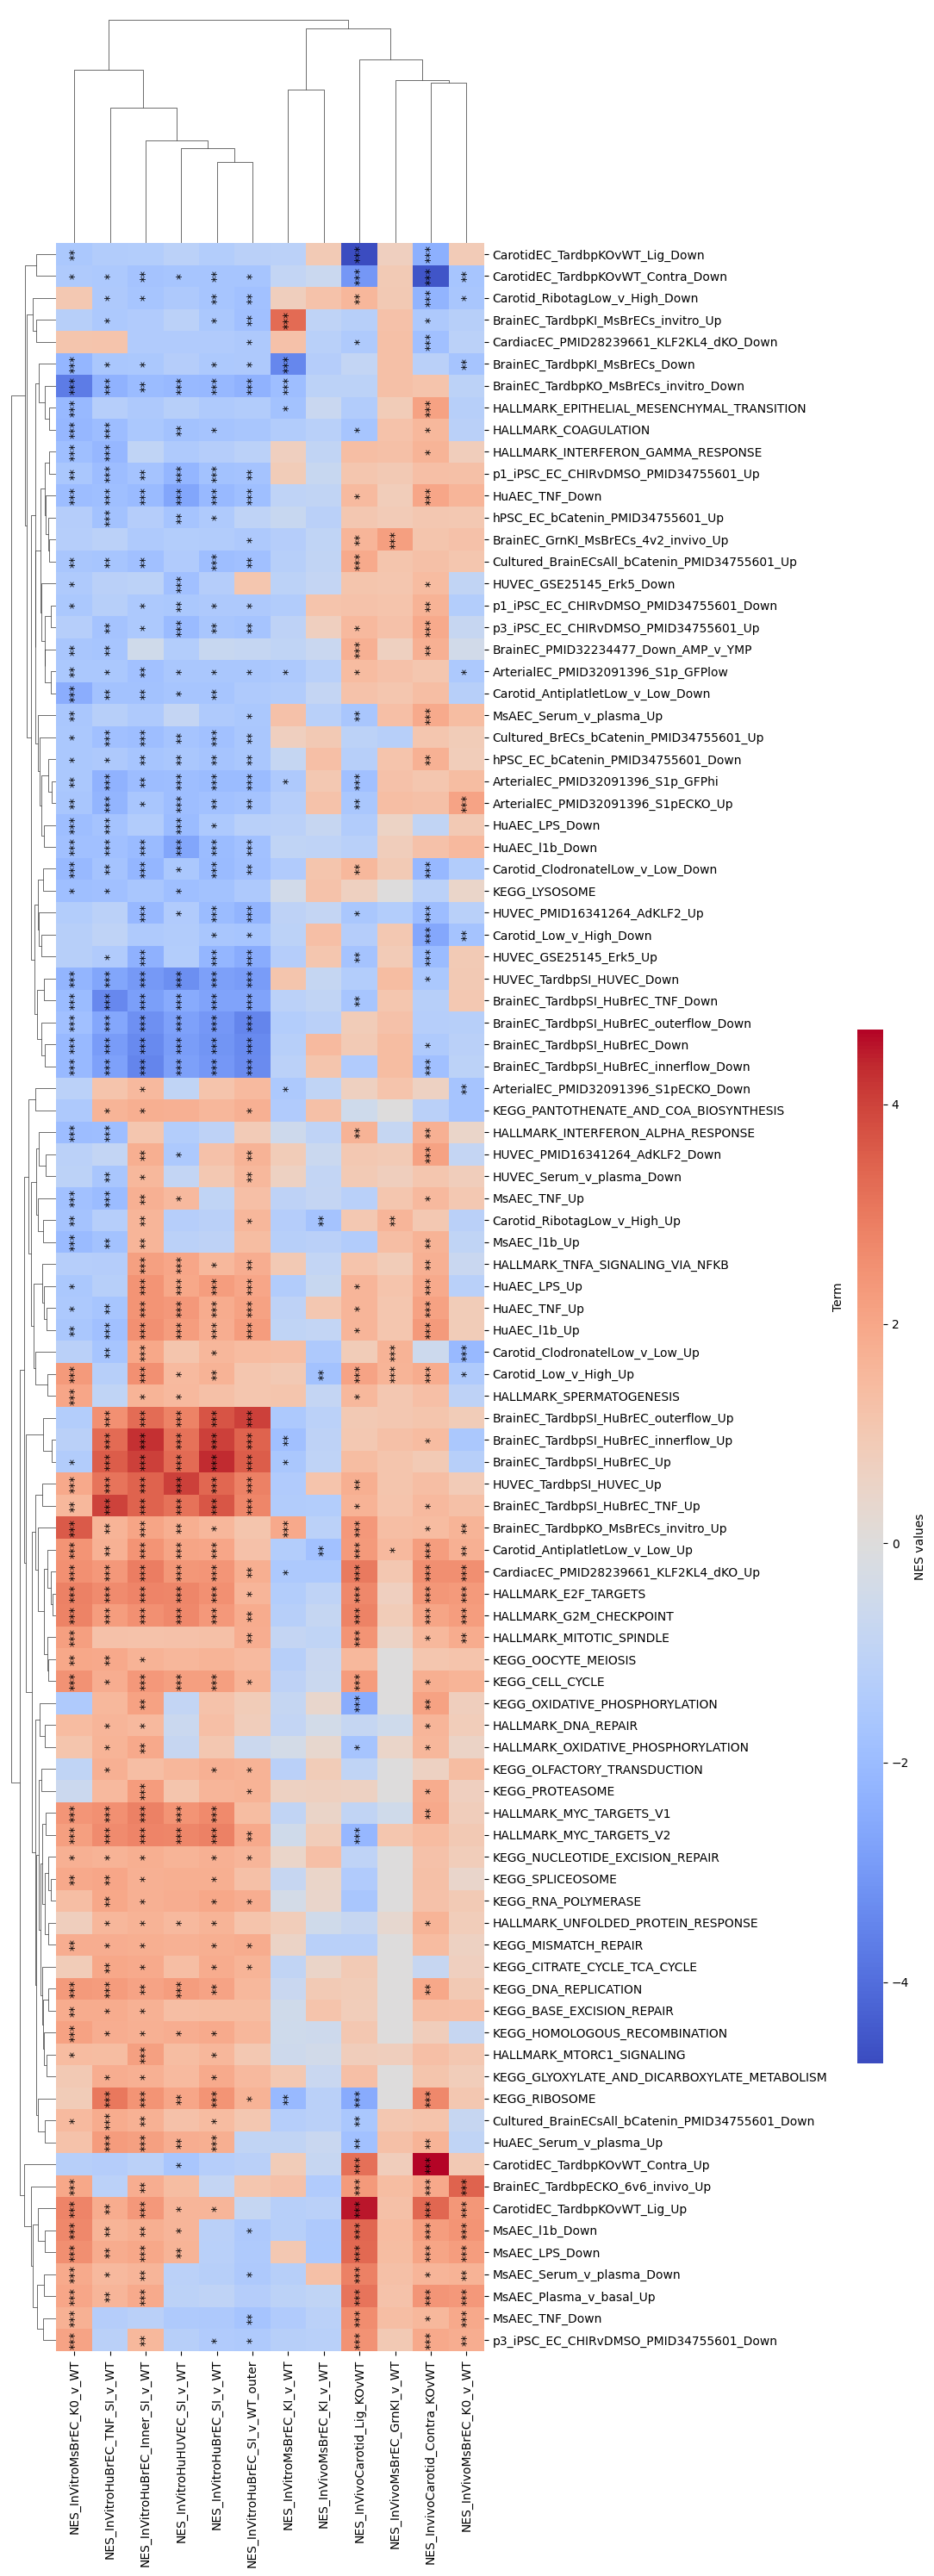

In [184]:
#This is all of the data, and used for string diagram

# List of FWER columns in the merged dataframe
fw_cols = [col for col in combined_df.columns if 'q-val' in col]

# List of direction columns (assuming they are 'NES' columns for example)
direction_cols = [col for col in combined_df.columns if 'NES' in col]

# Create a mask for rows with q-value < 0.1 in at least one datasets
qval_mask = (combined_df[fw_cols] < 0.05).sum(axis=1) >= 3

# For direction, count the number of positive and negative values in direction_cols
positive_counts = (combined_df[direction_cols] > 0).sum(axis=1)
negative_counts = (combined_df[direction_cols] < 0).sum(axis=1)

# Create masks for rows where the count of positive values or negative values is greater than 12
positive_direction_mask = positive_counts > 5
negative_direction_mask = negative_counts > 5

# Combine the two masks using bitwise OR operator
direction_mask = positive_direction_mask | negative_direction_mask

# Combine the two masks using bitwise AND operator
final_mask = qval_mask & direction_mask

# Filter the DataFrame based on the combined mask and specific terms
#filter_strings = ["KEGG", "MSigDB", "BrainEC_TardbpSI", "p3", "p1", "CardiacEC", "CarotidEC", "BrainEC_TardbpKO", "BrainEC_TardbpECKO", "BrainEC_TardbpKO", "HuAEC"]  # Replace with your specific strings
#string_mask = combined_df['Term'].str.contains('|'.join(filter_strings))
#final_mask = final_mask & string_mask
filtered_GSEA_df = combined_df[final_mask]

# Example threshold for significance
significance_threshold = 0.05
threshold_1 = 0.01  # Less than this value will get two asterisks
threshold_2 = 0.001  # Less than this value will get three asterisks

# Columns that contain p-values or q-values
pval_qval_columns = [col for col in filtered_GSEA_df.columns if 'q-val' in col]

# Corrected part for creating the significance matrix
significance_matrix = pd.DataFrame(index=filtered_GSEA_df.index, columns=direction_cols)  # Only NES columns needed

# Corrected part for creating the significance matrix
for col in pval_qval_columns:
    q_values = filtered_GSEA_df[col]
    corresponding_nes_col = col.replace('FDR q-val', 'NES')  # Assuming FDR q-val column names map directly to NES
    
    # Assign asterisks based on significance levels
    significance_matrix[corresponding_nes_col] = q_values.apply(
        lambda x: '***' if x < threshold_2 else ('**' if x < threshold_1 else ('*' if x < significance_threshold else '')))

# Select only the NES columns
# Assuming your DataFrame merged_GSEA_df has columns like 'NES_filename'
nes_cols = [col for col in filtered_GSEA_df.columns if 'NES' in col]
data_for_heatmap = filtered_GSEA_df.set_index('Term')[nes_cols]

# Replace NaN values with 0
data_for_heatmap = data_for_heatmap.fillna(0)

# Transpose the data
transposed_data_for_heatmap = data_for_heatmap.T

# Create the clustered heatmap
g = sns.clustermap(
    data_for_heatmap, 
    method='average', 
    cmap='coolwarm', 
    figsize=(10, 30),
    cbar_kws={"label": "NES values", "shrink": 0.5},
    xticklabels=True, 
    yticklabels=True,
    dendrogram_ratio=(.1, .1),  # Adjust the size of the dendrogram
    cbar_pos=(1, .2, .03, .4)   # Adjust the position of the colorbar
)

# Get the order of rows and columns after clustering
row_order = g.dendrogram_row.reordered_ind
col_order = g.dendrogram_col.reordered_ind

# Reorder the significance matrix to match the clustered heatmap
reordered_significance_matrix = significance_matrix.iloc[row_order, col_order]

# Add asterisks to the heatmap
for y in range(data_for_heatmap.shape[0]):
    for x in range(data_for_heatmap.shape[1]):
        asterisks = reordered_significance_matrix.iloc[y, x]
        if asterisks:  # Only add text if there are asterisks
            g.ax_heatmap.text(x + 0.5, y + 0.5, asterisks, ha='center', va='center', color='black', fontsize=10, rotation=90)

# Save the figure with 600 dpi
g.fig.savefig('/Users/patrickmurphy/Desktop/GSEA_figures/HeatMapNetwork.pdf', dpi=600, format='pdf')

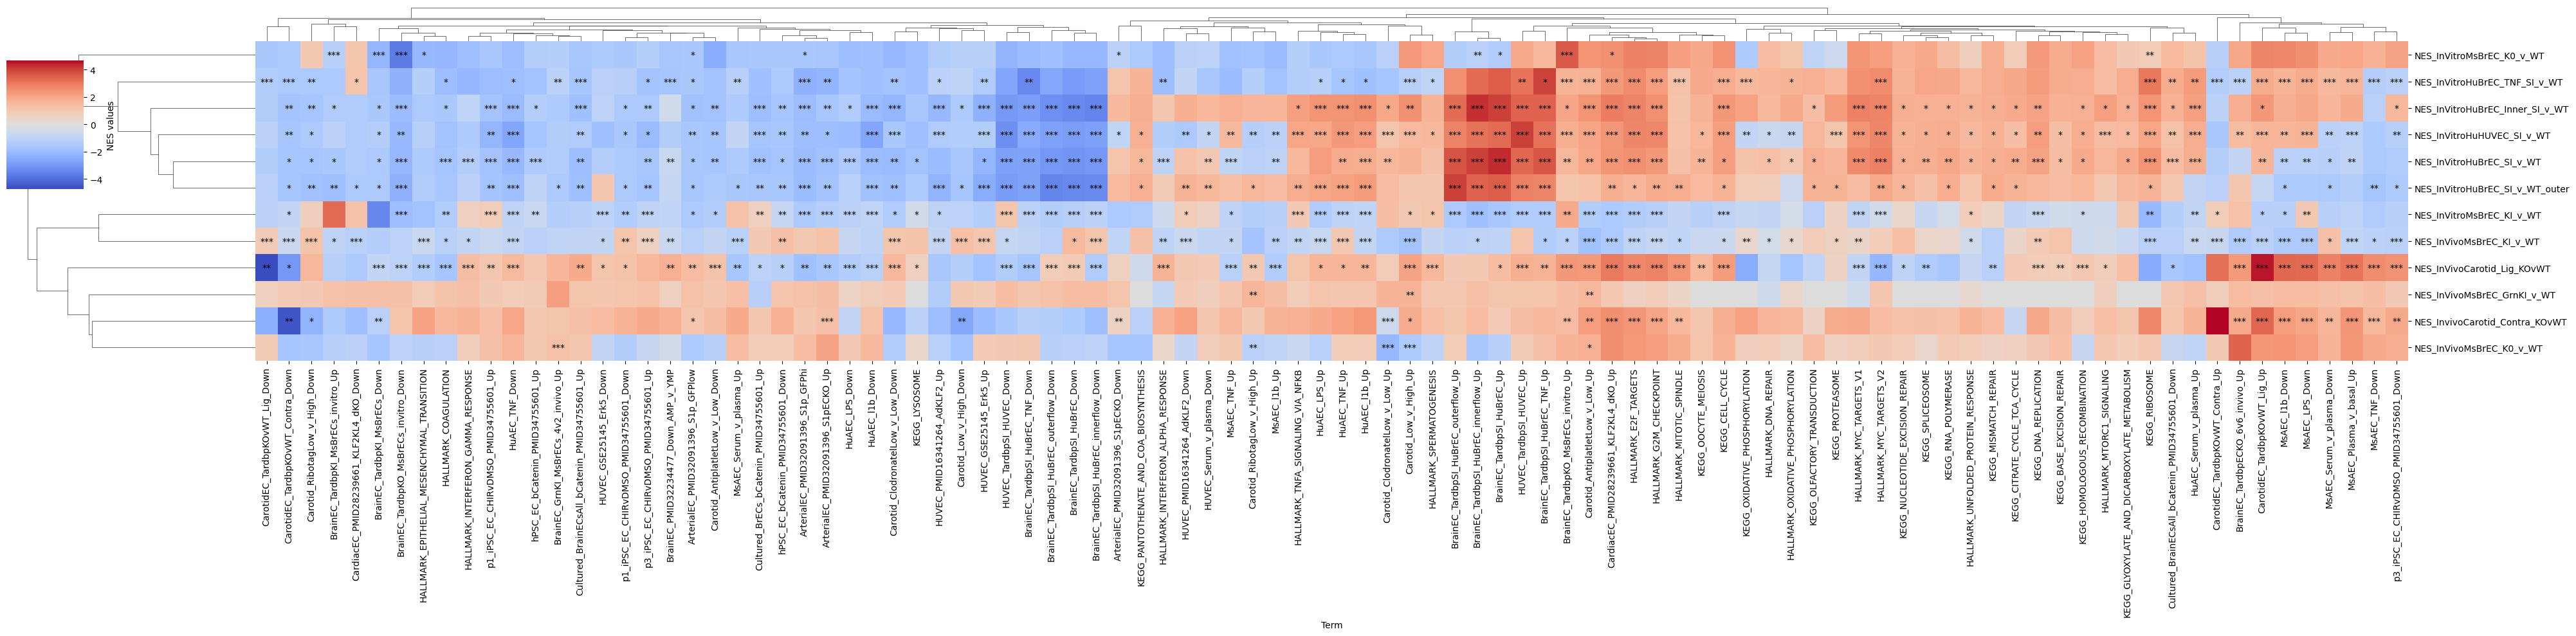

In [183]:
#This is all of the data, and used for string diagram

# List of FWER columns in the merged dataframe
fw_cols = [col for col in combined_df.columns if 'q-val' in col]

# List of direction columns (assuming they are 'NES' columns for example)
direction_cols = [col for col in combined_df.columns if 'NES' in col]

# Create a mask for rows with q-value < 0.1 in at least one datasets
qval_mask = (combined_df[fw_cols] < 0.05).sum(axis=1) >= 3

# For direction, count the number of positive and negative values in direction_cols
positive_counts = (combined_df[direction_cols] > 0).sum(axis=1)
negative_counts = (combined_df[direction_cols] < 0).sum(axis=1)

# Create masks for rows where the count of positive values or negative values is greater than 12
positive_direction_mask = positive_counts > 5
negative_direction_mask = negative_counts > 5

# Combine the two masks using bitwise OR operator
direction_mask = positive_direction_mask | negative_direction_mask

# Combine the two masks using bitwise AND operator
final_mask = qval_mask & direction_mask

# Filter the DataFrame based on the combined mask and specific terms
#filter_strings = ["KEGG", "MSigDB", "BrainEC_TardbpSI", "p3", "p1", "CardiacEC", "CarotidEC", "BrainEC_TardbpKO", "BrainEC_TardbpECKO", "BrainEC_TardbpKO", "HuAEC"]  # Replace with your specific strings
#string_mask = combined_df['Term'].str.contains('|'.join(filter_strings))
#final_mask = final_mask & string_mask
filtered_GSEA_df = combined_df[final_mask]

# Example threshold for significance
significance_threshold = 0.05
threshold_1 = 0.01  # Less than this value will get two asterisks
threshold_2 = 0.001  # Less than this value will get three asterisks

# NES columns
nes_cols = [col for col in filtered_GSEA_df.columns if 'NES' in col]

# Corresponding q-value columns
qval_cols = [col.replace('NES', 'FDR q-val') for col in nes_cols]

# Initialize an empty DataFrame for significance matrix
significance_matrix = pd.DataFrame(index=filtered_GSEA_df.index, columns=nes_cols)

# Fill the significance matrix
for nes_col, qval_col in zip(nes_cols, qval_cols):
    q_values = filtered_GSEA_df[qval_col]
    significance_matrix[nes_col] = q_values.apply(
        lambda x: '***' if x < threshold_2 else ('**' if x < threshold_1 else ('*' if x < significance_threshold else '')))

# Heatmap Creation
# ----------------
data_for_heatmap = filtered_GSEA_df.set_index('Term')[nes_cols].fillna(0).T

# Create the clustered heatmap
g = sns.clustermap(
    data_for_heatmap, 
    method='average', 
    cmap='coolwarm', 
    figsize=(40, 10),  # Adjusted dimensions to accommodate the transposed layout
    cbar_kws={"label": "NES values", "shrink": 0.5},
    xticklabels=True, 
    yticklabels=True,
    dendrogram_ratio=(.1, .1),
    cbar_pos=(0, .7, .03, .2)   # Adjusted colorbar position
)

# Get the order of rows and columns after clustering
row_order = g.dendrogram_row.reordered_ind
col_order = g.dendrogram_col.reordered_ind

# Aligning Significance Matrix
# ----------------------------
# Transpose the significance matrix to align with the heatmap
transposed_significance_matrix = significance_matrix.T

# Apply the row and column order to the significance matrix
reordered_significance_matrix = transposed_significance_matrix.iloc[row_order, :]
reordered_significance_matrix = transposed_significance_matrix.iloc[:, col_order]

# Add asterisks to the heatmap
for y in range(data_for_heatmap.shape[0]):
    for x in range(data_for_heatmap.shape[1]):
        asterisks = reordered_significance_matrix.iloc[y, x]
        if asterisks:
            g.ax_heatmap.text(x + 0.5, y + 0.5, asterisks, ha='center', va='center', color='black', fontsize=10, rotation=0)

# Save the figure
g.fig.savefig('/Users/patrickmurphy/Desktop/GSEA_figures/TransposedHeatMapNetwork.pdf', dpi=600, format='pdf')

In [168]:
filtered_GSEA_df

Term NES_InVitroMsBrEC_KI_v_WT  \
0              BrainEC_TardbpKI_MsBrECs_Down                 -3.435352   
1        BrainEC_TardbpKI_MsBrECs_invitro_Up                  3.314588   
2      BrainEC_TardbpKO_MsBrECs_invitro_Down                 -1.928455   
3        BrainEC_TardbpKO_MsBrECs_invitro_Up                  1.922577   
4         ArterialEC_PMID32091396_S1p_GFPlow                  -1.53458   
..                                       ...                       ...   
354           HUVEC_PMID16341264_AdKLF2_Down                  0.882603   
355       hPSC_EC_bCatenin_PMID34755601_Down                 -0.824187   
357         hPSC_EC_bCatenin_PMID34755601_Up                 -0.748983   
358  Cultured_BrECs_bCatenin_PMID34755601_Up                  0.722726   
359                HUVEC_Serum_v_plasma_Down                  0.648705   

    NOM p-val_InVitroMsBrEC_KI_v_WT FDR q-val_InVitroMsBrEC_KI_v_WT  \
0                               0.0                             0.0   
1                               0.0                             0.0   
2                               0.0                        0.000618   
3                               0.0                             0.0   
4                          0.003413                        0.043684   
..                              ...                             ...   
354                        0.723716                             1.0   
355                        0.837884                        0.916737   
357                        0.940678                        0.948465   
358                        0.927195                             1.0   
359                             1.0                         0.99129   

    FWER p-val_InVitroMsBrEC_KI_v_WT NES_InVivoCarotid_Lig_KOvWT  \
0                                0.0                   -0.890087   
1                                0.0                   -1.215716   
2                              0.001                   -1.080407   
3                                0.0                    2.343537   
4                                0.1                    1.420264   
..                               ...                         ...   
354                              1.0                    1.027299   
355                              1.0                   -1.239003   
357                              1.0                    1.068512   
358                              1.0                   -1.070474   
359                              1.0                    0.947066   

    NOM p-val_InVivoCarotid_Lig_KOvWT FDR q-val_InVivoCarotid_Lig_KOvWT  \
0                            0.695349                          0.734144   
1                              0.1513                          0.139967   
2                            0.321918                          0.318605   
3                                 0.0                               0.0   
4                            0.016667                          0.027619   
..                                ...                               ...   
354                          0.410839                          0.549881   
355                          0.089588                          0.132729   
357                          0.312608                          0.510392   
358                          0.342593                          0.335758   
359                          0.595638                          0.630905   

    FWER p-val_InVivoCarotid_Lig_KOvWT NES_InVitroHuBrEC_SI_v_WT  ...  \
0                                  1.0                 -1.510115  ...   
1                                0.837                 -1.550002  ...   
2                                0.985                 -2.127153  ...   
3                                  0.0                  1.586209  ...   
4                                0.376                 -1.594198  ...   
..                                 ...                       ...  ...   
354                                1.0                  1.256211  ...

In [149]:
transposed_significance_matrix.to_csv('/Users/patrickmurphy/Desktop/GSEA_2023_mouse_custom_wGRN_Filtered_SigT.csv', header=True, index=True)

In [146]:
filtered_GSEA_df.to_csv('/Users/patrickmurphy/Desktop/GSEA_2023_mouse_custom_wGRN_Filtered.csv', header=True, index=True)

In [182]:
print("Shape of data_for_heatmap:", data_for_heatmap.shape)
print("Shape of significance_matrix:", significance_matrix.shape)
print("Shape of transposed_significance_matrix:", transposed_significance_matrix.shape)
print("Shape of reordered_transposed_significance_matrix:", reordered_significance_matrix.shape)

Shape of data_for_heatmap: (12, 96)
Shape of significance_matrix: (96, 12)
Shape of transposed_significance_matrix: (12, 96)
Shape of reordered_transposed_significance_matrix: (96, 12)


In [153]:
reordered_significance_matrix

NES_InVitroMsBrEC_KI_v_WT NES_InVivoMsBrEC_KI_v_WT  \
41                                                       
1                         ***                            
20                                                       
0                         ***                            
2                         ***                            
..                        ...                      ...   
35                                                       
23                                                       
32                                                       
9                                                        
288                                                      

    NES_InVitroMsBrEC_K0_v_WT NES_InVitroHuBrEC_TNF_SI_v_WT  \
41                                                        *   
1                                                         *   
20                                                            
0                         ***                             *   
2                         ***                           ***   
..                        ...                           ...   
35                        ***                            **   
23                        ***                             *   
32                        ***                            **   
9                         ***                                 
288                       ***                                 

    NES_InVitroHuBrEC_Inner_SI_v_WT NES_InVitroHuHUVEC_SI_v_WT  \
41                                *                              
1                                                                
20                                                               
0                                 *                              
2                                **                        ***   
..                              ...                        ...   
35                              ***                         **   
23                               **                              
32                              ***                              
9                                                                
288                              **                              

    NES_InVitroHuBrEC_SI_v_WT NES_InVitroHuBrEC_SI_v_WT_outer  \
41                         **                              **   
1                           *                              **   
20                                                          *   
0                           *                               *   
2                         ***                             ***   
..                        ...                             ...   
35                                                              
23                                                          *   
32                                                              
9                                                          **   
288                         *                               *   

    NES_InVivoCarotid_Lig_KOvWT NES_InvivoCarotid_Contra_KOvWT  \
41                           **                            ***   
1                                                            *   
20                            *                            ***   
0                                                                
2                                                                
..                          ...                            ...   
35                          ***                            ***   
23                          ***                              *   
32                          ***                            ***   
9                           ***                              *   
288                         ***                            ***   

    NES_InVivoMsBrEC_K0_v_WT  
41                         *  
1                             
20                            
0                         **  
2                           

# Plot overlap in terms

In [92]:
# Find the length of the longest list
max_lengthKEGG = max(len(lst) for lst in KEGG_2023_Human_Ms.values())
max_lengthHallmark = max(len(lst) for lst in MSigDB_Hallmark_2023_Ms.values())

# Pad shorter lists with NaN
for key in KEGG_2023_Human_Ms.keys():
    length_difference = max_lengthKEGG - len(KEGG_2023_Human_Ms[key])
    if length_difference > 0:
        KEGG_2023_Human_Ms[key].extend([float('nan')] * length_difference)

for key in MSigDB_Hallmark_2023_Ms.keys():
    length_difference = max_lengthHallmark - len(MSigDB_Hallmark_2023_Ms[key])
    if length_difference > 0:
        MSigDB_Hallmark_2023_Ms[key].extend([float('nan')] * length_difference)
        
# Convert dict to df
df_KEGG_2023_Human_Ms = pd.DataFrame.from_dict(KEGG_2023_Human_Ms)
df_MSigDB_Hallmark_2023_Ms = pd.DataFrame.from_dict(MSigDB_Hallmark_2023_Ms)

# Combine custom dataframes
GSEAterms_df = pd.concat([df_mouse, df_human_MmGeneID, df_KEGG_2023_Human_Ms, df_MSigDB_Hallmark_2023_Ms], axis=1)

# Get the list of index values from data_for_heatmap
index_values_to_keep = data_for_heatmap.index.tolist()

# Filter GSEAterms_df to include only columns whose names match the terms
GSEAterms_df_filtered = GSEAterms_df[GSEAterms_df.columns.intersection(index_values_to_keep)]

In [93]:
data_for_heatmap

NES_InVitroMsBrEC_KI_v_WT  \
Term                                                                 
BrainEC_TardbpKI_MsBrECs_Down                            -3.435352   
BrainEC_TardbpKI_MsBrECs_invitro_Up                       3.314588   
BrainEC_TardbpKO_MsBrECs_invitro_Down                    -1.928455   
BrainEC_TardbpKO_MsBrECs_invitro_Up                       1.922577   
ArterialEC_PMID32091396_S1p_GFPlow                       -1.534580   
...                                                            ...   
HUVEC_PMID16341264_AdKLF2_Down                            0.882603   
hPSC_EC_bCatenin_PMID34755601_Down                       -0.824187   
hPSC_EC_bCatenin_PMID34755601_Up                         -0.748983   
Cultured_BrECs_bCatenin_PMID34755601_Up                   0.722726   
HUVEC_Serum_v_plasma_Down                                 0.648705   

                                         NES_InVivoCarotid_Lig_KOvWT  \
Term                                                                   
BrainEC_TardbpKI_MsBrECs_Down                              -0.890087   
BrainEC_TardbpKI_MsBrECs_invitro_Up                        -1.215716   
BrainEC_TardbpKO_MsBrECs_invitro_Down                      -1.080407   
BrainEC_TardbpKO_MsBrECs_invitro_Up                         2.343537   
ArterialEC_PMID32091396_S1p_GFPlow                          1.420264   
...                                                              ...   
HUVEC_PMID16341264_AdKLF2_Down                              1.027299   
hPSC_EC_bCatenin_PMID34755601_Down                         -1.239003   
hPSC_EC_bCatenin_PMID34755601_Up                            1.068512   
Cultured_BrECs_bCatenin_PMID34755601_Up                    -1.070474   
HUVEC_Serum_v_plasma_Down                                   0.947066   

                                         NES_InVitroHuBrEC_SI_v_WT  \
Term                                                                 
BrainEC_TardbpKI_MsBrECs_Down                            -1.510115   
BrainEC_TardbpKI_MsBrECs_invitro_Up                      -1.550002   
BrainEC_TardbpKO_MsBrECs_invitro_Down                    -2.127153   
BrainEC_TardbpKO_MsBrECs_invitro_Up                       1.586209   
ArterialEC_PMID32091396_S1p_GFPlow                       -1.594198   
...                                                            ...   
HUVEC_PMID16341264_AdKLF2_Down                            1.256211   
hPSC_EC_bCatenin_PMID34755601_Down                       -1.697533   
hPSC_EC_bCatenin_PMID34755601_Up                         -1.431296   
Cultured_BrECs_bCatenin_PMID34755601_Up                  -1.808533   
HUVEC_Serum_v_plasma_Down                                 1.035700   

                                         NES_InVitroHuBrEC_Inner_SI_v_WT  \
Term                                                                       
BrainEC_TardbpKI_MsBrECs_Down                                  -1.540086   
BrainEC_TardbpKI_MsBrECs_invitro_Up                            -1.408736   
BrainEC_TardbpKO_MsBrECs_invitro_Down                          -2.014669   
BrainEC_TardbpKO_MsBrECs_invitro_Up                             2.034459   
ArterialEC_PMID32091396_S1p_GFPlow                             -1.809185   
...                                                                  ...   
HUVEC_PMID16341264_AdKLF2_Down                                  1.802141   
hPSC_EC_bCatenin_PMID34755601_Down                             -1.680375   
hPSC_EC_bCatenin_PMID34755601_Up                               -1.289024   
Cultured_BrECs_bCatenin_PMID34755601_Up                        -1.913598   
HUVEC_Serum_v_plasma_Down                                       1.529244   

                                         NES_InVitroHuBrEC_TNF_SI_v_WT  \
Term                                                                     
BrainEC_TardbpKI_MsBrECs_Down                                -1.600441   
BrainEC_TardbpKI_MsBrECs_invitro_Up                          -1.519883 

In [94]:
# Create an empty dictionary with current column names as keys
column_mapping = {col: None for col in GSEAterms_df_filtered.columns}

# Print the dictionary with both key and value in quotes on a new line
for key, value in column_mapping.items():
    print(f'"{key}": "{value}",')

"MsAEC_TNF_Up": "None",
"MsAEC_l1b_Up": "None",
"MsAEC_Plasma_v_basal_Up": "None",
"MsAEC_Serum_v_plasma_Up": "None",
"Carotid_Low_v_High_Up": "None",
"Carotid_AntiplatletLow_v_Low_Up": "None",
"Carotid_ClodronatelLow_v_Low_Up": "None",
"Carotid_RibotagLow_v_High_Up": "None",
"BrainEC_TardbpECKO_6v6_invivo_Up": "None",
"BrainEC_TardbpKI_MsBrECs_invitro_Up": "None",
"CarotidEC_TardbpKOvWT_Contra_Up": "None",
"CarotidEC_TardbpKOvWT_Lig_Up": "None",
"BrainEC_TardbpKO_MsBrECs_invitro_Up": "None",
"MsAEC_TNF_Down": "None",
"MsAEC_LPS_Down": "None",
"MsAEC_l1b_Down": "None",
"MsAEC_Serum_v_plasma_Down": "None",
"Carotid_Low_v_High_Down": "None",
"Carotid_AntiplatletLow_v_Low_Down": "None",
"Carotid_ClodronatelLow_v_Low_Down": "None",
"Carotid_RibotagLow_v_High_Down": "None",
"CarotidEC_TardbpKOvWT_Contra_Down": "None",
"CarotidEC_TardbpKOvWT_Lig_Down": "None",
"BrainEC_TardbpKO_MsBrECs_invitro_Down": "None",
"BrainEC_TardbpKI_MsBrECs_Down": "None",
"ArterialEC_PMID32091396_S1p_GFPlow": "None

In [106]:
# Create a dictionary to map old column names to new column names
column_mapping = {"MsAEC_TNF_Up":"MsAEC_TNF_Up",
"MsAEC_l1b_Up":"MsAEC_l1b_Up",
"MsAEC_Plasma_v_basal_Up":"MsAEC_Plasma_Up",
"MsAEC_Serum_v_plasma_Up":"MsAEC_Serum_Up",
"Carotid_Low_v_High_Up":"Carotid_LowFlow_Up",
"Carotid_AntiplatletLow_v_Low_Up":"Carotid_PlatletDepl_Up",
"Carotid_ClodronatelLow_v_Low_Up":"Carotid_MacroDepl_Up",
"Carotid_RibotagLow_v_High_Up":"Carotid_RiobotagLowFlow_Up",
"BrainEC_TardbpECKO_6v6_invivo_Up":"BrEC_invivo_KO_Up",
"BrainEC_TardbpKI_MsBrECs_invitro_Up":"BrEC_invitro_KI_Up",
"CarotidEC_TardbpKOvWT_Contra_Up":"Carotid_KO_Contra_Up",
"CarotidEC_TardbpKOvWT_Lig_Up":"Carotid_KO_Lig_Up",
"BrainEC_TardbpKO_MsBrECs_invitro_Up":"BrEC_invitro_KO_Up",
"MsAEC_TNF_Down":"MsAEC_TNF_Down",
"MsAEC_LPS_Down":"MsAEC_LPS_Down",
"MsAEC_l1b_Down":"MsAEC_l1b_Down",
"MsAEC_Serum_v_plasma_Down":"MsAEC_Serum_Down",
"Carotid_Low_v_High_Down":"Carotid_LowFlow_Down",
"Carotid_AntiplatletLow_v_Low_Down":"Carotid_PlatletDepl_Down",
"Carotid_ClodronatelLow_v_Low_Down":"Carotid_MacroDepl_Down",
"Carotid_RibotagLow_v_High_Down":"Carotid_RiobotagLowFlow_Down",
"CarotidEC_TardbpKOvWT_Contra_Down":"Carotid_KO_Contra_Down",
"CarotidEC_TardbpKOvWT_Lig_Down":"Carotid_KO_Lig_Down",
"BrainEC_TardbpKO_MsBrECs_invitro_Down":"BrEC_invivo_KO_Down",
"BrainEC_TardbpKI_MsBrECs_Down":"BrEC_invitro_KI_Down",
"ArterialEC_PMID32091396_S1p_GFPlow":"MsAortEC_S1p_GFPlow",
"ArterialEC_PMID32091396_S1p_GFPhi":"MsAortEC_S1p_GFPhi",
"ArterialEC_PMID32091396_S1pECKO_Down":"MsAortEC_S1pKO_Down",
"ArterialEC_PMID32091396_S1pECKO_Up":"MsAortEC_S1pKO_Up",
"BrainEC_PMID32234477_Down_AMP_v_YMP":"BrEC_AgedPlasma_Down",
"CardiacEC_PMID28239661_KLF2KL4_dKO_Up":"MsCardiacEC_KLF2KLF4dKO_Up",
"CardiacEC_PMID28239661_KLF2KL4_dKO_Down":"MsCardiacEC_KLF2KLF4dKO_Down",
"Cultured_BrainECsAll_bCatenin_PMID34755601_Down":"MsBrEC_bCateninAgonist_Down",
"Cultured_BrainECsAll_bCatenin_PMID34755601_Up":"MsBrEC_bCateninAgonist_Up",
"HuAEC_TNF_Up":"HuAEC_TNF_Up",
"HuAEC_LPS_Up":"HuAEC_LPS_Up",
"HuAEC_l1b_Up":"HuAEC_l1b_Up",
"HuAEC_Serum_v_plasma_Up":"HuAEC_Serum_Up",
"BrainEC_TardbpSI_HuBrEC_Up":"HuBrEC_TDPsi_Up",
"BrainEC_TardbpSI_HuBrEC_outerflow_Up":"HuBrEC_TDPsi_outerflow_Up",
"BrainEC_TardbpSI_HuBrEC_innerflow_Up":"HuBrEC_TDPsi_innerflow_Up",
"BrainEC_TardbpSI_HuBrEC_TNF_Up":"HuBrEC_TDPsi_TNF_Up",
"HUVEC_TardbpSI_HUVEC_Up":"HUVEC_TDPsi_Up",
"hPSC_EC_bCatenin_PMID34755601_Up":"Concordant_bCateninAgosist_Up",
"Cultured_BrECs_bCatenin_PMID34755601_Up":"HuBrEC_bCateninAgonist_Up",
"p3_iPSC_EC_CHIRvDMSO_PMID34755601_Up":"iPSCBrECp3_bCateninAgonsity_Up",
"p1_iPSC_EC_CHIRvDMSO_PMID34755601_Up":"iPSCBrECp1_bCateninAgonsity_Up",
"HUVEC_Serum_v_plasma_Down":"HUVEC_Serum_Down",
"HuAEC_TNF_Down":"HuAEC_TNF_Down",
"HuAEC_LPS_Down":"HuAEC_LPS_Down",
"HuAEC_l1b_Down":"HuAEC_l1b_Down",
"BrainEC_TardbpSI_HuBrEC_Down":"HuBrEC_TDPsi_Down",
"BrainEC_TardbpSI_HuBrEC_outerflow_Down":"HuBrEC_TDPsi_outerflow_Down",
"BrainEC_TardbpSI_HuBrEC_innerflow_Down":"HuBrEC_TDPsi_innerflow_Down",
"BrainEC_TardbpSI_HuBrEC_TNF_Down":"HuBrEC_TDPsi_TNF_Down",
"HUVEC_TardbpSI_HUVEC_Down":"HUVEC_TDPsi_Down",
"hPSC_EC_bCatenin_PMID34755601_Down":"Concordant_bCateninAgosist_Down",
"p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down":"iPSCBrECp3_bCateninAgonsity_Down",
"p1_iPSC_EC_CHIRvDMSO_PMID34755601_Down":"iPSCBrECp1_bCateninAgonsity_Down",
"HUVEC_GSE25145_Erk5_Up":"HUVEC_ErkOE_Up",
"HUVEC_GSE25145_Erk5_Down":"HUVEC_ErkOE_Down",
"HUVEC_PMID16341264_AdKLF2_Up":"HUVEC_KLF2OE_Up",
"HUVEC_PMID16341264_AdKLF2_Down":"HUVEC_KLF2OE_Down",
"KEGG_BASE_EXCISION_REPAIR":"BASE_EXCISION_REPAIR",
"KEGG_CELL_CYCLE":"CELL_CYCLE",
"KEGG_CITRATE_CYCLE_TCA_CYCLE":"TCA_CYCLE",
"KEGG_DNA_REPLICATION":"DNA_REPLICATION",
"KEGG_GLYOXYLATE_AND_DICARBOXYLATE_METABOLISM":"GLYOXYLATE_METABOLISM",
"KEGG_HOMOLOGOUS_RECOMBINATION":"HOMOLOGOUS_RECOMBINATION",
"KEGG_LYSOSOME":"LYSOSOME",
"KEGG_MISMATCH_REPAIR":"MISMATCH_REPAIR",
"KEGG_NUCLEOTIDE_EXCISION_REPAIR":"NUCLEOTIDE_EXCISION_REPAIR",
"KEGG_OLFACTORY_TRANSDUCTION":"OLFACTORY_TRANSDUCTION",
"KEGG_OOCYTE_MEIOSIS":"OOCYTE_MEIOSIS",
"KEGG_OXIDATIVE_PHOSPHORYLATION":"OX_PHOS",
"KEGG_PANTOTHENATE_AND_COA_BIOSYNTHESIS":"COA_BIOSYNTH",
"KEGG_PROTEASOME":"PROTEASOME",
"KEGG_RIBOSOME":"RIBOSOME",
"KEGG_RNA_POLYMERASE":"RNA_POLYMERASE",
"KEGG_SPLICEOSOME":"SPLICEOSOME",
"HALLMARK_COAGULATION":"COAGULATION",
"HALLMARK_DNA_REPAIR":"DNA_REPAIR",
"HALLMARK_E2F_TARGETS":"E2F_TARGETS",
"HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION":"EMT",
"HALLMARK_G2M_CHECKPOINT":"G2M_CHECK",
"HALLMARK_INTERFERON_ALPHA_RESPONSE":"IFNA_RESPONSE",
"HALLMARK_INTERFERON_GAMMA_RESPONSE":"IFNG_RESPONSE",
"HALLMARK_MITOTIC_SPINDLE":"MITOTIC_SPINDLE",
"HALLMARK_MTORC1_SIGNALING":"MTORC1",
"HALLMARK_MYC_TARGETS_V1":"MYC_TARGET_1",
"HALLMARK_MYC_TARGETS_V2":"MYC_TARGET_2",
"HALLMARK_OXIDATIVE_PHOSPHORYLATION":"OX_PHOS_2",
"HALLMARK_SPERMATOGENESIS":"SPERMATOGENESIS",
"HALLMARK_TNFA_SIGNALING_VIA_NFKB":"TNF/NFKBSIGNALING",
"HALLMARK_UNFOLDED_PROTEIN_RESPONSE":"UPR"}

# Create a copy of GSEAterms_df_filtered
GSEAterms_df_filtered_copy = GSEAterms_df_filtered.copy()

# Use the rename method to replace column names in the copy
GSEAterms_df_filtered_copy.rename(columns=column_mapping, inplace=True)

In [107]:
GSEAterms_df_filtered_copy

MsAEC_TNF_Up MsAEC_l1b_Up MsAEC_Plasma_Up MsAEC_Serum_Up  \
0           Ccl7         Lcn2            Car2           Lcn2   
1         Sprr2e         Ccl2   1810011O10Rik      Serpina3g   
2           Saa3          Il6   2210404O07Rik           Ccl7   
3          Ccl20         Ccl7         Angptl4      Serpina3n   
4           Gbp5         Vnn3           Fkbp5          Klra4   
..           ...          ...             ...            ...   
384          NaN          NaN             NaN            NaN   
385          NaN          NaN             NaN            NaN   
386          NaN          NaN             NaN            NaN   
387          NaN          NaN             NaN            NaN   
388          NaN          NaN             NaN            NaN   

    Carotid_LowFlow_Up Carotid_PlatletDepl_Up Carotid_MacroDepl_Up  \
0               Angpt2                 Fam83d               Treml4   
1                Cd177                     Tg                Pira6   
2                  Kit                   Mxd3                 Ly6i   
3              Cd300lf                   Prnd        9830107B12Rik   
4                 Il1b                  Trem1               Lrrc55   
..                 ...                    ...                  ...   
384                NaN                    NaN                  NaN   
385                NaN                    NaN                  NaN   
386                NaN                    NaN                  NaN   
387                NaN                    NaN                  NaN   
388                NaN                    NaN                  NaN   

    Carotid_RiobotagLowFlow_Up BrEC_invivo_KO_Up BrEC_invitro_KI_Up  ...  \
0                      Fam184a            Shcbp1              Foxa2  ...   
1                        Naip6            Pimreg               Mael  ...   
2                       Trim29             Ackr2               Apob  ...   
3                       Ptger2             Bub1b            Gm37672  ...   
4                       Igfbp2              Sprn            Clca3a2  ...   
..                         ...               ...                ...  ...   
384                        NaN               NaN                NaN  ...   
385                        NaN               NaN                NaN  ...   
386                        NaN               NaN                NaN  ...   
387                        NaN               NaN                NaN  ...   
388                        NaN               NaN                NaN  ...   

    IFNA_RESPONSE IFNG_RESPONSE MITOTIC_SPINDLE MTORC1 MYC_TARGET_1  \
0            Adar          Adar            Abi1  Abcf2        Abce1   
1             B2m         Apol6            Abl1  Acaca         Acp1   
2           Batf2        Arid5b             Abr   Acly        Aimp2   
3            Bst2         Arl4a           Actn4  Acsl3        Ap3s1   
4            C1s1         Auts2          Akap13  Actr2        Apex1   
..            ...           ...             ...    ...          ...   
384           NaN           NaN             NaN    NaN          NaN   
385           NaN           NaN             NaN    NaN          NaN   
386           NaN           NaN             NaN    NaN          NaN   
387           NaN           NaN             NaN    NaN          NaN   
388           NaN           NaN             NaN    NaN          NaN   

    MYC_TARGET_2 OX_PHOS_2 SPERMATOGENESIS TNF/NFKBSIGNALING       UPR  
0          Aimp2     Abcb7             Ace             Abca1  Aldh18a1  
1           Bysl    Acaa1b           Acrbp             Ackr3   Arfgap1  
2           Cbx3     Acaa2           Acrv1              Areg      Asns  
3           Cdk4     Acadm          Actl7b              Atf3      Atf3  
4         Dctpp1    Acadsb           Adad1            Atp2b1      Atf4  
..           ...       ...             ...               ...       ...  
384          NaN       NaN             NaN               NaN       NaN  
385          NaN       NaN             NaN  

In [108]:
# Check for duplicate column names
duplicate_columns = GSEAterms_df_filtered_copy.columns[GSEAterms_df_filtered_copy.columns.duplicated()]
print("Duplicate columns:", duplicate_columns)


Duplicate columns: Index([], dtype='object')


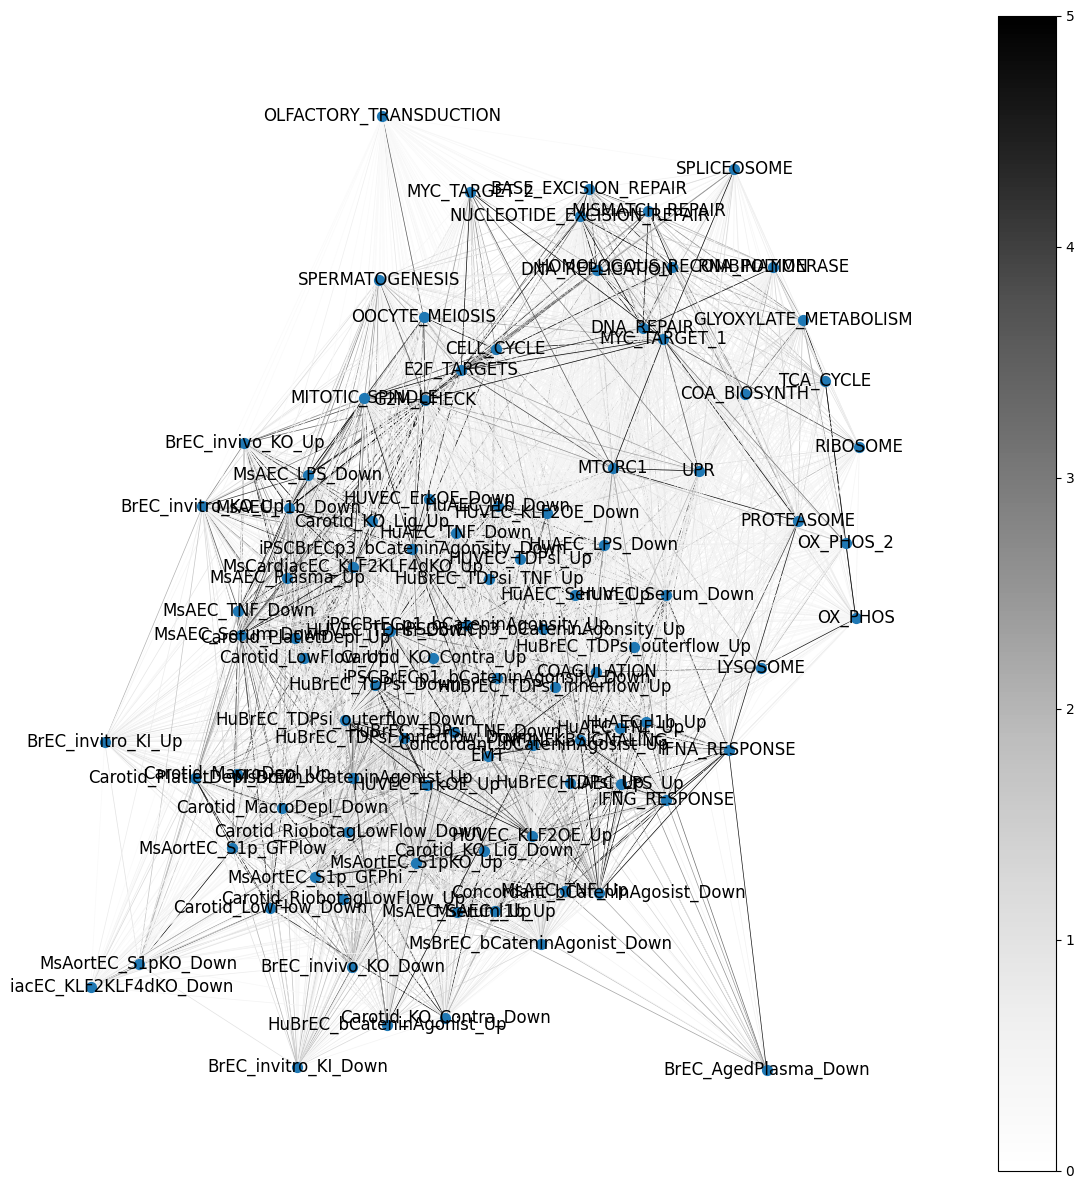

In [109]:
# Create a dictionary to store the mapping between node numbers and term names
node_names = {i: termgsea for i, termgsea in enumerate(GSEAterms_df_filtered_copy.columns)}

G = nx.Graph()

# Add nodes to the graph with numbering and store the mapping
for node, termgsea in node_names.items():
    G.add_node(node, label=termgsea)  # Add node with number and term label

    
# Add edges to the graph based on gene similarities
for i, term1 in enumerate(GSEAterms_df_filtered_copy.columns):
    for j, term2 in enumerate(GSEAterms_df_filtered_copy.columns):
        if i < j:  # Avoid self-loop and redundant connections
            genes1 = set(GSEAterms_df_filtered_copy[term1].dropna())
            genes2 = set(GSEAterms_df_filtered_copy[term2].dropna())
            common_genes = genes1.intersection(genes2)
            total_genes = genes1.union(genes2)
            num_total_genes = len(total_genes)
            num_common_genes = len(common_genes)
            if num_total_genes > 0:  # Avoid division by zero
                percent_overlap = (num_common_genes / num_total_genes) * 100
                if percent_overlap > 0:
                    G.add_edge(i, j, weight=percent_overlap, width=percent_overlap)

    
# Remove isolated nodes (those not connected to any other node)
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

for node in list(G.nodes()):
    if G.degree(node) <= 1:
        G.remove_node(node)

# After modifying the graph (adding/removing nodes and edges)
pos = nx.spring_layout(G)  # Recalculate positions for the updated graph

# Update node_labels only for nodes present in the updated graph
node_labels = {node: node_names[node] for node in G.nodes()}
        
# Now you can draw the graph
fig, ax = plt.subplots(figsize=(15, 15))

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes

# Extracting weights from the graph for edge colors
weights = [G[u][v]['weight'] for u, v in G.edges()]

# Normalize the weights to a fixed range between 0 and 100 for coloring
norm = mcolors.Normalize(vmin=0, vmax=5)  # set fixed scale here

# Choose a colormap
cmap = plt.cm.Greys  # using Greys colormap for black and grey color scale

# Draw the graph with term labels
node_labels = {node: label for node, label in node_names.items()}
nx.draw(G, pos, labels=node_labels, with_labels=True,
        font_size=12,  # Adjust font size as needed
        edge_color=[cmap(norm(w)) for w in weights],
        width=0.5,  # Fixed thin width
        node_size=50,  # Adjust node size as needed
        ax=ax)

# Optionally, you can add a colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax)

plt.show()

# Save the figure as a PDF with 600 dpi
fig.savefig('/Users/patrickmurphy/Desktop/GSEA_figures/NetworkCustom.pdf', dpi=600, format='pdf')

In [110]:
node_labels

{0: 'MsAEC_TNF_Up',
 1: 'MsAEC_l1b_Up',
 2: 'MsAEC_Plasma_Up',
 3: 'MsAEC_Serum_Up',
 4: 'Carotid_LowFlow_Up',
 5: 'Carotid_PlatletDepl_Up',
 6: 'Carotid_MacroDepl_Up',
 7: 'Carotid_RiobotagLowFlow_Up',
 8: 'BrEC_invivo_KO_Up',
 9: 'BrEC_invitro_KI_Up',
 10: 'Carotid_KO_Contra_Up',
 11: 'Carotid_KO_Lig_Up',
 12: 'BrEC_invitro_KO_Up',
 13: 'MsAEC_TNF_Down',
 14: 'MsAEC_LPS_Down',
 15: 'MsAEC_l1b_Down',
 16: 'MsAEC_Serum_Down',
 17: 'Carotid_LowFlow_Down',
 18: 'Carotid_PlatletDepl_Down',
 19: 'Carotid_MacroDepl_Down',
 20: 'Carotid_RiobotagLowFlow_Down',
 21: 'Carotid_KO_Contra_Down',
 22: 'Carotid_KO_Lig_Down',
 23: 'BrEC_invivo_KO_Down',
 24: 'BrEC_invitro_KI_Down',
 25: 'MsAortEC_S1p_GFPlow',
 26: 'MsAortEC_S1p_GFPhi',
 27: 'MsAortEC_S1pKO_Down',
 28: 'MsAortEC_S1pKO_Up',
 29: 'BrEC_AgedPlasma_Down',
 30: 'MsCardiacEC_KLF2KLF4dKO_Up',
 31: 'MsCardiacEC_KLF2KLF4dKO_Down',
 32: 'MsBrEC_bCateninAgonist_Down',
 33: 'MsBrEC_bCateninAgonist_Up',
 34: 'HuAEC_TNF_Up',
 35: 'HuAEC_LPS_Up',
 3

# Show individual GSEA plots

In [113]:
###NOTE to plot GSEA terms, need to use the correct results (from merging above)

In [115]:
# Create an empty dictionary with current column names as keys
column_mapping = {col: None for col in GSEAterms_df_filtered.columns}

# Print the dictionary with both key and value in quotes on a new line
for key, value in column_mapping.items():
    print(f'"{key}": "{value}",')

"MsAEC_TNF_Up": "None",
"MsAEC_l1b_Up": "None",
"MsAEC_Plasma_v_basal_Up": "None",
"MsAEC_Serum_v_plasma_Up": "None",
"Carotid_Low_v_High_Up": "None",
"Carotid_AntiplatletLow_v_Low_Up": "None",
"Carotid_ClodronatelLow_v_Low_Up": "None",
"Carotid_RibotagLow_v_High_Up": "None",
"BrainEC_TardbpECKO_6v6_invivo_Up": "None",
"BrainEC_TardbpKI_MsBrECs_invitro_Up": "None",
"CarotidEC_TardbpKOvWT_Contra_Up": "None",
"CarotidEC_TardbpKOvWT_Lig_Up": "None",
"BrainEC_TardbpKO_MsBrECs_invitro_Up": "None",
"MsAEC_TNF_Down": "None",
"MsAEC_LPS_Down": "None",
"MsAEC_l1b_Down": "None",
"MsAEC_Serum_v_plasma_Down": "None",
"Carotid_Low_v_High_Down": "None",
"Carotid_AntiplatletLow_v_Low_Down": "None",
"Carotid_ClodronatelLow_v_Low_Down": "None",
"Carotid_RibotagLow_v_High_Down": "None",
"CarotidEC_TardbpKOvWT_Contra_Down": "None",
"CarotidEC_TardbpKOvWT_Lig_Down": "None",
"BrainEC_TardbpKO_MsBrECs_invitro_Down": "None",
"BrainEC_TardbpKI_MsBrECs_Down": "None",
"ArterialEC_PMID32091396_S1p_GFPlow": "None

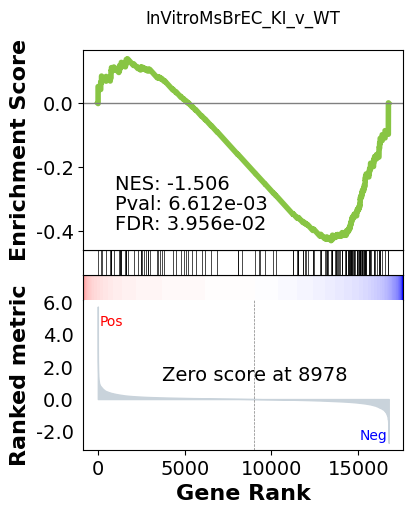

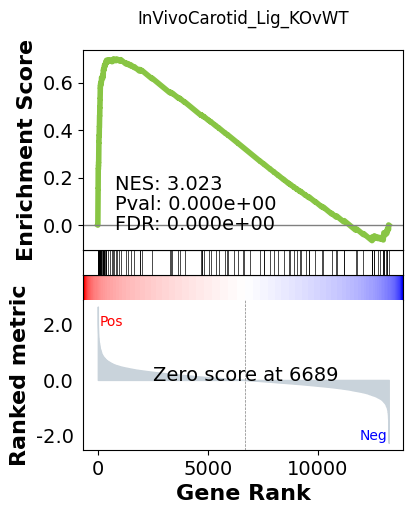

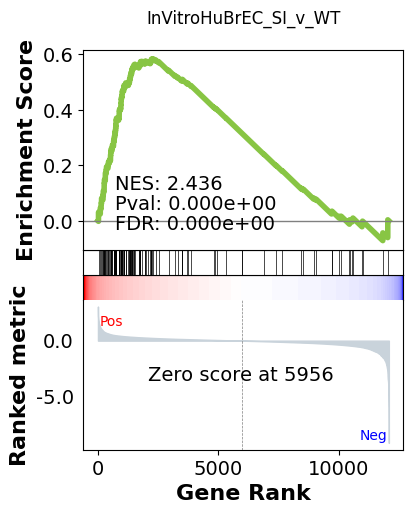

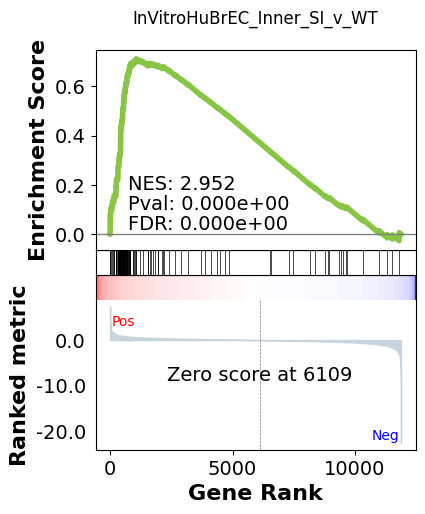

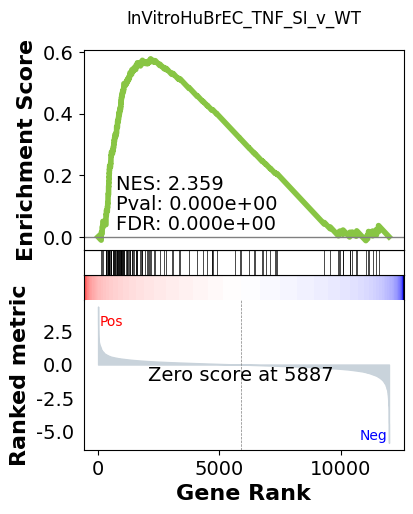

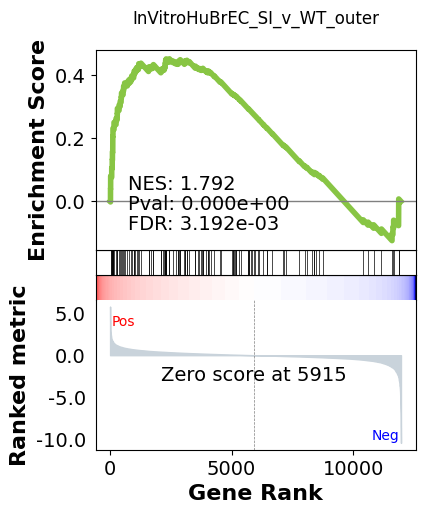

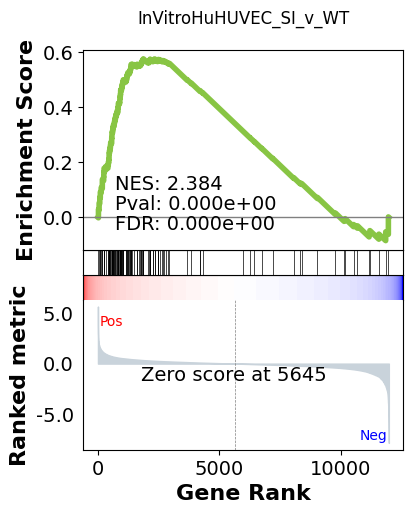

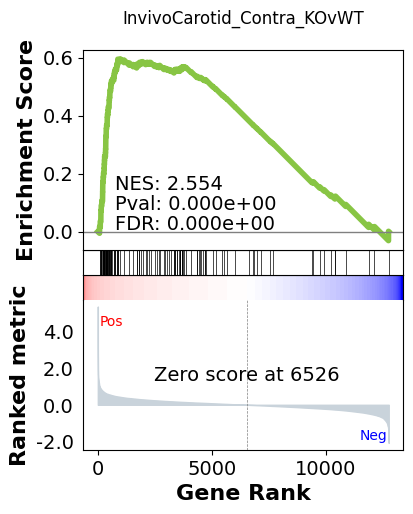

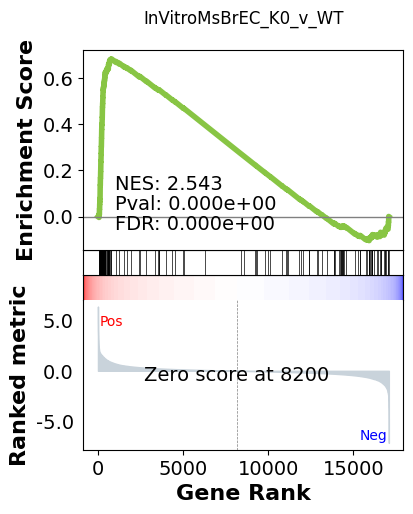

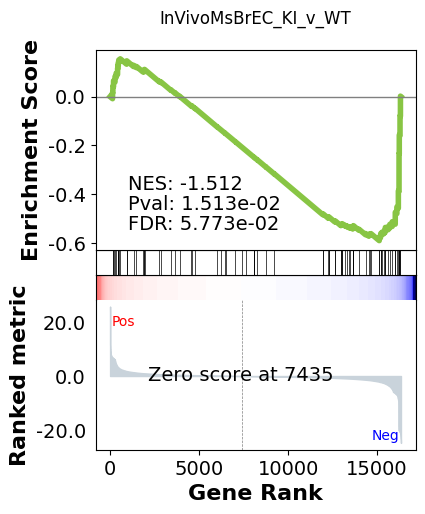

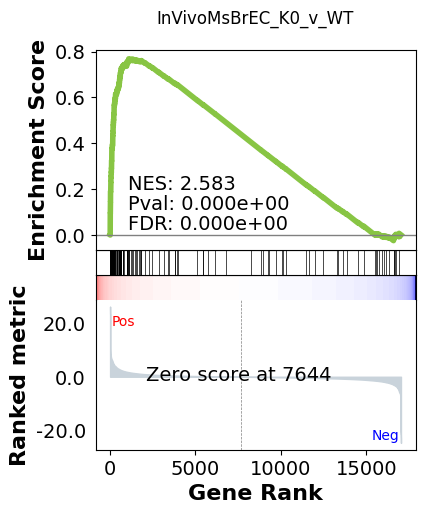

In [116]:
term_search = 'CardiacEC_PMID28239661_KLF2KL4_dKO_Up'

# Create a directory for the term if it doesn't exist
path = f"/Users/patrickmurphy/Desktop/GSEA_figures/{term_search}"
if not os.path.exists(path):
    os.makedirs(path)

# Loop through each item in the dictionary and plot
for title, data in gsea_result_custom.items():
    # Plot the data
    fig = data.plot(terms=term_search)
    
    # Set the title of the plot
    fig.suptitle(title)

    # Save the plot as a PDF in the specific term folder
    fig.savefig(f"{path}/{title.replace(' ', '_')}.pdf", format='pdf')
        
    # Display the plot
    plt.show()

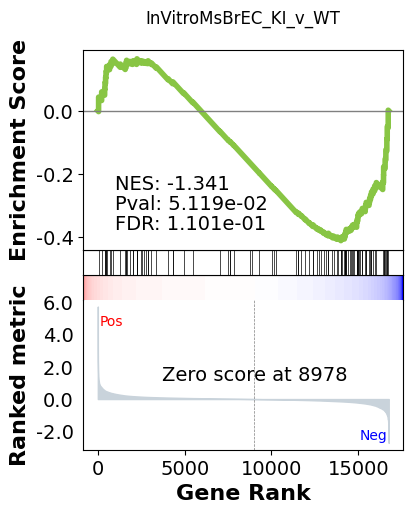

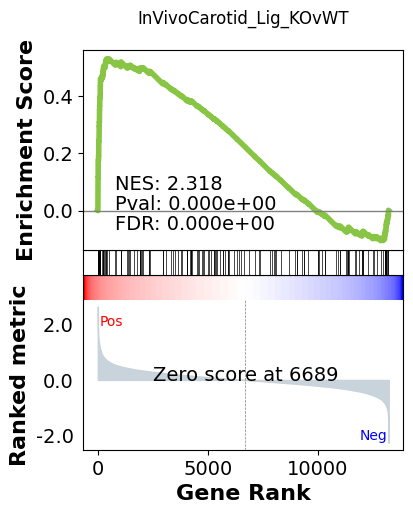

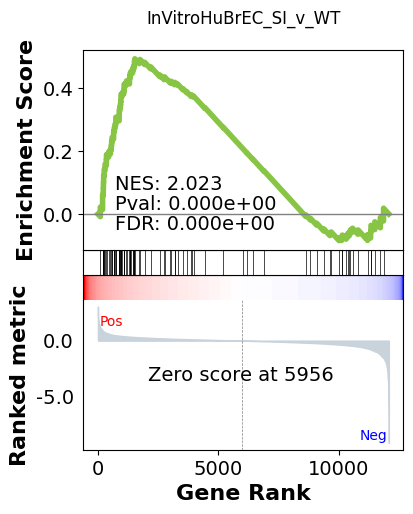

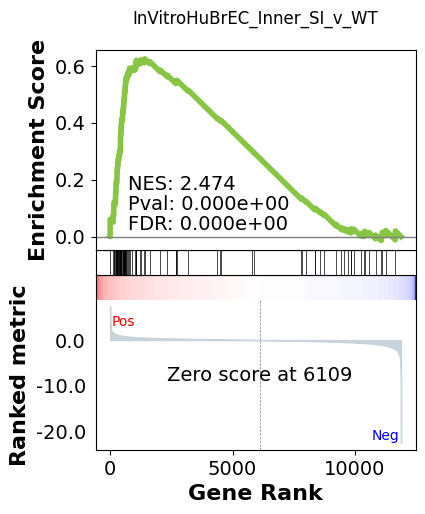

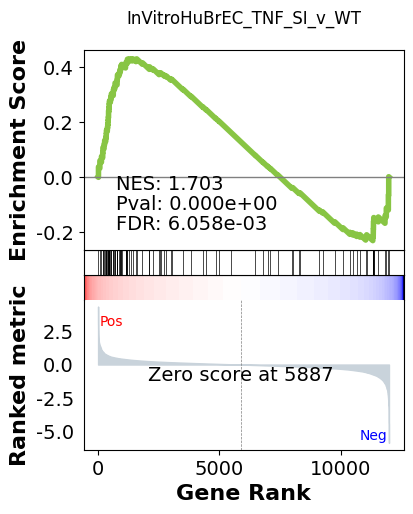

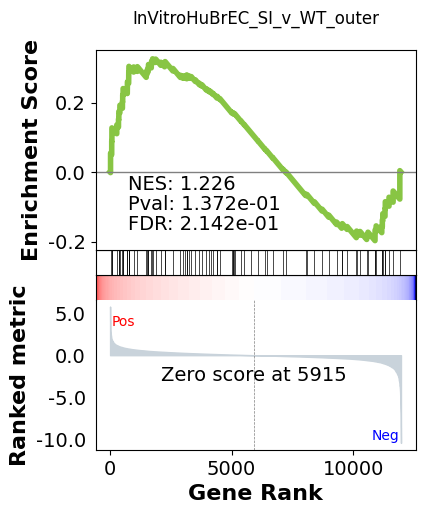

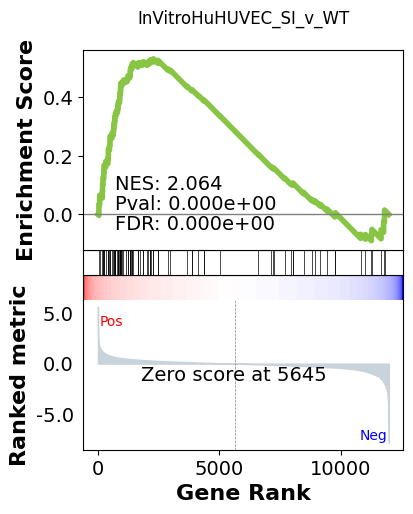

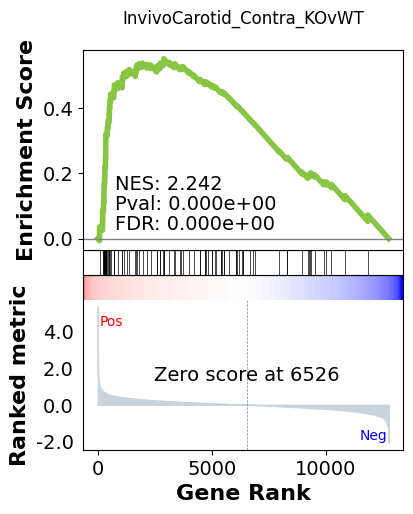

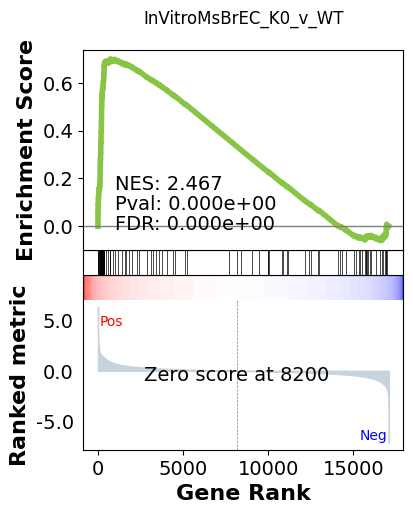

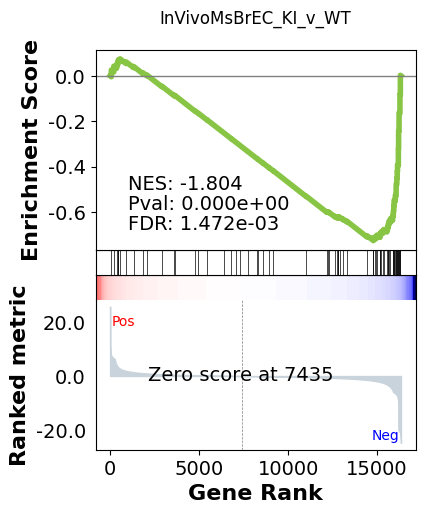

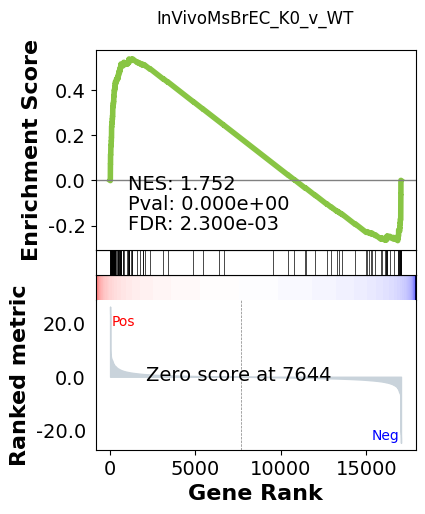

In [122]:
term_search = 'Carotid_AntiplatletLow_v_Low_Up'

# Create a directory for the term if it doesn't exist
path = f"/Users/patrickmurphy/Desktop/GSEA_figures/{term_search}"
if not os.path.exists(path):
    os.makedirs(path)

# Loop through each item in the dictionary and plot
for title, data in gsea_result_custom.items():
    # Plot the data
    fig = data.plot(terms=term_search)
    
    # Set the title of the plot
    fig.suptitle(title)

    # Save the plot as a PDF in the specific term folder
    fig.savefig(f"{path}/{title.replace(' ', '_')}.pdf", format='pdf')
        
    # Display the plot
    plt.show()

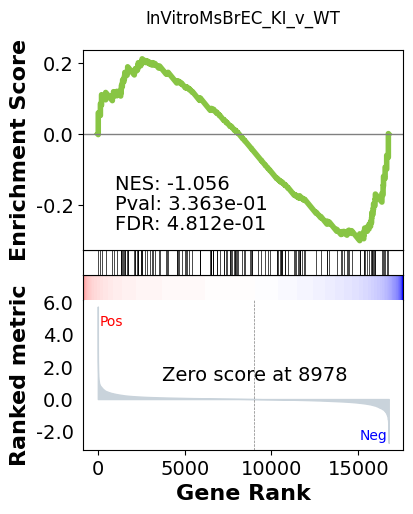

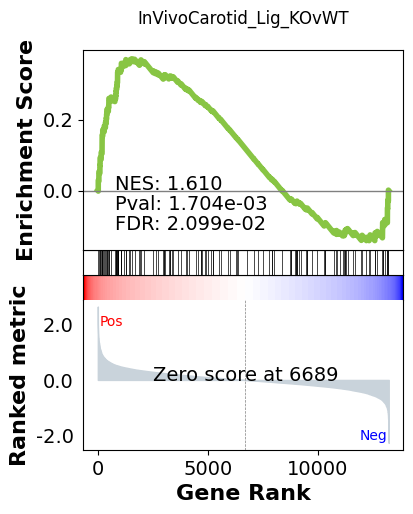

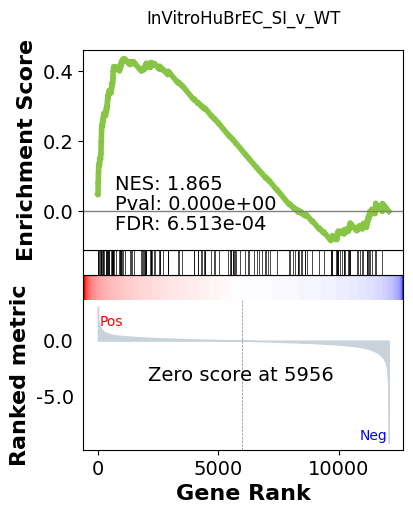

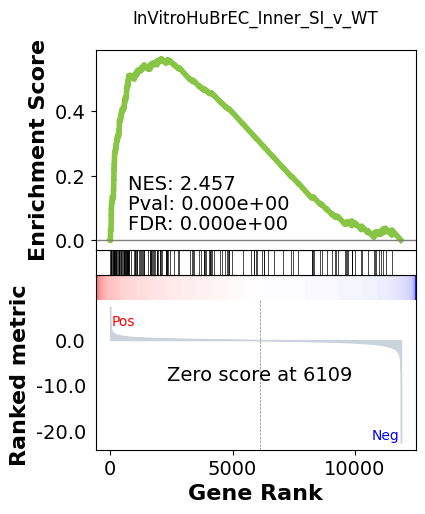

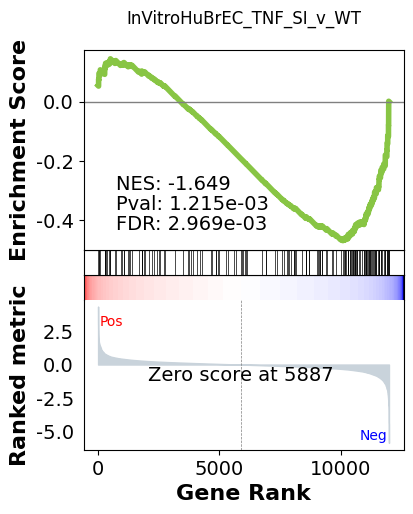

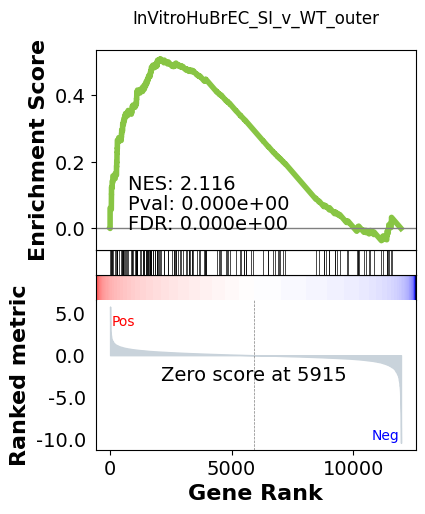

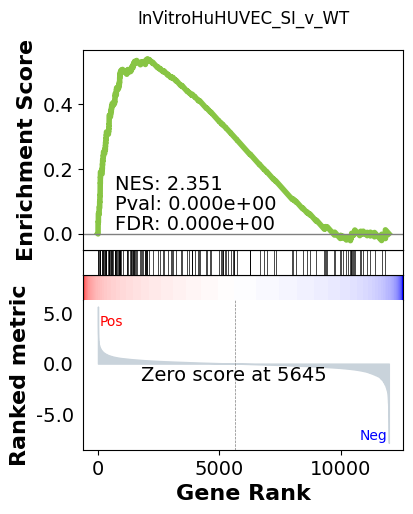

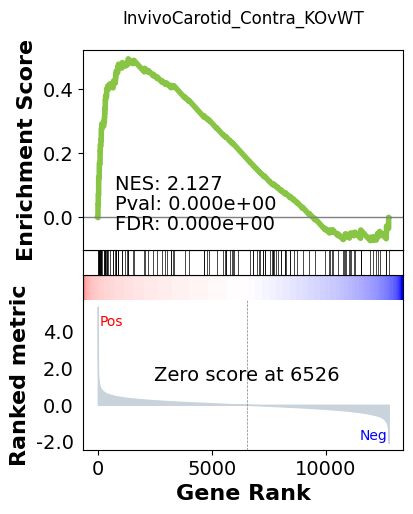

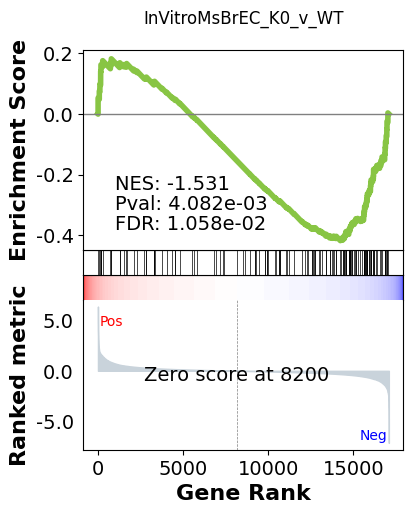

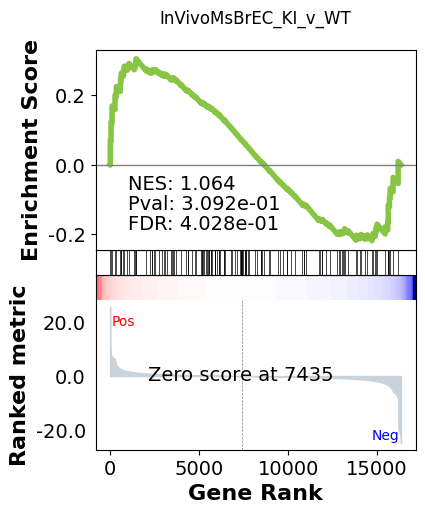

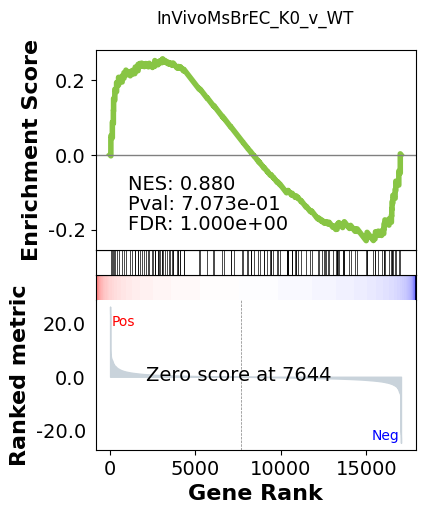

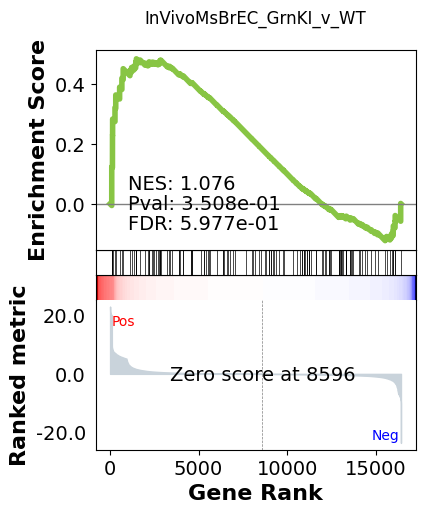

In [185]:
term_search = 'HuAEC_TNF_Up'

# Create a directory for the term if it doesn't exist
path = f"/Users/patrickmurphy/Desktop/GSEA_figures/{term_search}"
if not os.path.exists(path):
    os.makedirs(path)

# Loop through each item in the dictionary and plot
for title, data in gsea_result_custom2.items():
    # Plot the data
    fig = data.plot(terms=term_search)
    
    # Set the title of the plot
    fig.suptitle(title)

    # Save the plot as a PDF in the specific term folder
    fig.savefig(f"{path}/{title.replace(' ', '_')}.pdf", format='pdf')
        
    # Display the plot
    plt.show()

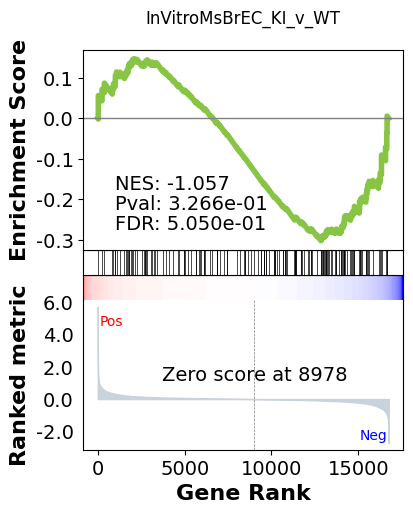

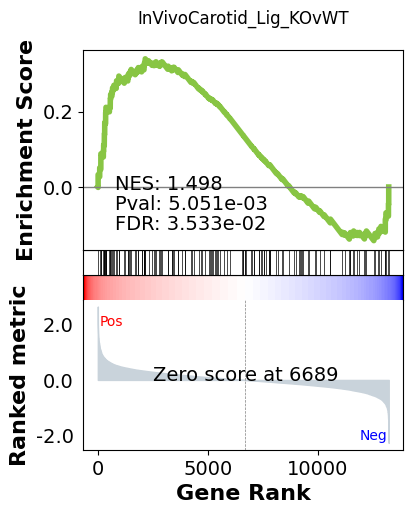

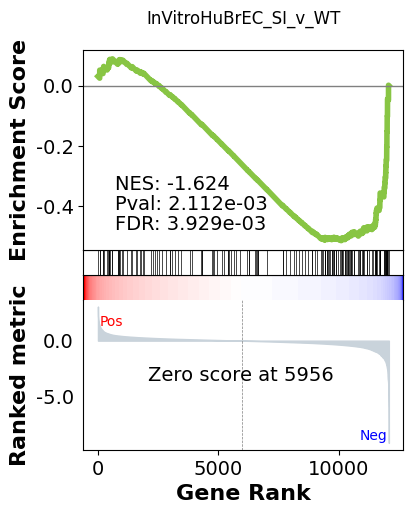

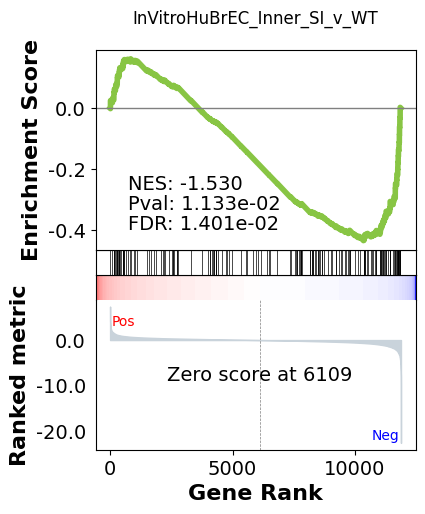

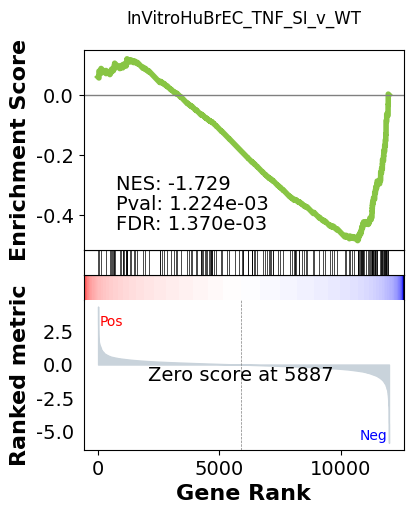

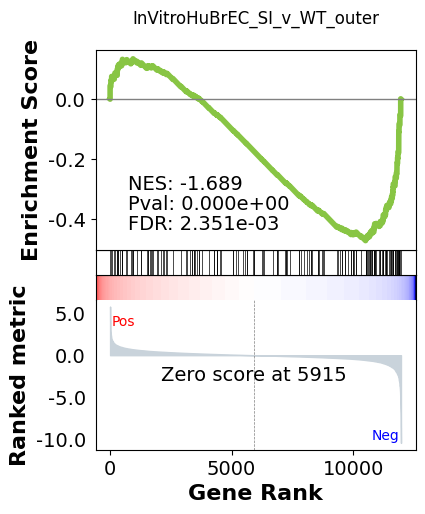

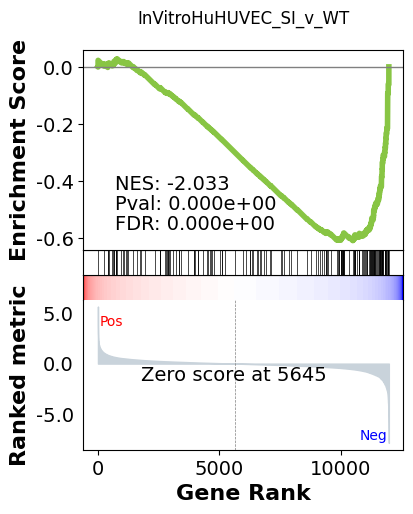

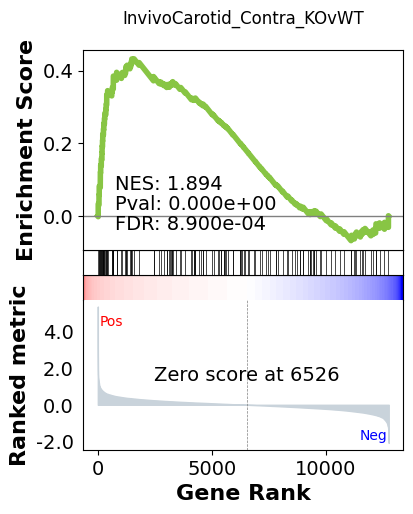

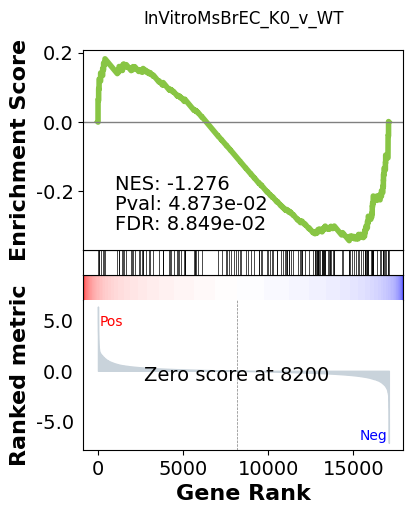

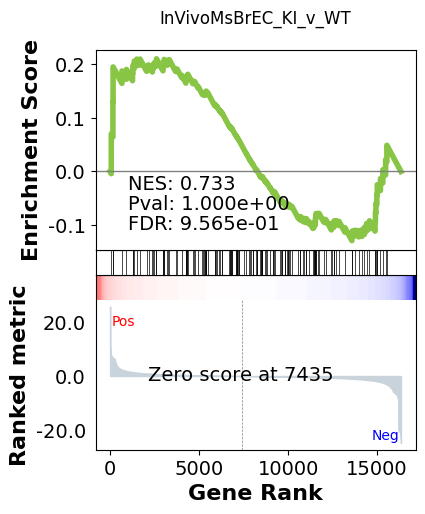

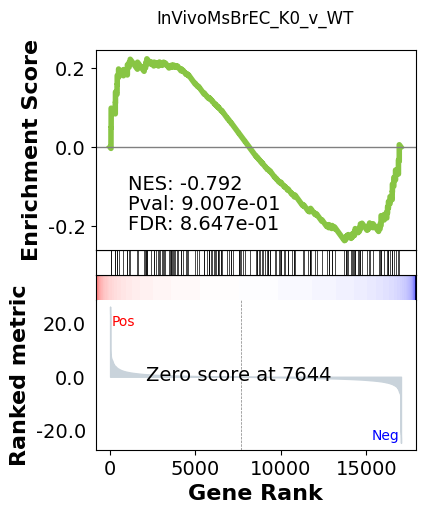

In [120]:
term_search = 'p3_iPSC_EC_CHIRvDMSO_PMID34755601_Up'

# Create a directory for the term if it doesn't exist
path = f"/Users/patrickmurphy/Desktop/GSEA_figures/{term_search}"
if not os.path.exists(path):
    os.makedirs(path)

# Loop through each item in the dictionary and plot
for title, data in gsea_result_custom2.items():
    # Plot the data
    fig = data.plot(terms=term_search)
    
    # Set the title of the plot
    fig.suptitle(title)

    # Save the plot as a PDF in the specific term folder
    fig.savefig(f"{path}/{title.replace(' ', '_')}.pdf", format='pdf')
        
    # Display the plot
    plt.show()

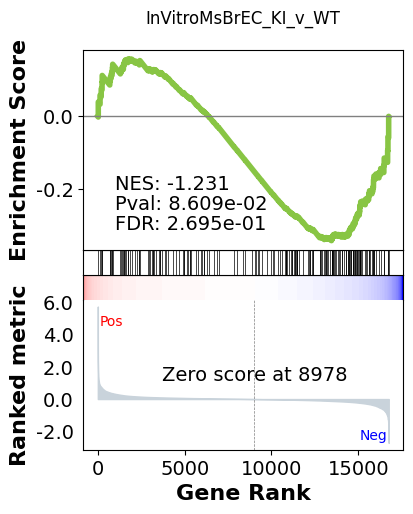

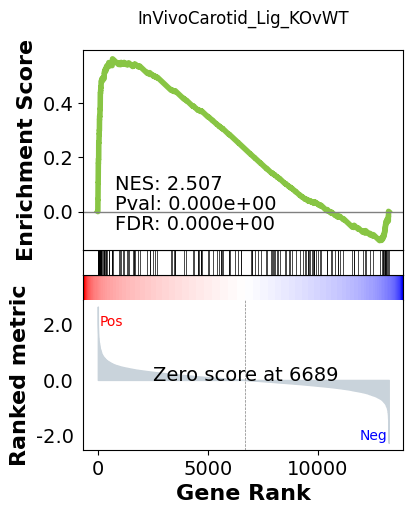

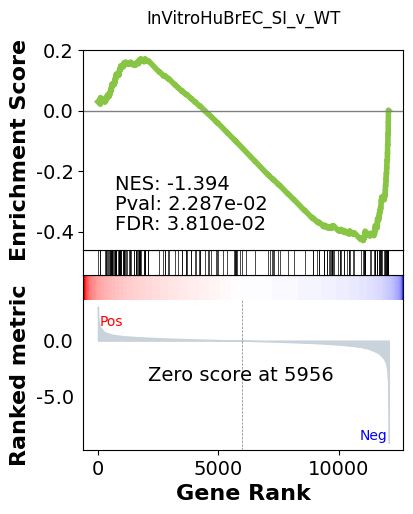

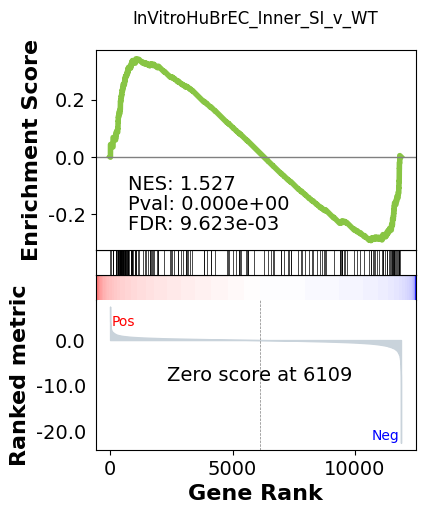

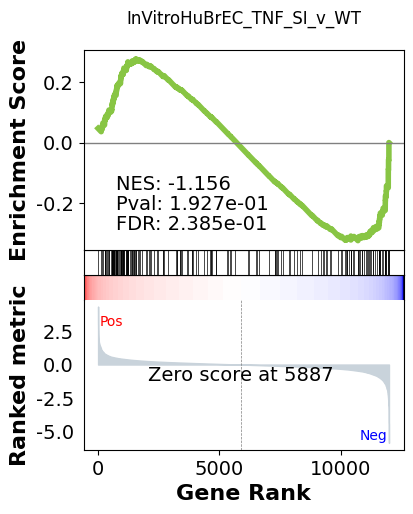

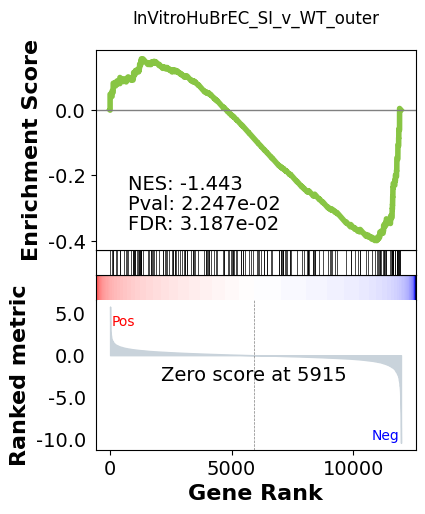

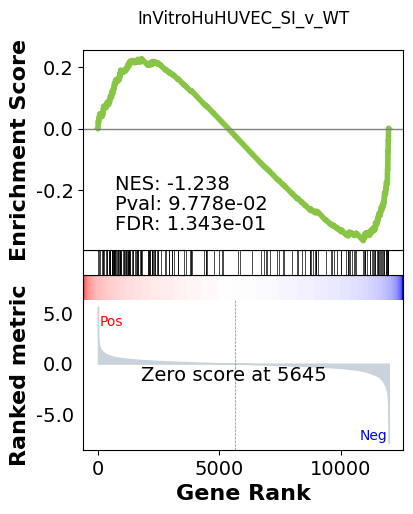

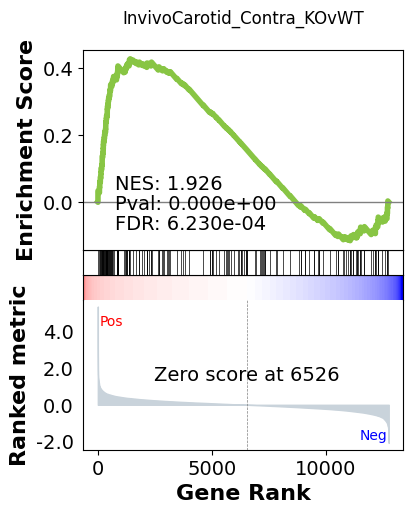

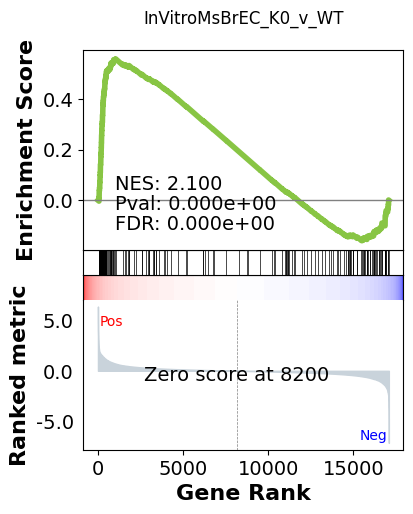

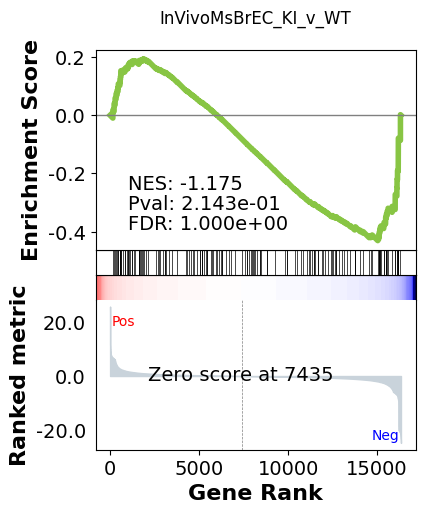

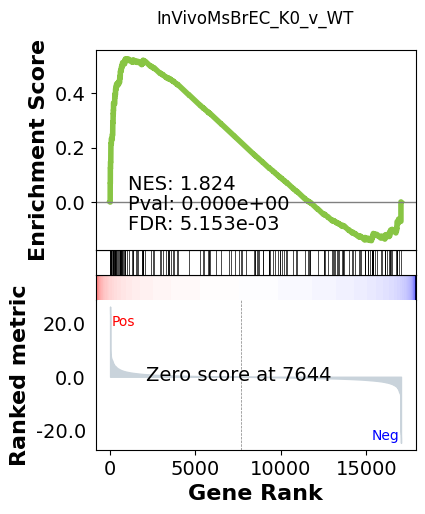

In [121]:
term_search = 'p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down'

# Create a directory for the term if it doesn't exist
path = f"/Users/patrickmurphy/Desktop/GSEA_figures/{term_search}"
if not os.path.exists(path):
    os.makedirs(path)

# Loop through each item in the dictionary and plot
for title, data in gsea_result_custom2.items():
    # Plot the data
    fig = data.plot(terms=term_search)
    
    # Set the title of the plot
    fig.suptitle(title)

    # Save the plot as a PDF in the specific term folder
    fig.savefig(f"{path}/{title.replace(' ', '_')}.pdf", format='pdf')
        
    # Display the plot
    plt.show()

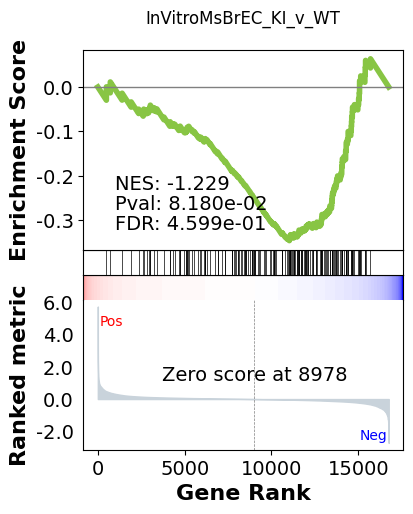

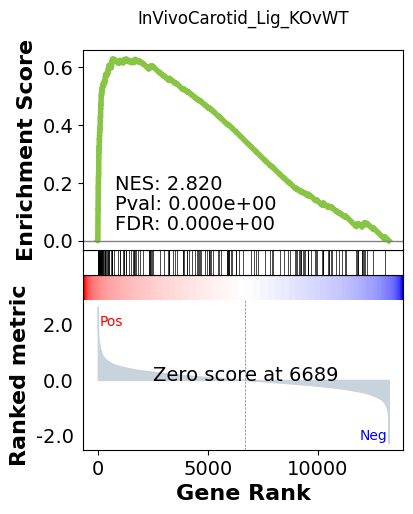

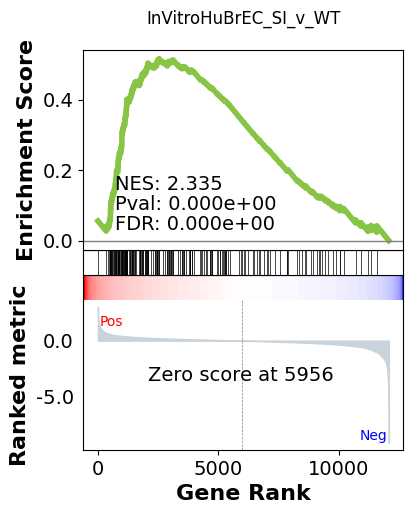

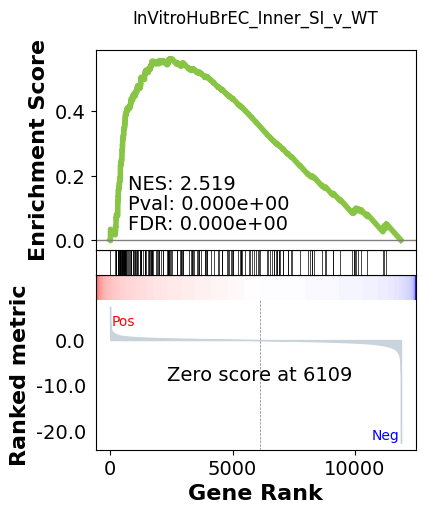

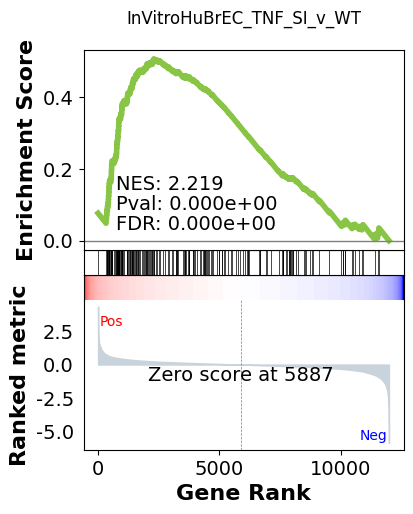

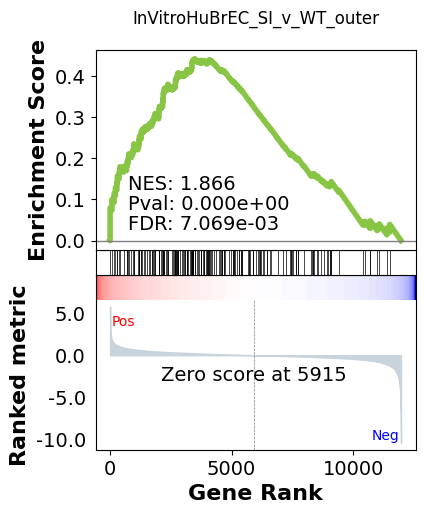

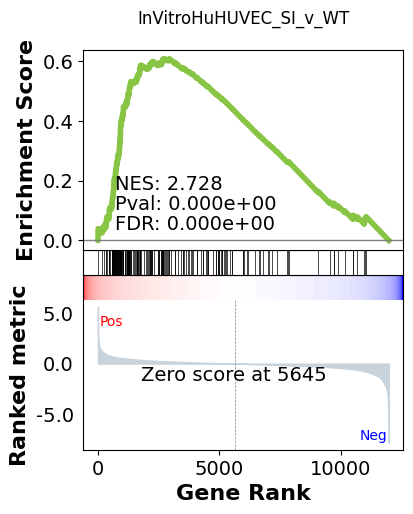

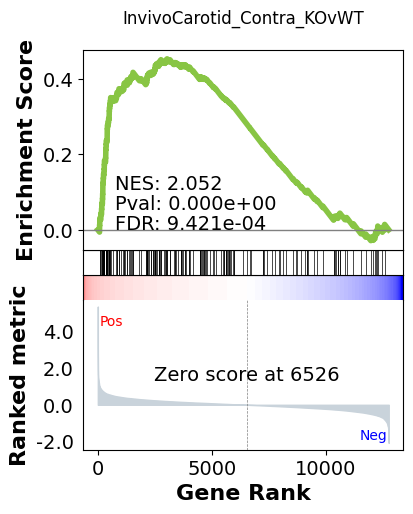

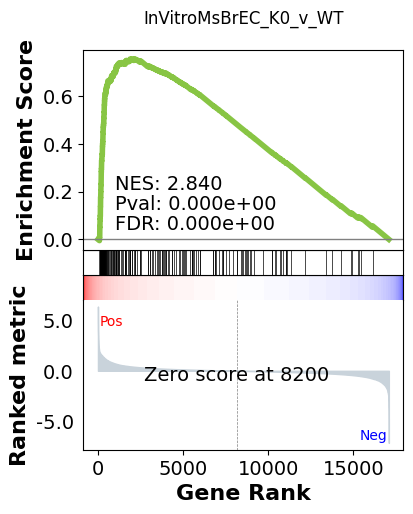

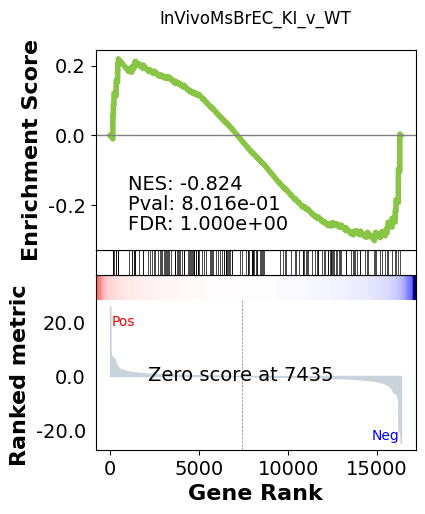

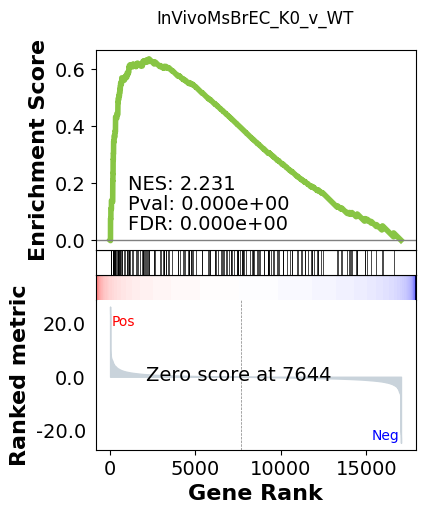

In [118]:
term_search = 'HALLMARK_G2M_CHECKPOINT'

# Create a directory for the term if it doesn't exist
path = f"/Users/patrickmurphy/Desktop/GSEA_figures/{term_search}"
if not os.path.exists(path):
    os.makedirs(path)

# Loop through each item in the dictionary and plot
for title, data in gsea_result_hallmark.items():
    # Plot the data
    fig = data.plot(terms=term_search)
    
    # Set the title of the plot
    fig.suptitle(title)

    # Save the plot as a PDF in the specific term folder
    fig.savefig(f"{path}/{title.replace(' ', '_')}.pdf", format='pdf')
        
    # Display the plot
    plt.show()

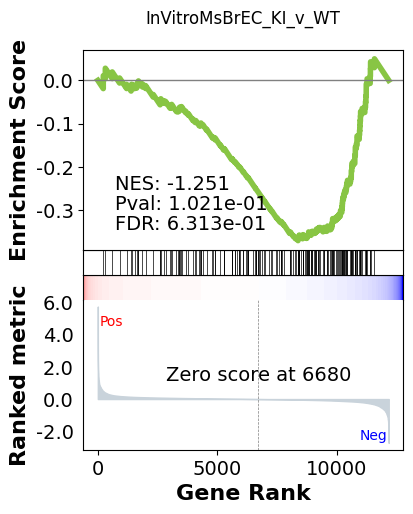

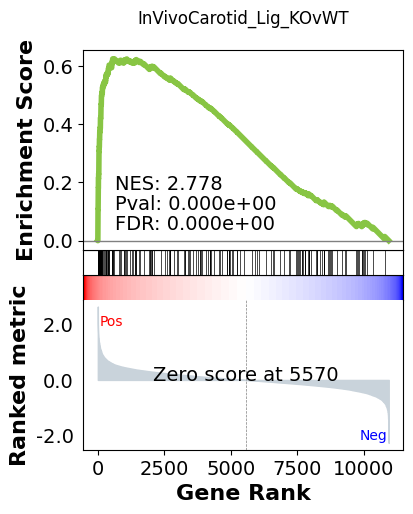

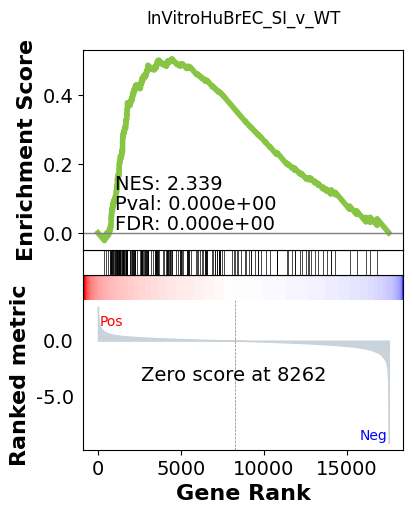

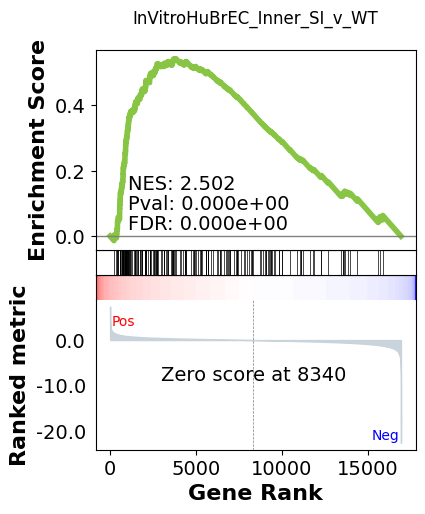

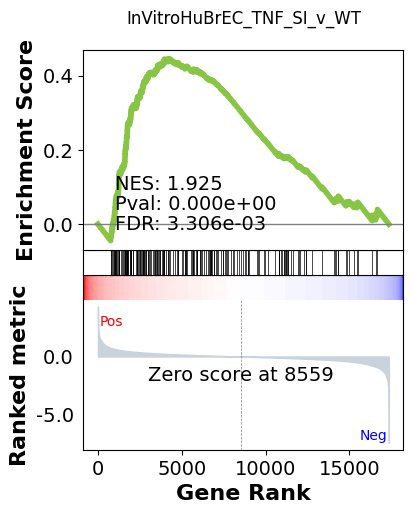

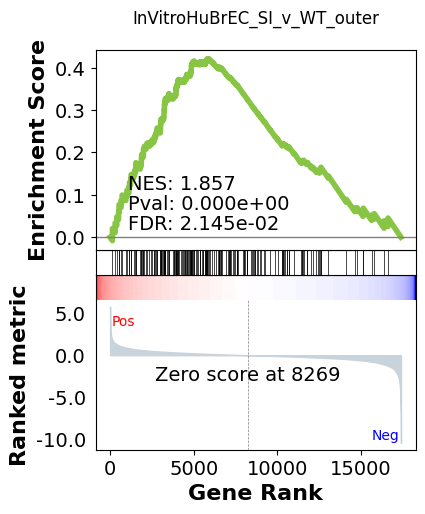

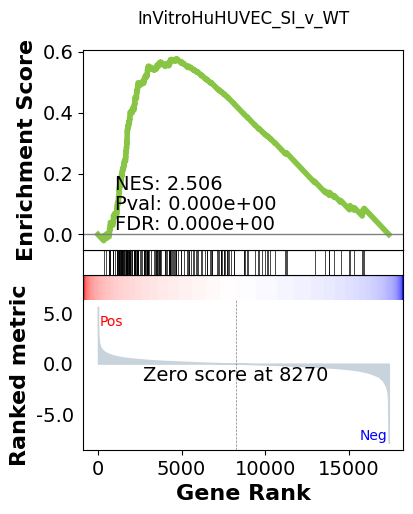

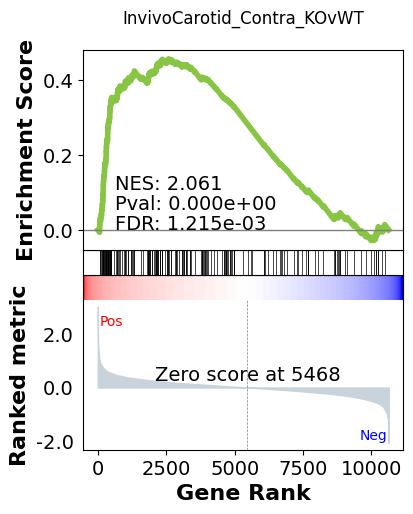

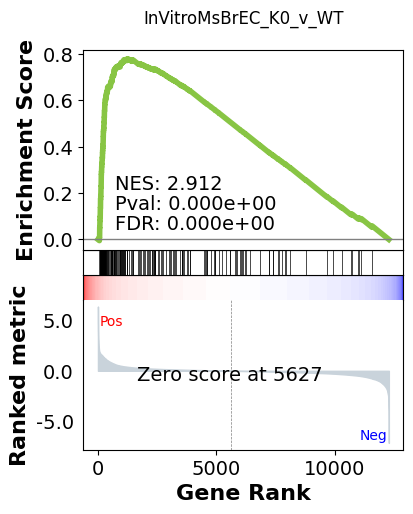

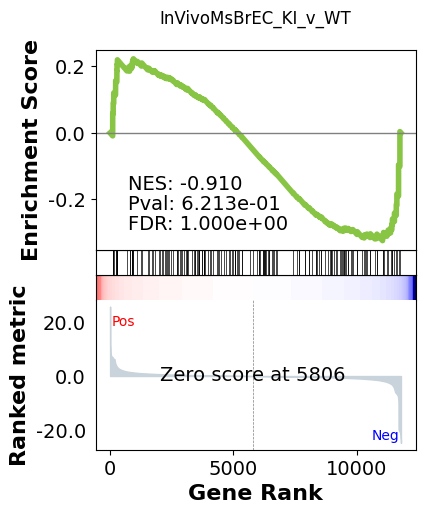

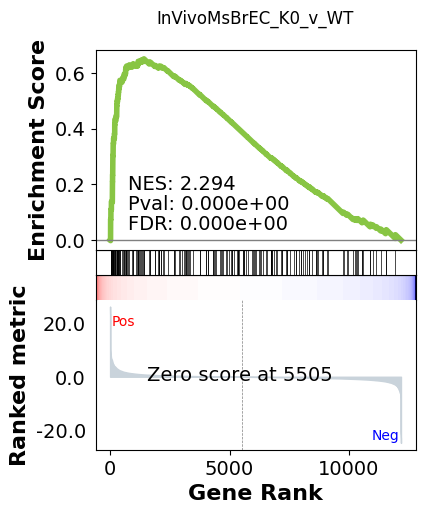

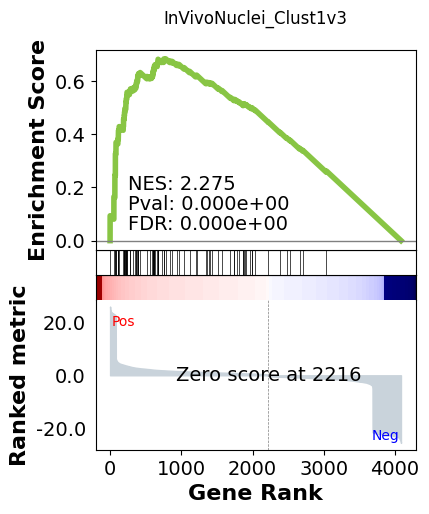

In [276]:
# Loop through each item in the dictionary and plot
for title, data in gsea_result.items():
    # Plot the data
    fig = data.plot(terms='MSigDB_Hallmark_2020__G2-M Checkpoint')
    
    # Set the title of the plot
    fig.suptitle(title)

# Save the plot as a PDF
    fig.savefig(f"/Users/patrickmurphy/Desktop/GSEA_figures/{title.replace(' ', '_')}.pdf", format='pdf')
    
    # Display the plot
    plt.show()

# Plot genes in term between datasets

In [186]:
#Prepare single cell res file so that it is in the same format as others

def reformat_df(combined_df):
    # Create a copy of the DataFrame
    formatted_df = combined_df.copy()

    # Print original columns for debugging
    print("Original columns:", formatted_df.columns.tolist())

    # If DataFrame has a column to be set as index, set it as index
    if '1_names' in formatted_df.columns:
        formatted_df.set_index('1_names', inplace=True)
    
    # Rename columns
    formatted_df.columns = formatted_df.columns.str.replace('1_logfoldchanges', 'log2FoldChange')
    formatted_df.columns = formatted_df.columns.str.replace('1_pvals_adj', 'padj')
    formatted_df.columns = formatted_df.columns.str.replace('1_pvals', 'pvalue')

    # Print new columns for debugging
    print("New columns:", formatted_df.columns.tolist())
    
    return formatted_df

def reformat_and_assign(df_name, df):
    reformatted_df = reformat_df(df)
    globals()[df_name + '_formatted'] = reformatted_df

# Example usage
reformat_and_assign('InVivoNuclei_Clust1v3_res', InVivoNuclei_Clust1v3_res)

Original columns: ['Unnamed: 0', '1_names', '1_scores', '1_logfoldchanges', '1_pvals_adj', '1_pvals']
New columns: ['Unnamed: 0', '1_scores', 'log2FoldChange', 'padj', 'pvalue']


In [187]:
InVitroMsBrEC_KI_v_WT_res_HsGeneID

baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NaN        3.179151        0.813513  0.596352  1.364149  0.172521  0.999194
NaN        0.317445        0.774325  2.147881  0.360506  0.718468  0.999194
NaN      921.291126       -0.038530  0.166296 -0.231694  0.816776  0.999194
NaN       34.786652       -0.590343  0.770232 -0.766448  0.443410  0.999194
NaN       41.353547       -0.241785  0.340506 -0.710076  0.477657  0.999194
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.158409       -0.991949  3.059679 -0.324200  0.745786  0.999194
ZYG11B  1220.481218       -0.013288  0.154834 -0.085824  0.931606  0.999194
ZYX     9752.166948       -0.045955  0.149852 -0.306673  0.759092  0.999194
ZZEF1   3270.052145        0.149254  0.123193  1.211542  0.225688  0.999194
ZZZ3    1555.877175        0.053970  0.135174  0.399260  0.689702  0.999194

[48137 rows x 6 columns]

In [192]:
InVitroHuBrEC_SI_v_WT_res

baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1bg       10.710318        0.605715  0.374846  1.615906  0.106115  0.526630
NaN        30.181794        0.292548  0.227613  1.285288  0.198692  0.701234
A1cf        0.083955       -0.512714  3.060383 -0.167533  0.866951  0.981834
A2m        92.047299       -1.993204  0.719113 -2.771753  0.005576  0.106671
NaN         6.103447       -1.646046  0.620475 -2.652882  0.007981  0.132351
...              ...             ...       ...       ...       ...       ...
            0.000000             NaN       NaN       NaN       NaN       NaN
Zyg11b   1574.238641       -0.116119  0.142047 -0.817468  0.413661  0.940547
Zyx     12421.766933        0.471157  0.215884  2.182458  0.029076  0.273139
            0.000000             NaN       NaN       NaN       NaN       NaN
Zzef1     946.239823       -0.131657  0.262398 -0.501745  0.615847  0.981834

[58299 rows x 6 columns]

In [199]:
InVitroMsBrEC_KI_v_WT_res

baseMean  log2FoldChange     lfcSE      stat    pvalue  \
X0610005C13Rik     3.179151        0.813513  0.596352  1.364149  0.172521   
X0610006L08Rik     0.317445        0.774325  2.147881  0.360506  0.718468   
X0610009B22Rik   921.291126       -0.038530  0.166296 -0.231694  0.816776   
X0610009E02Rik    34.786652       -0.590343  0.770232 -0.766448  0.443410   
X0610009L18Rik    41.353547       -0.241785  0.340506 -0.710076  0.477657   
...                     ...             ...       ...       ...       ...   
Zyg11a             0.158409       -0.991949  3.059679 -0.324200  0.745786   
Zyg11b          1220.481218       -0.013288  0.154834 -0.085824  0.931606   
Zyx             9752.166948       -0.045955  0.149852 -0.306673  0.759092   
Zzef1           3270.052145        0.149254  0.123193  1.211542  0.225688   
Zzz3            1555.877175        0.053970  0.135174  0.399260  0.689702   

                    padj  
X0610005C13Rik  0.999194  
X0610006L08Rik  0.999194  
X0610009B22Rik  0.999194  
X0610009E02Rik  0.999194  
X0610009L18Rik  0.999194  
...                  ...  
Zyg11a          0.999194  
Zyg11b          0.999194  
Zyx             0.999194  
Zzef1           0.999194  
Zzz3            0.999194  

[48137 rows x 6 columns]

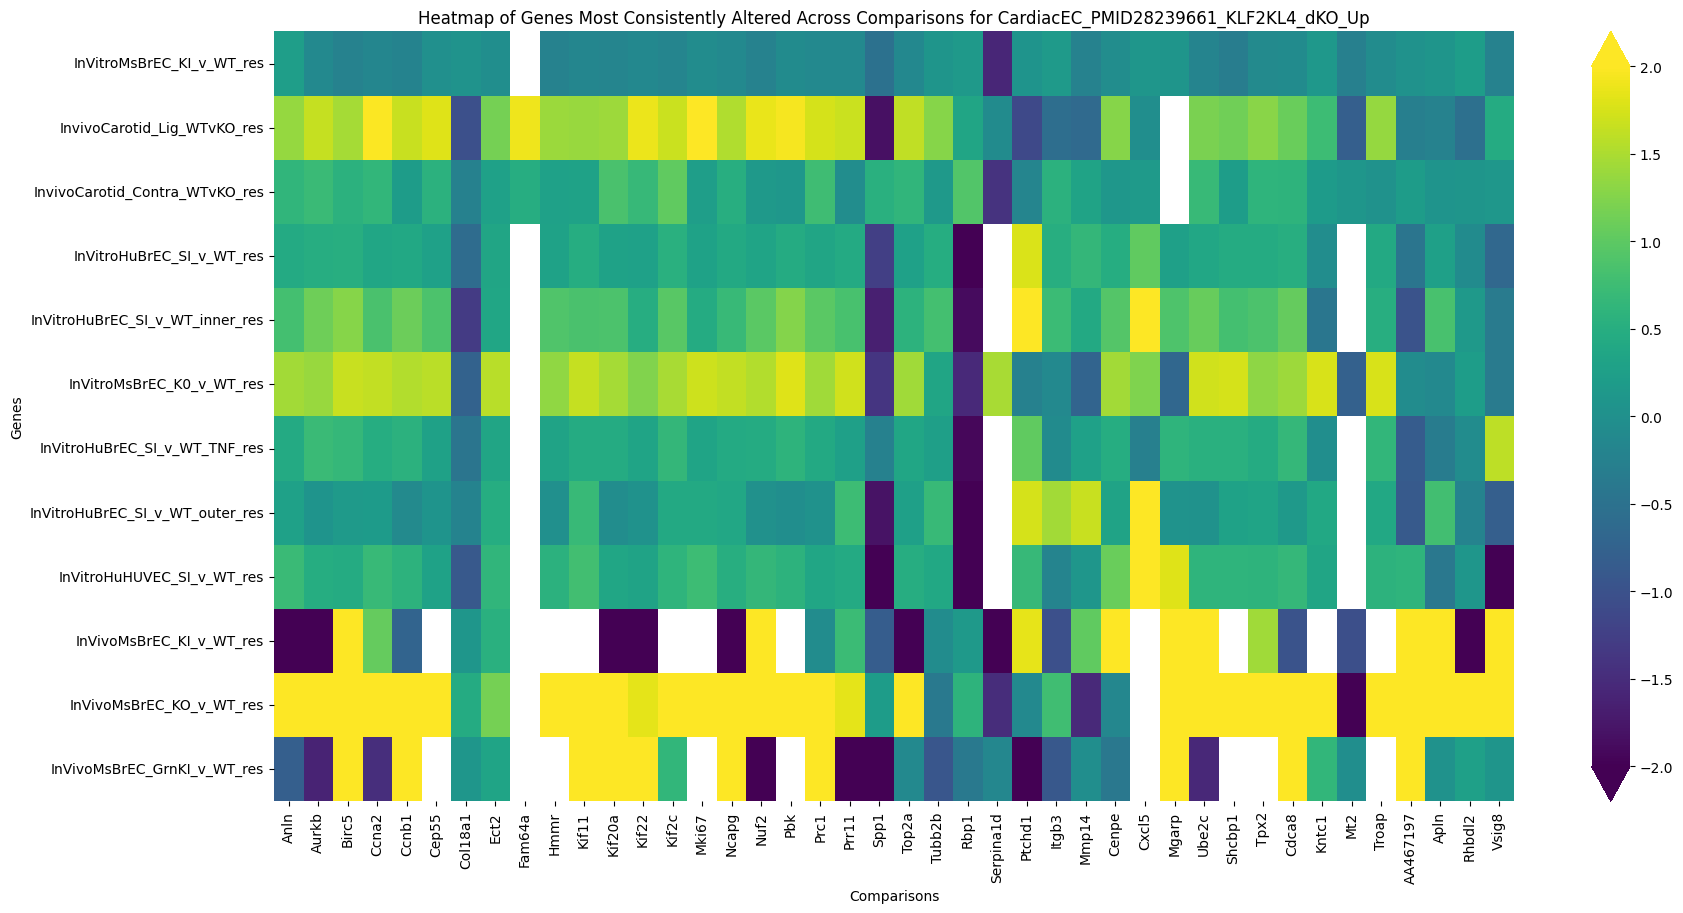

In [203]:
# Create a dictionary where keys are names and values are dataframes
df_dict_humangene_res = {
    'InVitroMsBrEC_KI_v_WT_res': InVitroMsBrEC_KI_v_WT_res,
    'InvivoCarotid_Lig_WTvKO_res': InvivoCarotid_Lig_WTvKO_res,
#    'InVitroMsBrEC_TNF_KIvWT_res_HsGeneID': InVitroMsBrEC_TNF_KIvWT_res_HsGeneID,
#    'InVitroHuHBEC_SI_v_WT_res' : InVitroHuHBEC_SI_v_WT_res,
    'InvivoCarotid_Contra_WTvKO_res' : InvivoCarotid_Contra_WTvKO_res, 
    'InVitroHuBrEC_SI_v_WT_res' : InVitroHuBrEC_SI_v_WT_res_MsGeneID,
#    'InVitroMsBrEC_Inner_KIvWT_res_HsGeneID' : InVitroMsBrEC_Inner_KIvWT_res_HsGeneID,
    'InVitroHuBrEC_SI_v_WT_inner_res' : InVitroHuBrEC_Inner_siTDP43vWT_res_MsGeneID,
    'InVitroMsBrEC_K0_v_WT_res' : InVitroMsBrEC_K0_v_WT_res,
    'InVitroHuBrEC_SI_v_WT_TNF_res' : InVitroHuBrEC_TNF_siTDP43vWT_res_MsGeneID,
    'InVitroHuBrEC_SI_v_WT_outer_res' : InVitroHuBrEC_SI_v_WT_outer_res_MsGeneID,
    'InVitroHuHUVEC_SI_v_WT_res' : InVitroHuHUVEC_SI_v_WT_res_MsGeneID,
#    'InVitroMsBrEC_Outer_KIvWT_res_HsGeneID' : InVitroMsBrEC_Outer_KIvWT_res_HsGeneID,
    'InVivoMsBrEC_KI_v_WT_res' : InVivoMsBrEC_KI_v_WT_res,
    'InVivoMsBrEC_KO_v_WT_res' : InVivoMsBrEC_KO_v_WT_res,
    'InVivoMsBrEC_GrnKI_v_WT_res' : InVivoMsBrEC_GrnKI_v_WT_res,
#    'InVivoNuclei_Clust1v3_res_formatted': InVivoNuclei_Clust1v3_res_formatted
}

# To extract a specific gene set
gene_set_name = "CardiacEC_PMID28239661_KLF2KL4_dKO_Up" #Replace with your actual gene set name
gsea_term_genes = custom_endo_mus_genesets.get(gene_set_name, [])

# Convert the set of genes to a list for the DataFrame index
gsea_term_genes_list = list(gsea_term_genes)

# Step 1: Count the occurrences of significant p-values for each gene
significant_count = Counter()

for df in df_dict_humangene_res.values():
    significant_genes = df[(df['padj'] < 0.05) & df.index.isin(gsea_term_genes_list)].index
    significant_count.update(significant_genes)

# Filter genes based on significance count
filtered_genes = [gene for gene, count in significant_count.items() if count >= 1]

# Initialize a DataFrame to hold the log2FoldChange for the filtered genes in each DataFrame
combined_df = pd.DataFrame(index=filtered_genes)

for df_name, df in df_dict_humangene_res.items():
    # Drop duplicates in the index (gene names)
    df = df[~df.index.duplicated(keep='first')]

    # Filter the DataFrame for genes in the filtered_genes list
    filtered_df = df[df.index.isin(filtered_genes)]
    
    # Add the log2FoldChange values of the filtered_df to the combined_df
    combined_df[df_name] = filtered_df['log2FoldChange']

# Transpose the DataFrame to have comparisons as columns and genes as rows
combined_df = combined_df.T


# Create the Heatmap with the custom colormap
plt.figure(figsize=(20, 10))
sns.heatmap(combined_df, annot=False, cmap='viridis', vmin=-2, vmax=2, cbar_kws={'extend': 'both'})
plt.title(f'Heatmap of Genes Most Consistently Altered Across Comparisons for {gene_set_name}')
plt.xlabel('Comparisons')
plt.ylabel('Genes')
plt.show()